출처: How to use 🐼pandas filter🎨 in survey EDA 📊
https://www.kaggle.com/corazzon/how-to-use-pandas-filter-in-survey-eda

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

In [3]:
raw = pd.read_csv(r"../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [4]:
raw.head()

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                1838                        35-39   
2                              289287                        30-34   
3                                 860                        35-39   
4                                 507                        30-34   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                   Colombia   
2                   United States of America   
3                                  Argentina   
4                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                    Master’s degree   
3                                  Bachelor’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                            Student   
2                                      Data Engineer   
3                                  Software Engineer   
4                                     Data Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                         5-10 years   
3                                        10-20 years   
4                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                             Python   
3                                                NaN   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                  R   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                SQL  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                SQL  ...   

                                        Q35_B_Part_2  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4              

Q1~Q6부터는 답변일 한가지라서 쉽게 가져와 사용할 수 있지만,
Q7번 부터 경우 파트의 개수가 다르기 때문에 인덱스가 다르게 되어야 한다.

iloc 는 index 값을 가져옴

In [5]:
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [6]:
answer = raw.drop([0])
answer

Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
5                                                  Japan   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
5                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                              Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
1                        Student   5-10 years    Python         R       SQL   
2                  Data Engineer   5-10 years    Python         R       SQL   
3              Software Engineer  10-20 years       NaN       NaN       NaN   
4                 Data Scientist   5-10 years    Python       NaN       SQL   
5              Software Engineer    3-5 years    Python       NaN       NaN   
...                          ...          ...       ...       ...       ...   
20032                        NaN          NaN       NaN       NaN       NaN   
20033     Currently not employed    20+ years    Python       NaN       NaN   
20034         Research Scientist    < 1 years    Python       NaN       NaN   
20035          Software Engineer    3-5 years    Python       NaN       SQL   
20036  Machine Learning Engineer    < 1 years    Python       NaN       NaN   

       ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1      ...                 NaN          NaN          NaN   TensorBoard    
2      ...                 NaN          NaN          NaN            NaN   
3      ...                 NaN          NaN          NaN            NaN   
4      ...                 NaN          NaN          NaN            NaN   
5      ...                 NaN          NaN          NaN            NaN   
...    ...                 ...          ...          ...            ...   
20032  ...                 NaN          NaN          NaN            NaN   
20033  ...                 NaN          NaN          NaN            NaN   
20034  ...                 NaN          NaN          NaN            NaN   
20035  ...   Weights & Biases           NaN          NaN   TensorBoard    
20036  ...   Weights & Biases           NaN          NaN            NaN   

     

질문에 해당하는 0행을 제거해서 answer 값만 추출

In [7]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


355개, 대부분 데이터가 object 데이터다

# Q1 What is your age(#years)?

In [27]:
question["Q1"]

'What is your age (# years)?'

In [28]:
answer['Q1'].value_counts(normalize=True)*100

25-29    20.018966
22-24    18.895987
18-21    17.313835
30-34    14.029746
35-39     9.937113
40-44     6.972450
45-49     4.931124
50-54     3.483729
55-59     2.051308
60-69     1.986424
70+       0.379317
Name: Q1, dtype: float64

<AxesSubplot:>

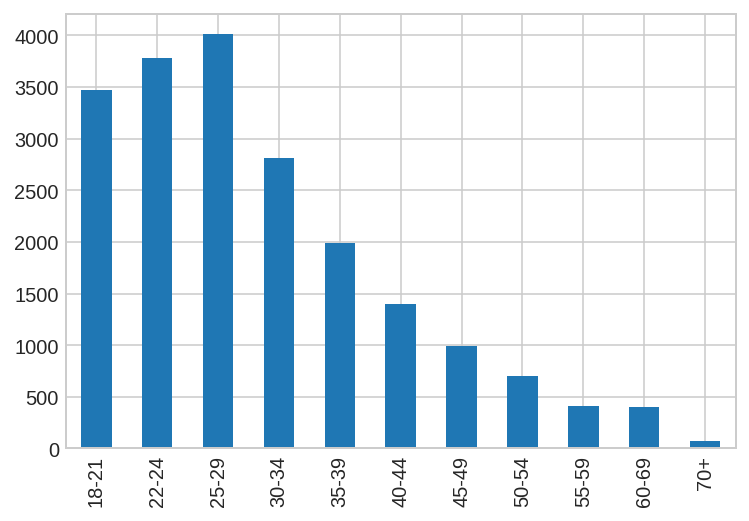

In [29]:
answer['Q1'].value_counts().sort_index().plot.bar()

* pandas의Series형태
* 빈도수세기 answer['Q1'].value_counts()
* 해당 데이터의 비율 보기 answer['Q1'].value_counts(nomalize=True)*100
* 인덱스 기준 정렬 : answer['Q1'].value_counts().sort_index()
* 시각화(판다스) : answer['Q1'].value_counts().sort_index().plot()
* 막대그래프 : answer['Q1'].value_counts().sort_index().plot.bar() (barh() 그래프를 y축으로)

Text(0.5, 1.0, 'What is your age (# years)?')

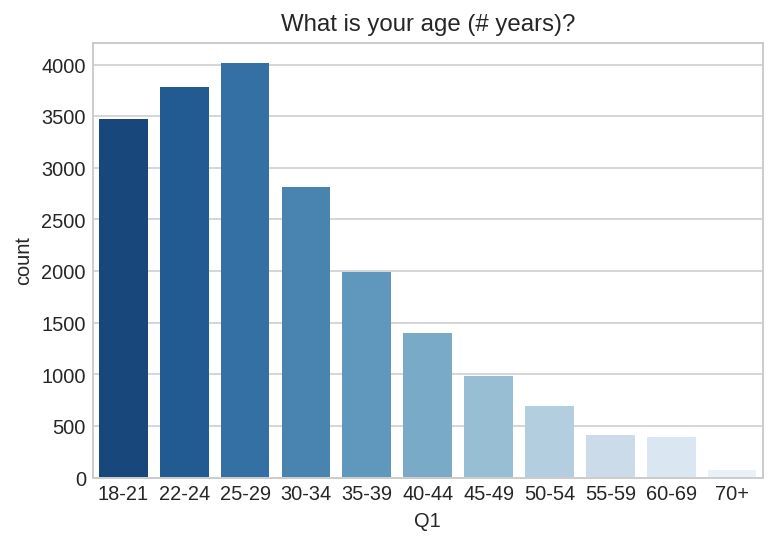

In [30]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1",
              palette="Blues_r").set_title(question["Q1"])

* seaborn을 활용한 시각화 : sns.countplot(data=answer, x="Q1")
* 인덱스 순 정렬 시각화: sns.countplot(data=answer.sort_values("Q1"), x="Q1")
* tlrkrghk wnd 팔레트: palette="Blues_r" _r의 경우 빈도에 따라 그라데이션

# Q2.What is your gender - Selected Choice

In [31]:
question_no="Q2"
Q2 = answer[question_no].value_counts()
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

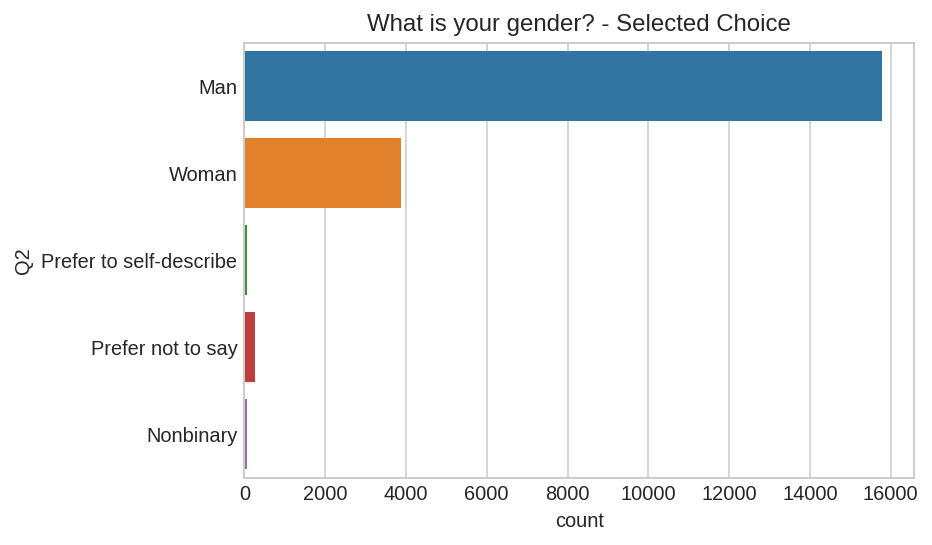

In [32]:
sns.countplot(data=answer,
             y=question_no).set_title(question[question_no])

<AxesSubplot:xlabel='Q1'>

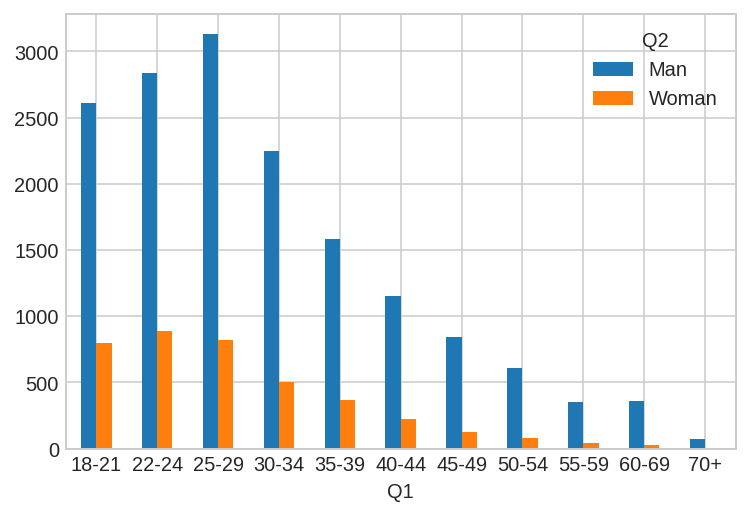

In [33]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2[["Man","Woman"]].plot.bar(rot=0)

<AxesSubplot:title={'center':'Age & Gender'}, ylabel='Q1'>

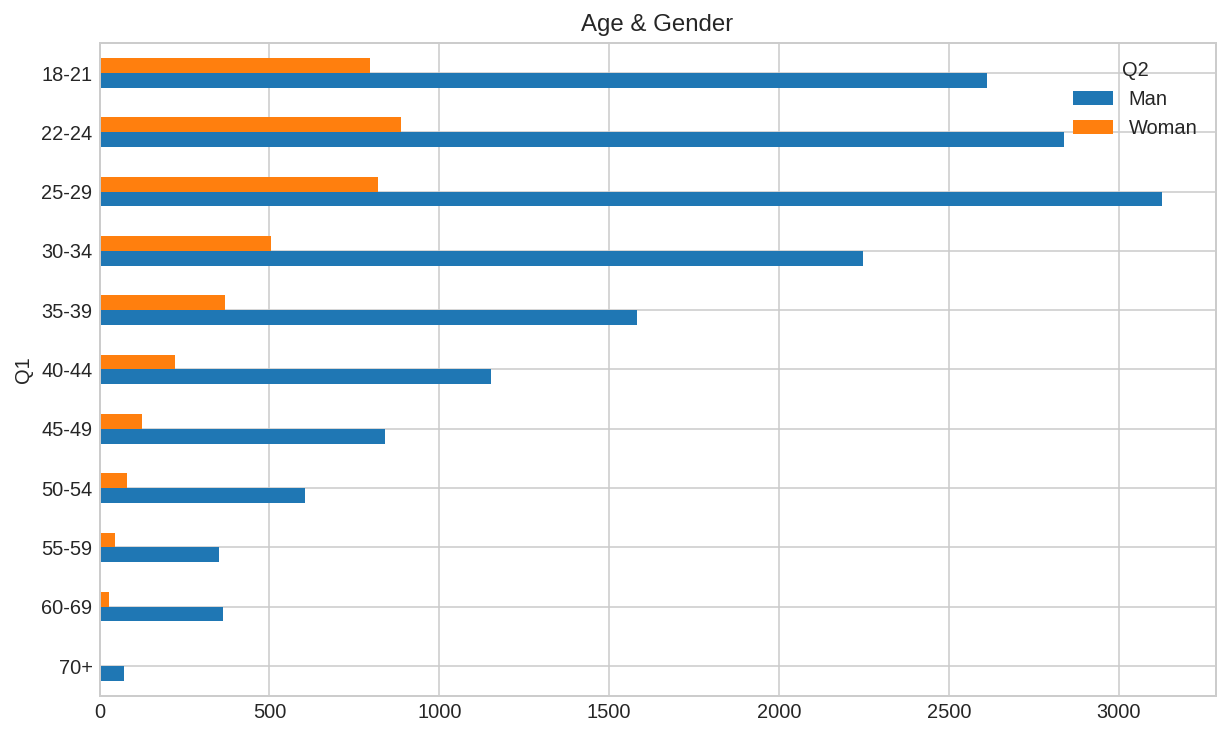

In [34]:
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,6),
                                                           title = "Age & Gender")

Text(0.5, 1.0, 'Age & Gender')

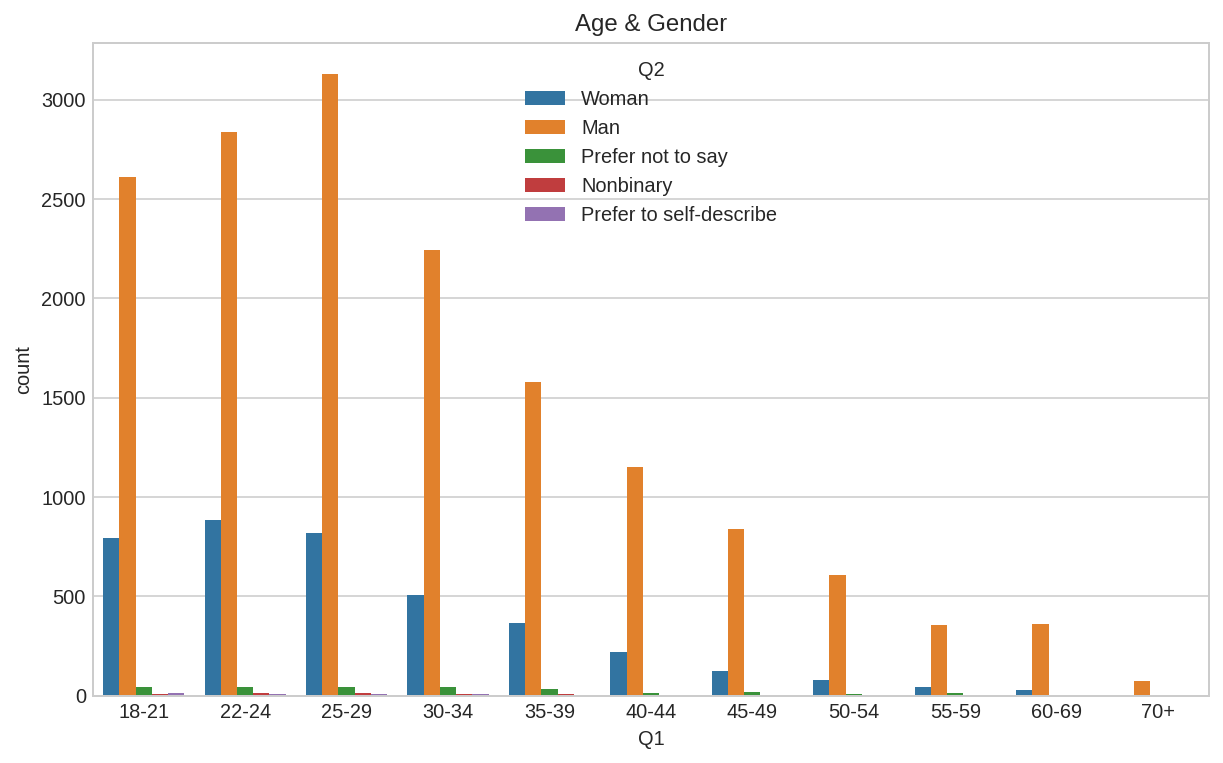

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender")

# Q3 In which country do you currently reside?

📊 define show_countplot_by_qno

In [36]:
question["Q1"]

'What is your age (# years)?'

In [37]:
q1_cols = answer["Q1"].value_counts().sort_index().index # 변수로 지정

In [38]:
q1_cols = answer["Q1"].value_counts().sort_index().index.tolist() #리스트로 만들기

* 응답값에 대한 빈도수 . value_counts()
* + .index() 인덱스 값만 가져옴

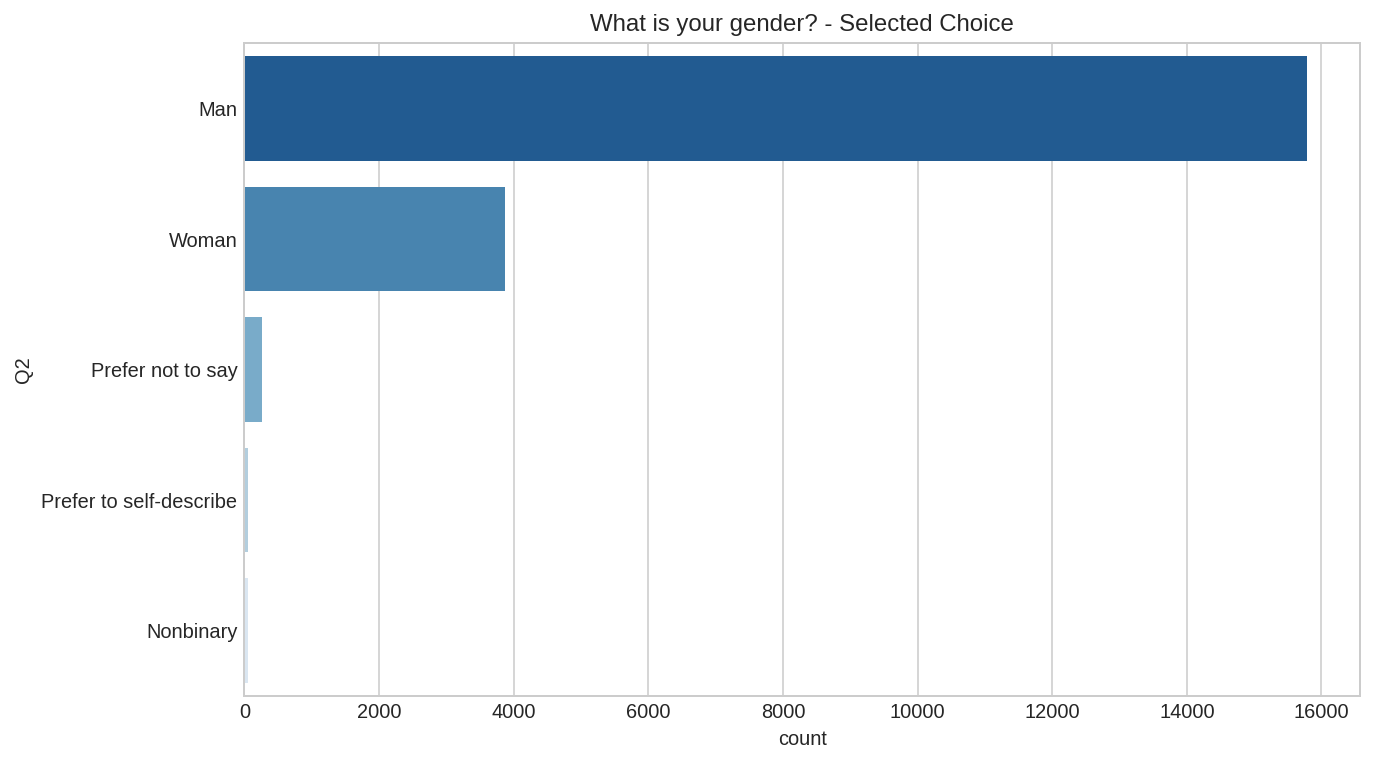

In [39]:
def show_countplot_by_qno(qno, fsize=(10,6), order = None):
    if not order: 
        order = answer[qno].value_counts().index
        
    plt.figure(figsize=fsize)  # 기본값 지정 후, 추후 함수값 조정으로 그래프 사이즈 조정
    sns.countplot(data=answer, y=qno, 
                  order=order, palette ="Blues_r"
                 ).set_title(question[qno])

show_countplot_by_qno("Q2")

In [23]:
def show_countplot_by_qno(qno, fsize=(10,6), order= None):
    """
    qno : question_no, ex)Q12
    fsize : figsize default (10, 6)
    order : optional order list, default value_counts().index
    """
    if not order :  # order가 없으면 빈도값을 기준으로 빈도수가 높은 인덱스 순으로 정렬
        order = answer[qno].values_counts().index
    
    plt.figure(figsize=fsize)
    sns.countplot(data=answer, 
                  y=qno,
                  order=order,
                  palette="Blues_r"
                 ).set_title(question[qno])

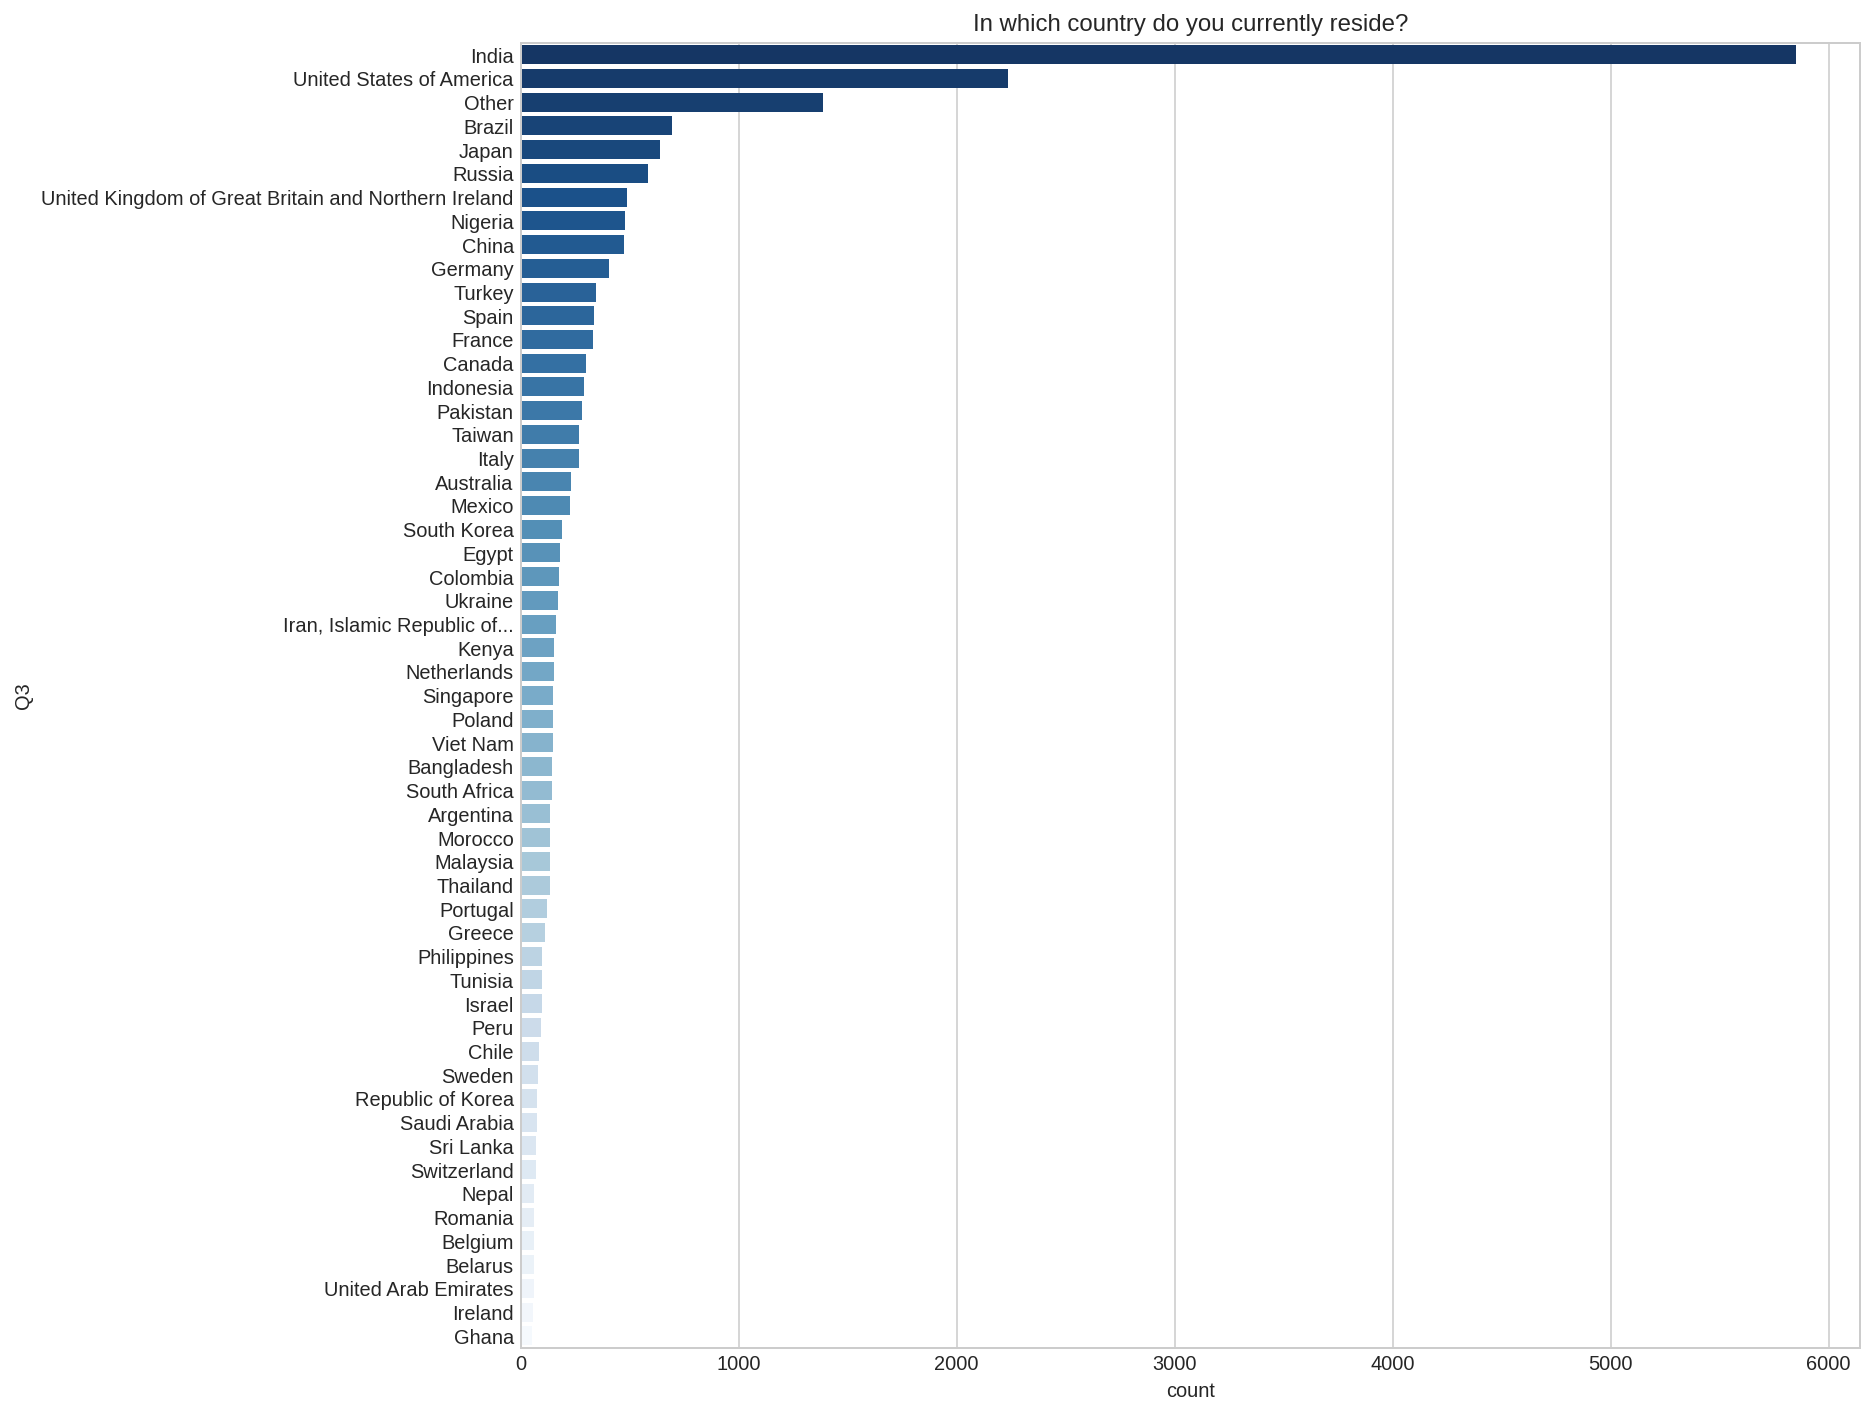

In [40]:
show_countplot_by_qno("Q3", fsize=(12, 12))

## Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

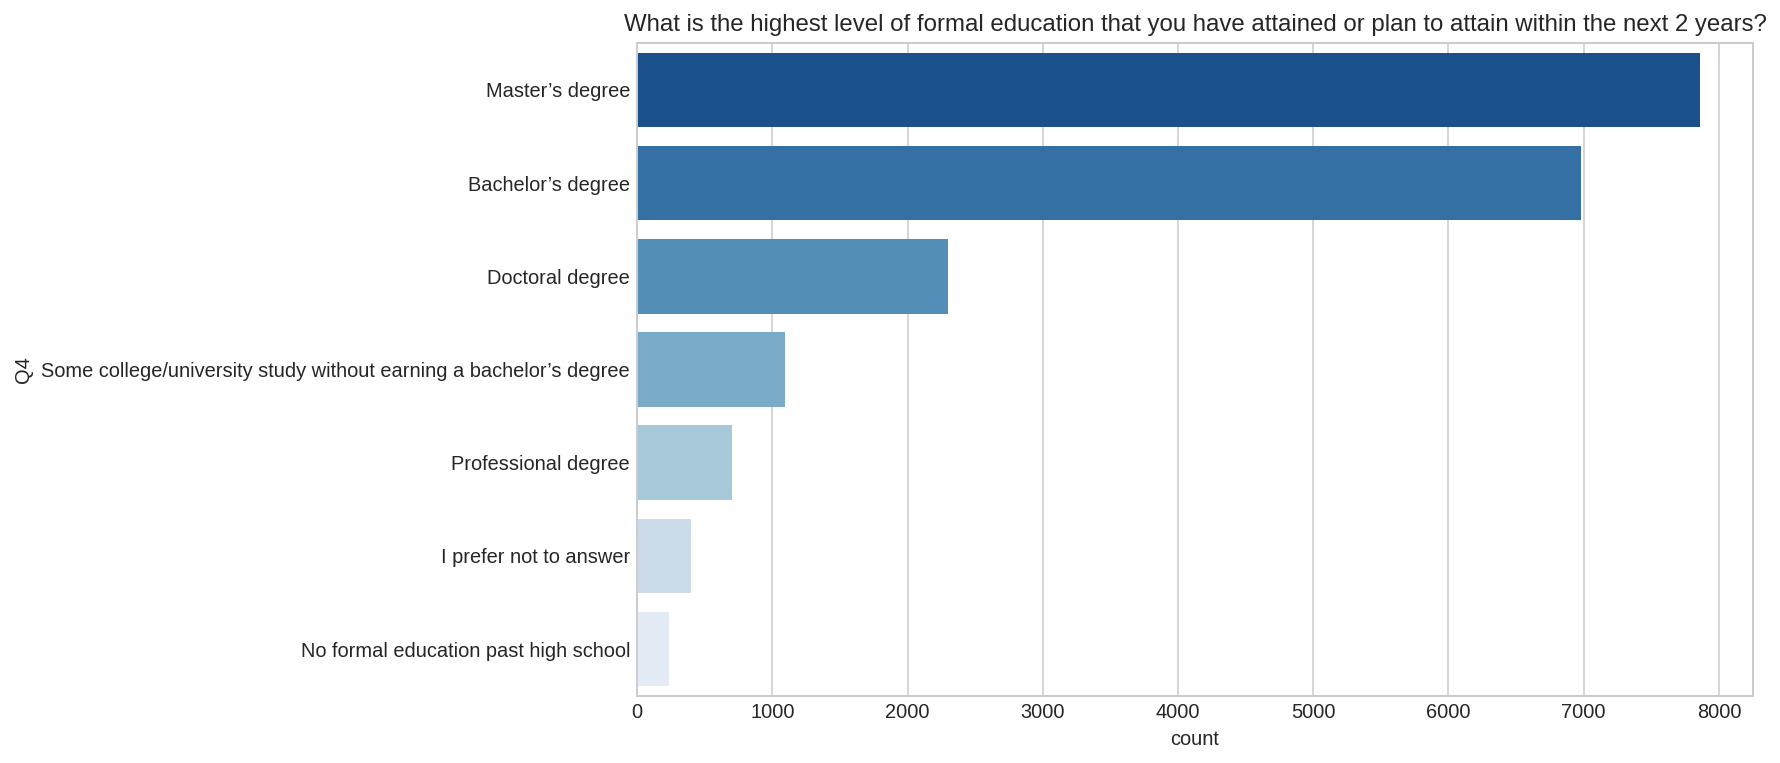

In [41]:
show_countplot_by_qno("Q4")

## Q5 Select the title most similar to your current role(or most recent title if retired):

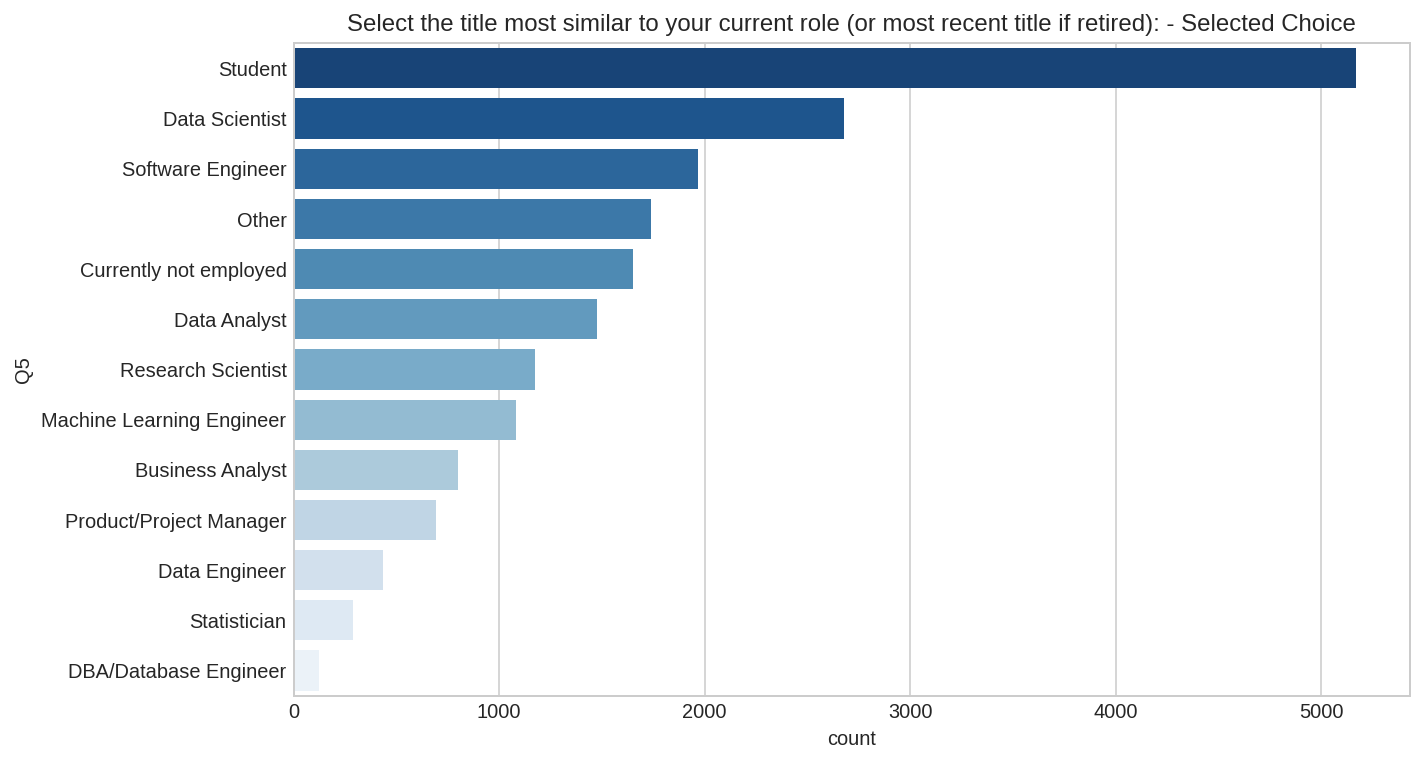

In [42]:
show_countplot_by_qno("Q5")

## Q6 For how many years have you been writing code and/or programming?

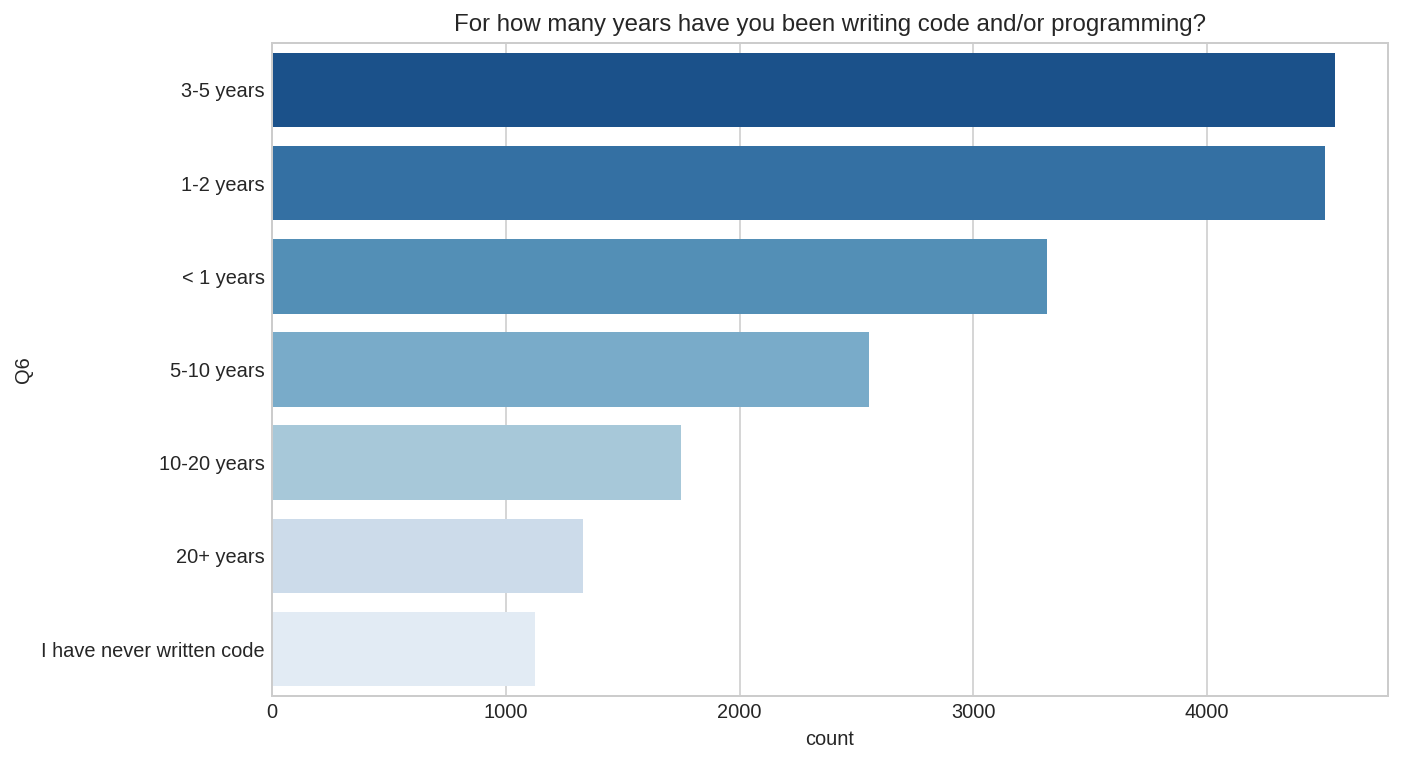

In [43]:
show_countplot_by_qno("Q6")

In [49]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years','3-5 years',
          '5-10 years',
          '10-20 years','20+ years']

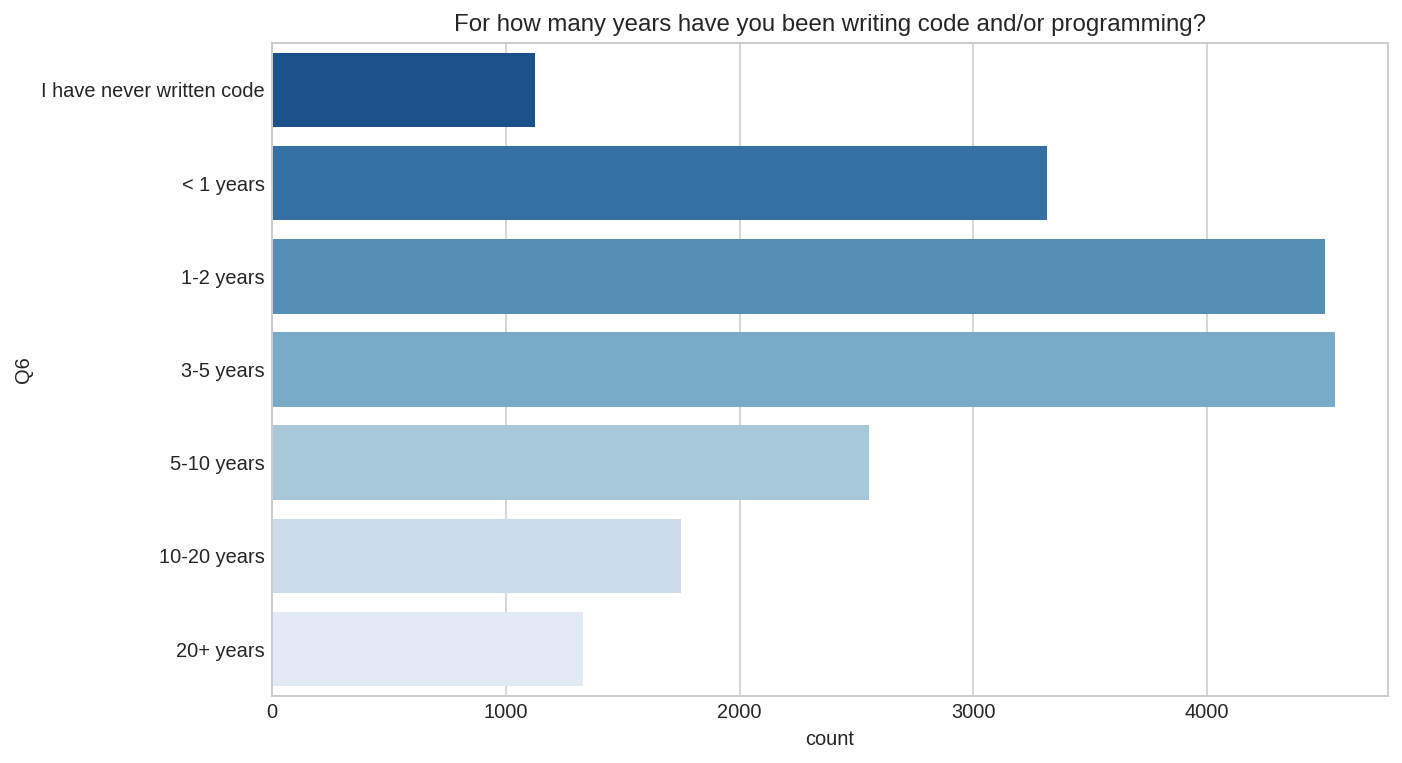

In [50]:
show_countplot_by_qno("Q6", order=q6_cols)

## Q7 What programming languages do you use on a regular basis?(select all that apply)

🐼 pandas filter & describe

In [51]:
question.filter(regex = "Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [52]:
answer_Q7 = answer.filter(regex= "Q7")
answer_Q7

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

In [53]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

In [54]:
answer_Q7_count = answer_Q7_desc.loc[["top","count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

How to get title in mutiple choice question

In [55]:
q7_title = question.filter(regex="Q7")[0].split("-")[0]

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

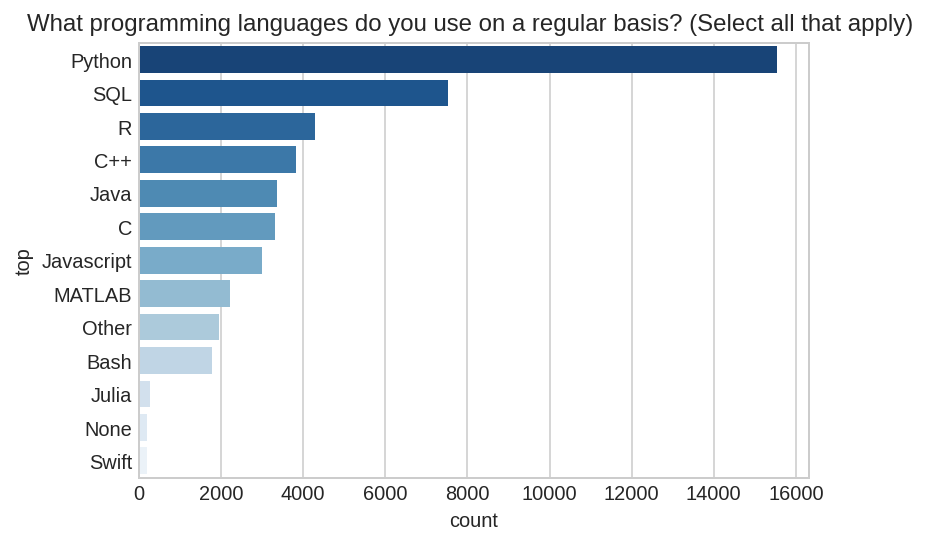

In [56]:
sns.barplot(data=answer_Q7_count,
           y=answer_Q7_count.index, x="count", palette="Blues_r").set_title(q7_title)

### define get_question_title function

In [57]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = question.filter(regex=qno)[0].split("-")[0]
        return q_no

get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

### define get_multiple_choice_answer

In [58]:
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[["top","count"]].T.set_index("top")
    answer_count = answer_count.sort_values(by="count", ascending=False)
    return answer_count

In [59]:
get_multiple_choice_answer_by_qno("Q9")

count
top                                                 
Jupyter (JupyterLab, Jupyter Notebooks, etc)   11211
Visual Studio Code (VSCode)                     5873
 PyCharm                                        5099
 RStudio                                        3826
  Spyder                                        3290
  Notepad++                                     3132
  Sublime Text                                  2452
Visual Studio                                   2445
 MATLAB                                         1604
  Vim / Emacs                                   1502
Other                                           1162
None                                             386

📊 define show_multiple_choice_bar_plot_by_qno function

In [60]:
def show_multiple_choice_bar_plot_by_qno(qno):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
    plt.figure(figsize=(10,6))
    sns.barplot(data=multiple_choice_answer,
               y= multiple_choice_answer.index,
               x="count",
               palette="Blues_r").set_title(get_question_title_by_qno(qno))

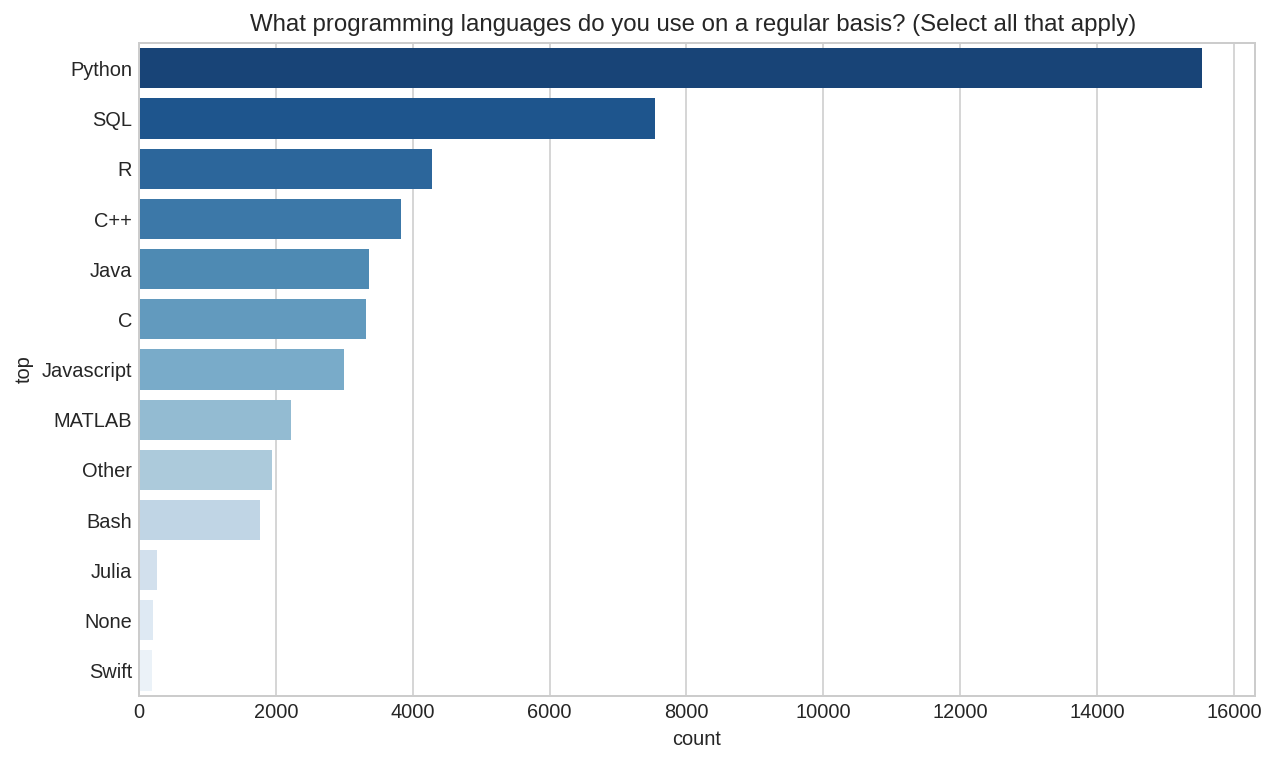

In [61]:
show_multiple_choice_bar_plot_by_qno("Q7")

In [66]:
q7_cols = answer.filter(regex="Q7").describe().loc["top"].tolist()

In [68]:
q2q7=answer.filter(regex="Q7|Q2$")
q2q7_count = q2q7.groupby("Q2").count()
q2q7_count.columns = q7_cols
q2q7_count

Python     R   SQL     C   C++  Java  Javascript  \
Q2                                                                          
Man                       12530  3299  5940  2552  3063  2641        2487   
Nonbinary                    41    14    20     8    10     1           6   
Prefer not to say           182    48    97    36    43    42          41   
Prefer to self-describe      41     8    18    12    13     9          12   
Woman                      2736   908  1460   707   698   674         449   

                         Julia  Swift  Bash  MATLAB  None  Other  
Q2                                                                
Man                        238    171  1561    1679   149   1634  
Nonbinary                    1      2    10       7     0      7  
Prefer not to say            5      4    31      28     6     31  
Prefer to self-describe      2      1    10       6     0      7  
Woman                       16     20   164     497    51    266

<AxesSubplot:title={'center':'Gender & Programming Language'}>

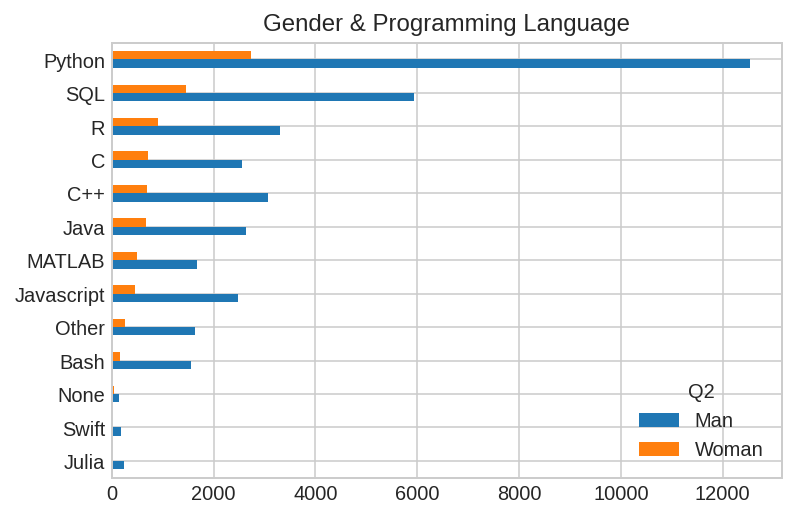

In [76]:
q2q7_count.loc[["Man","Woman"]].T.sort_values("Woman").plot.barh(title="Gender & Programming Language")

### define📊show_plot_by_qno

In [80]:
#show_countplot_by_qno("Q7")
#show_multiple_choice_bar_plot_by_qno("Q1")

In [81]:
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [84]:
def show_plot_by_qno(qno):
    if qno in question.index:
        show_countplot_by_qno(qno)
    else:
        show_multiple_choice_bar_plot_by_qno(qno)

## Q8 What programming language would you recommend an aspiring data scientist to learn first? -Selected Choice

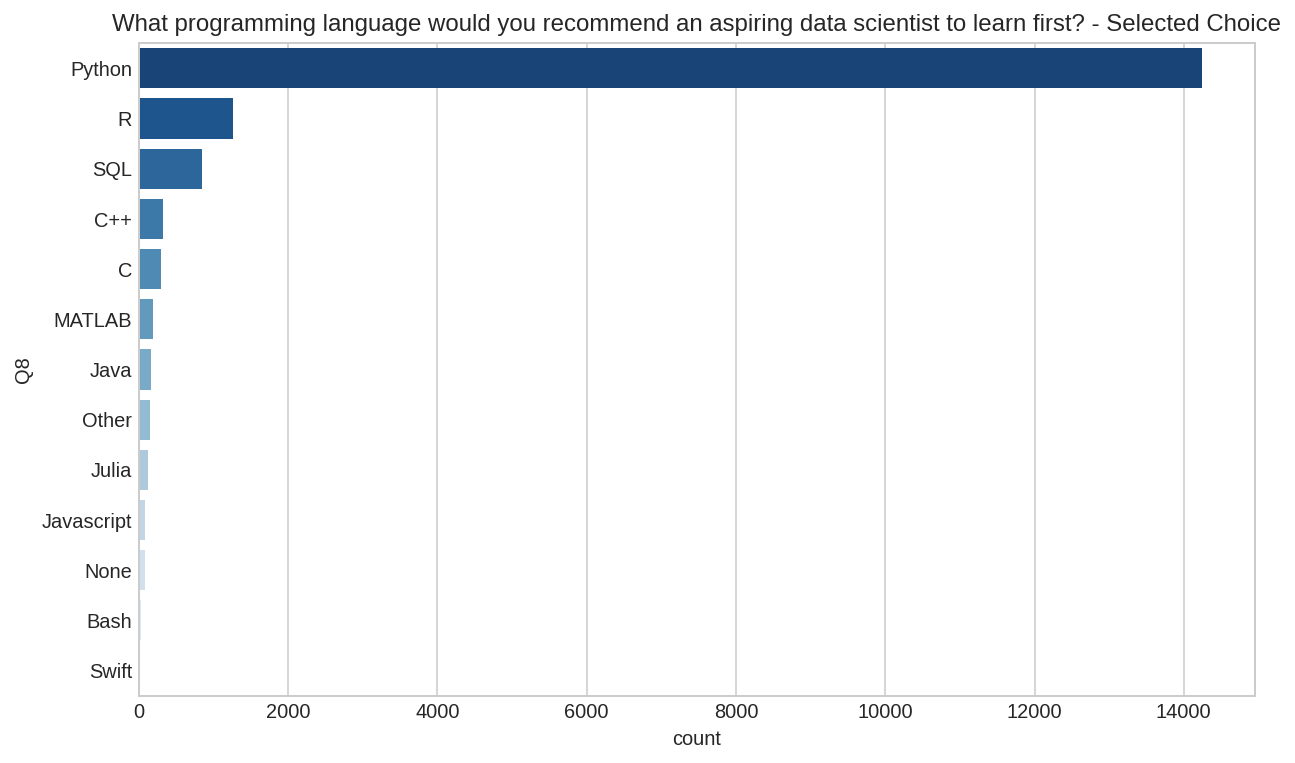

In [85]:
show_plot_by_qno("Q8")

## Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?(Select all that apply)

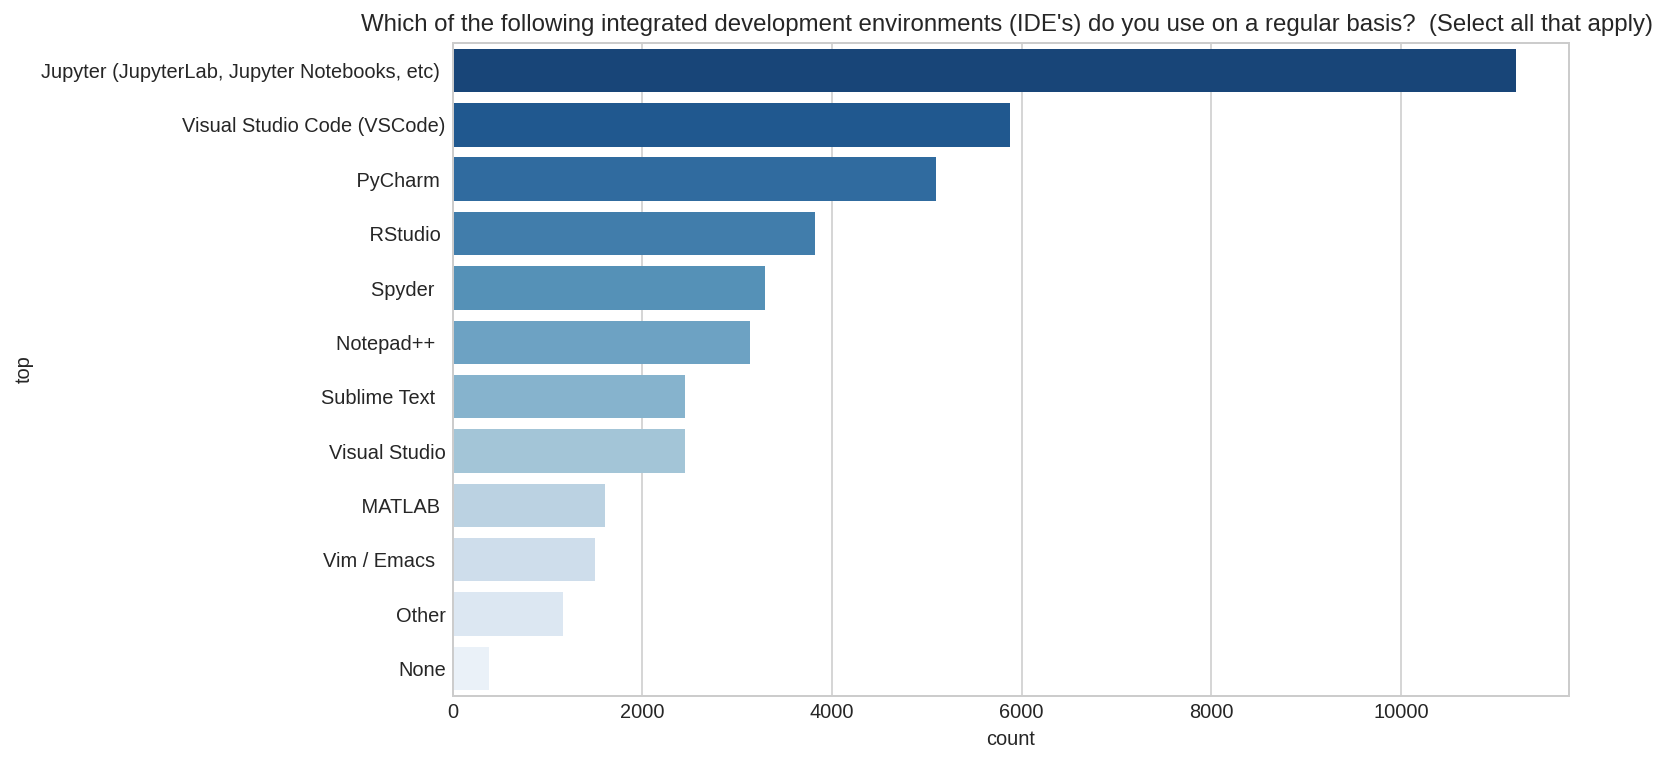

In [86]:
show_plot_by_qno("Q9")

## Q10 Which of the following hosted notebook products do you use on a regular basis? (Select all that apply)

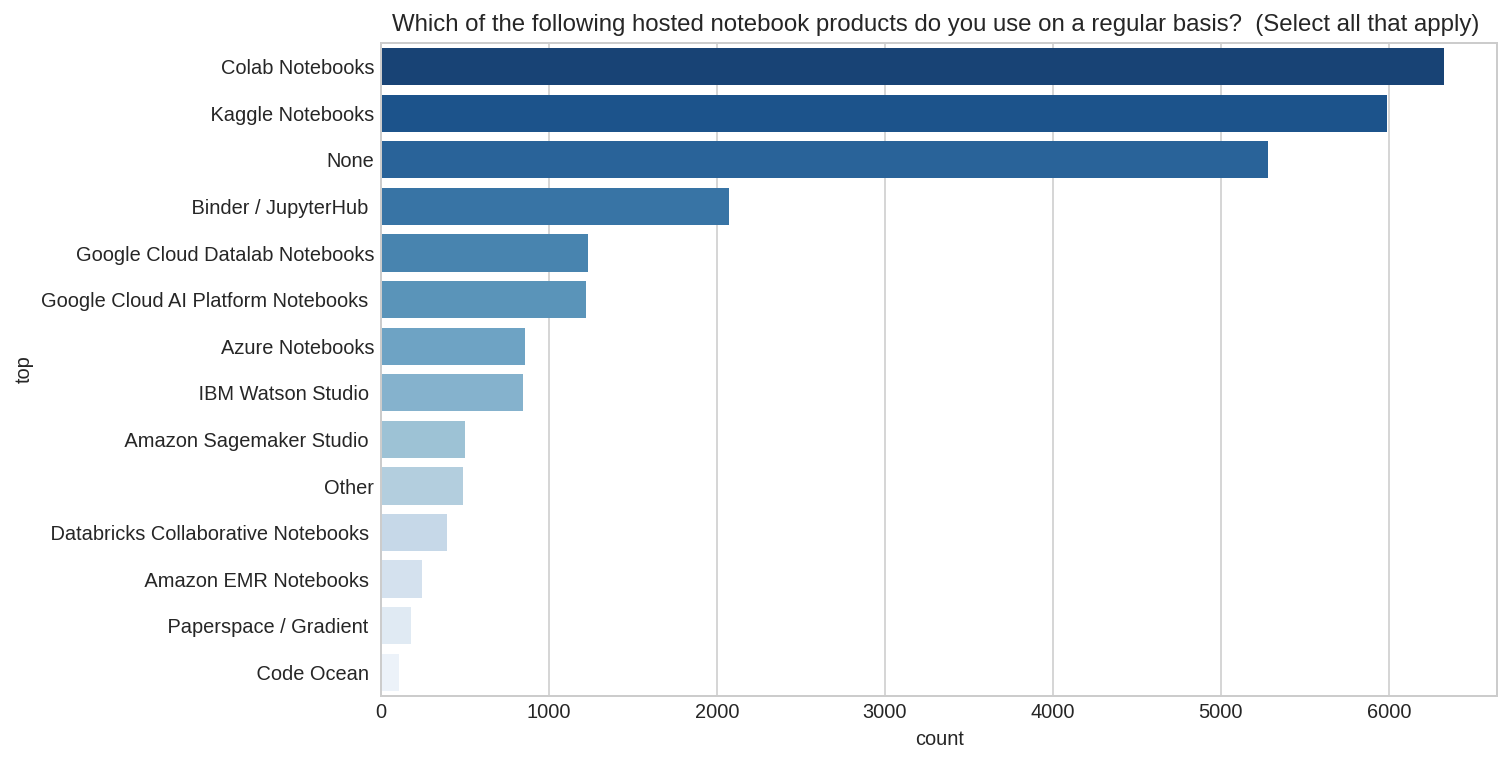

In [87]:
show_plot_by_qno("Q10")

## Q11 What type of computing platform do you use most often for your data science projects? - Selected Choice

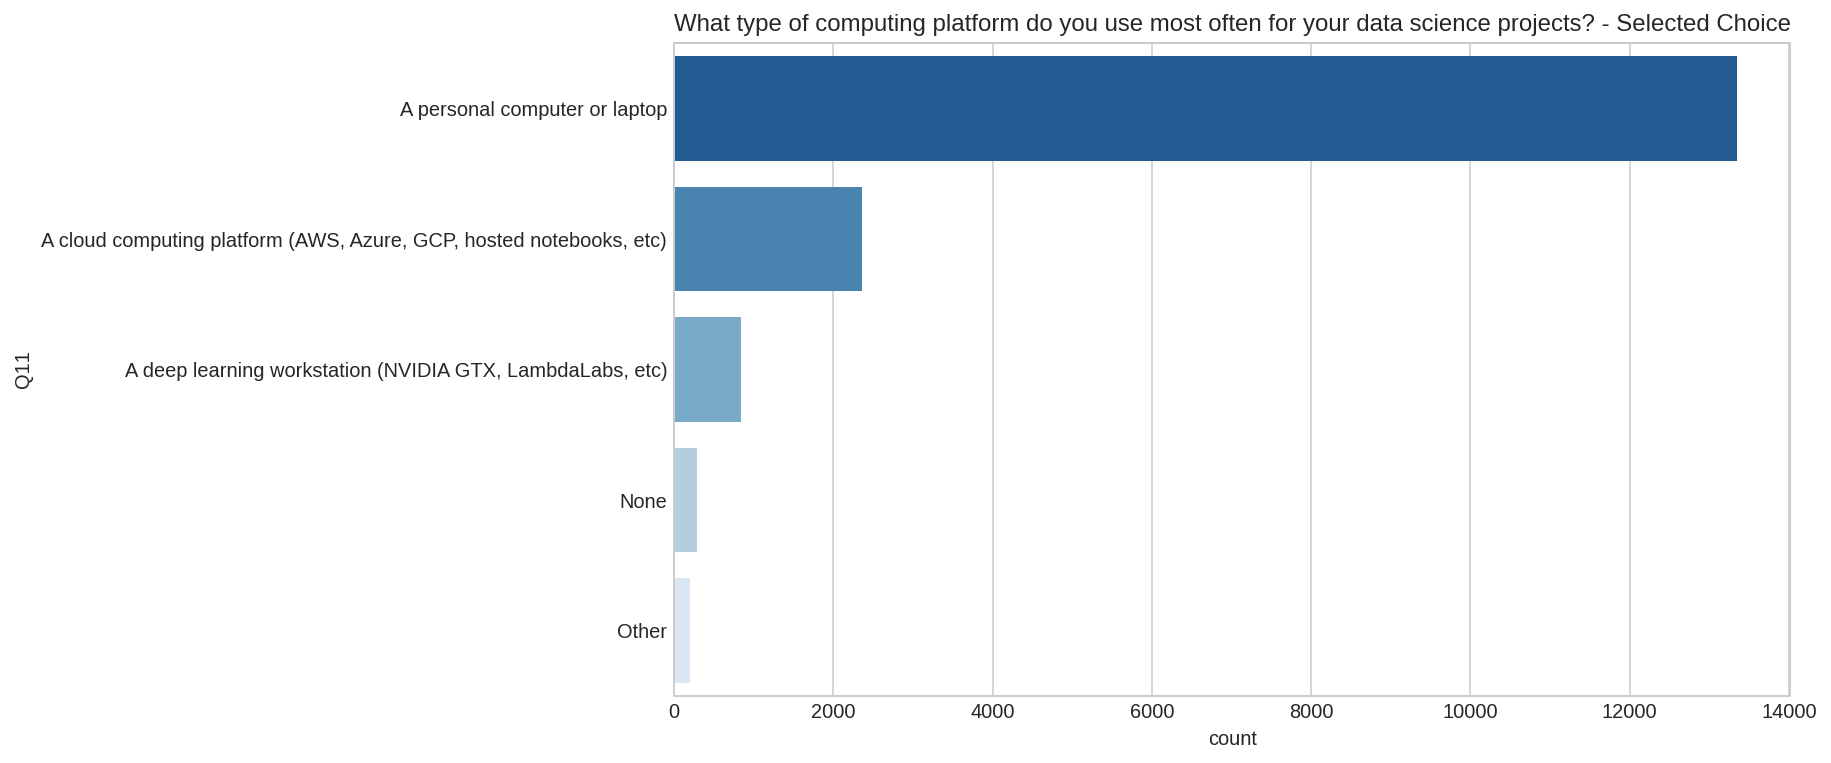

In [88]:
show_plot_by_qno("Q11")

## Q12 Which types of specialized hardware do you use on a regular basis?

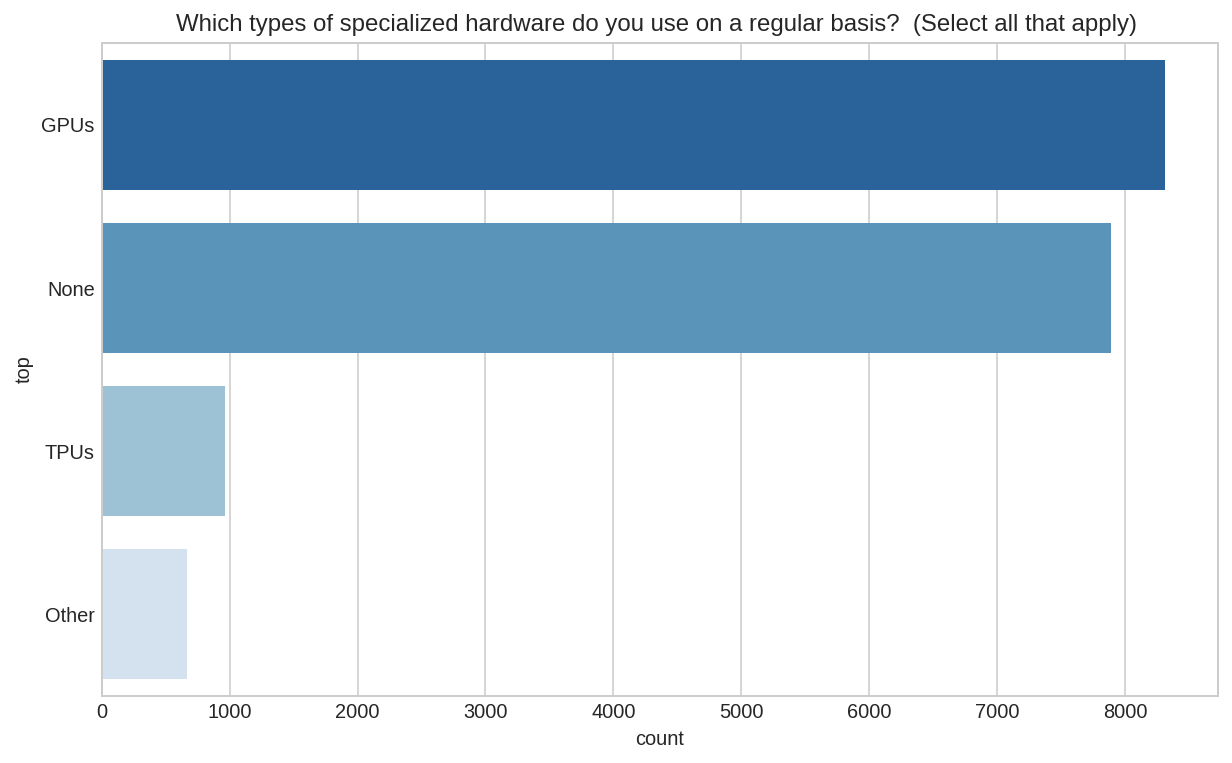

In [90]:
show_plot_by_qno("Q12")

## Q13 Approximately how many times have you used a TPU (tensor processing unit)?

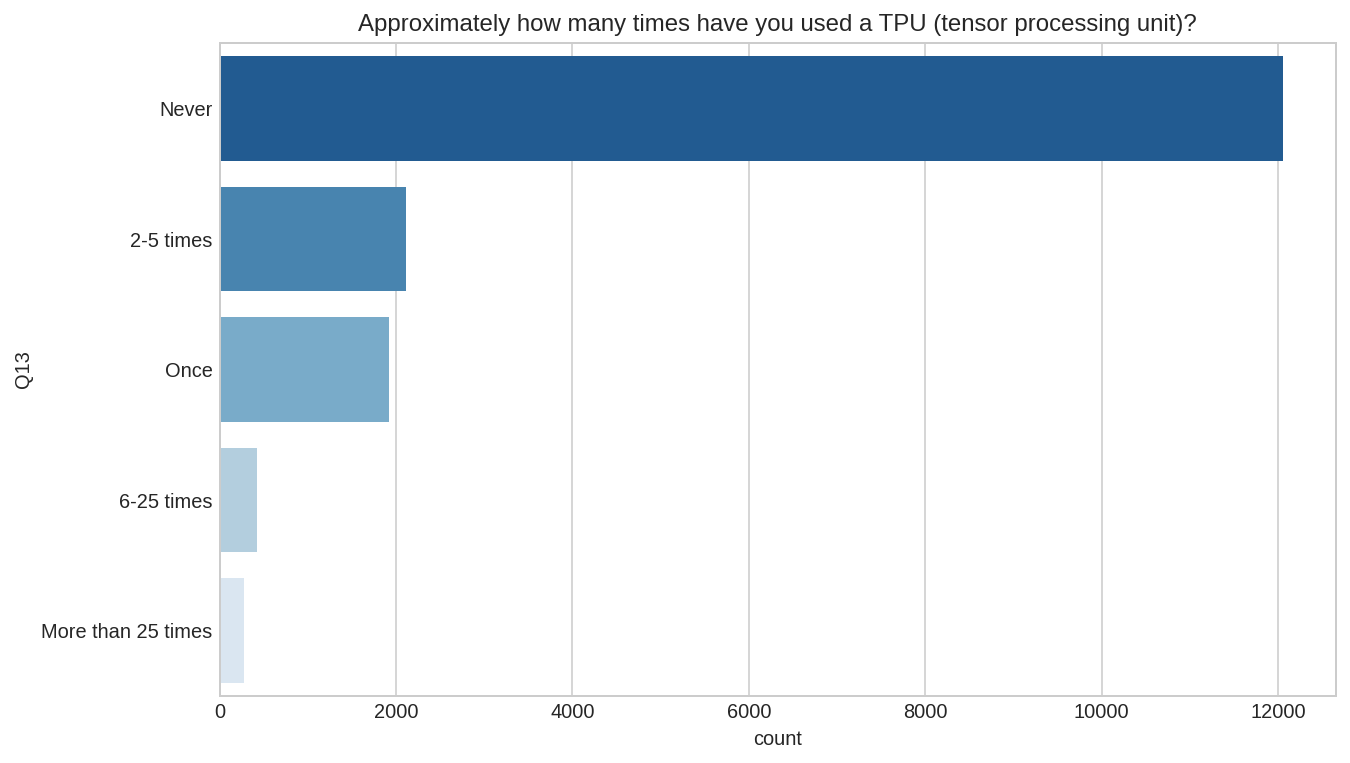

In [92]:
show_plot_by_qno("Q13")

## Q14 What data visualization libraries or tools do you use on an regular basis? (Select all that apply)

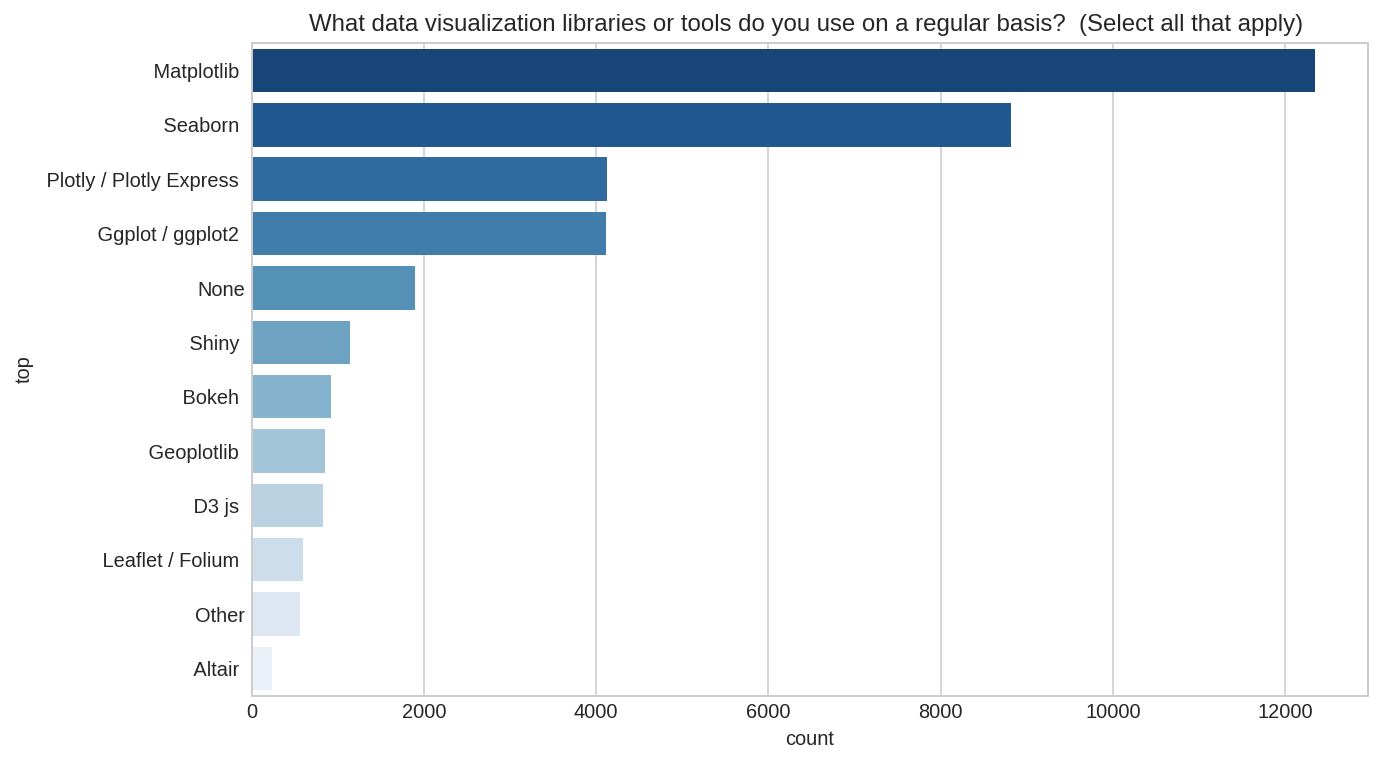

In [93]:
show_plot_by_qno("Q14")

## Q15 For how many years have you used machine learning methods?

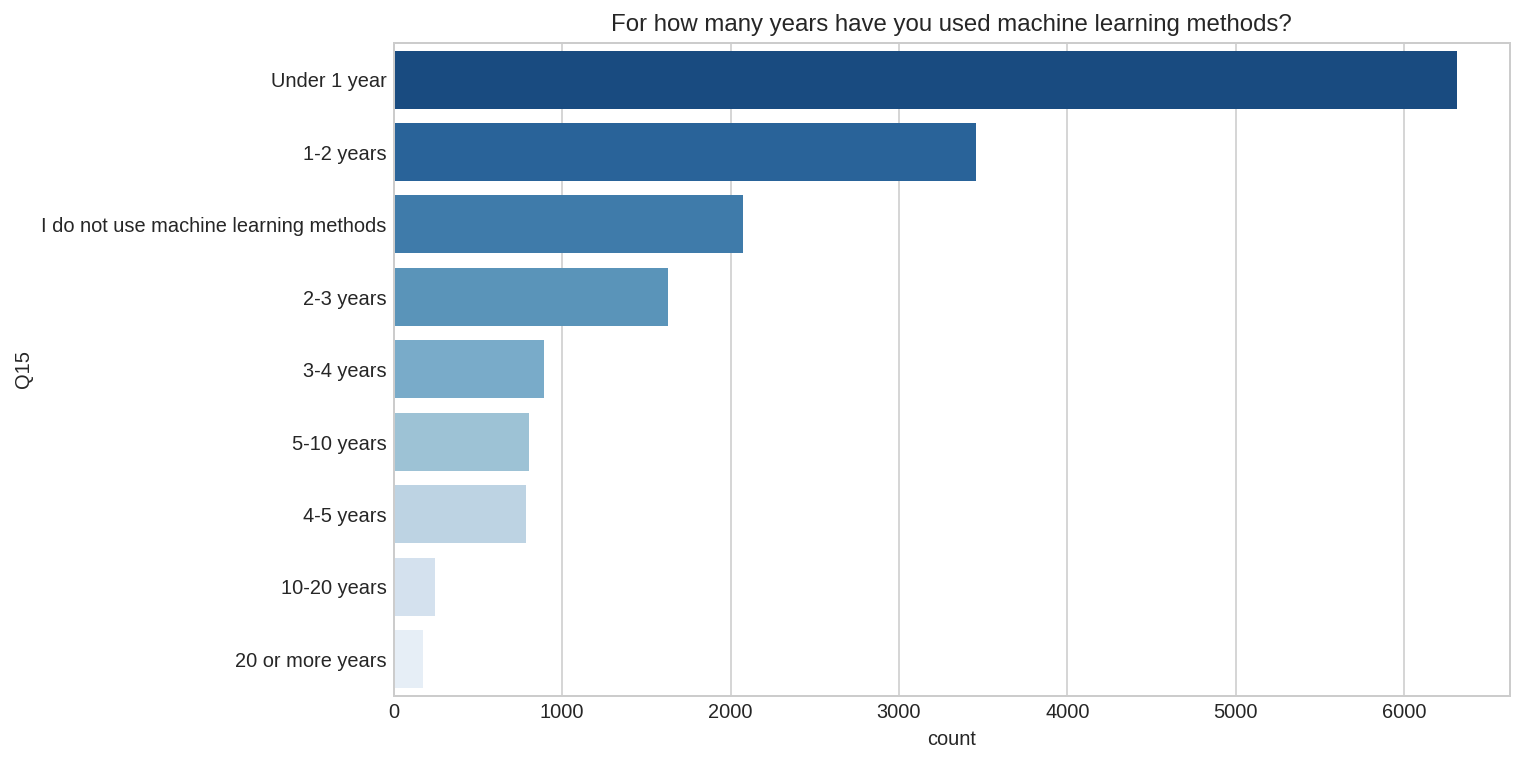

In [94]:
show_plot_by_qno("Q15")

## Q16 Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)¶

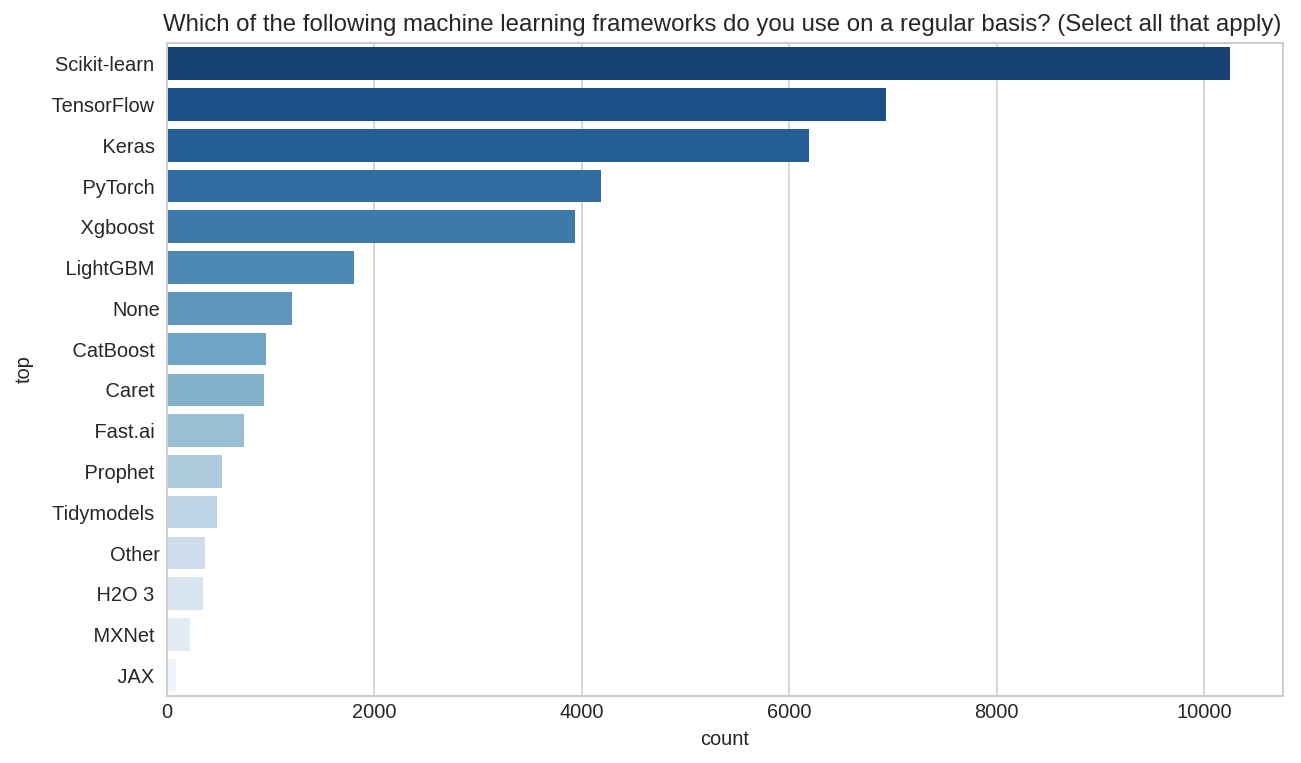

In [95]:
show_plot_by_qno("Q16")

## Q17 Which of the following ML algorithms do you use on a regular basis?(Select all that apply):

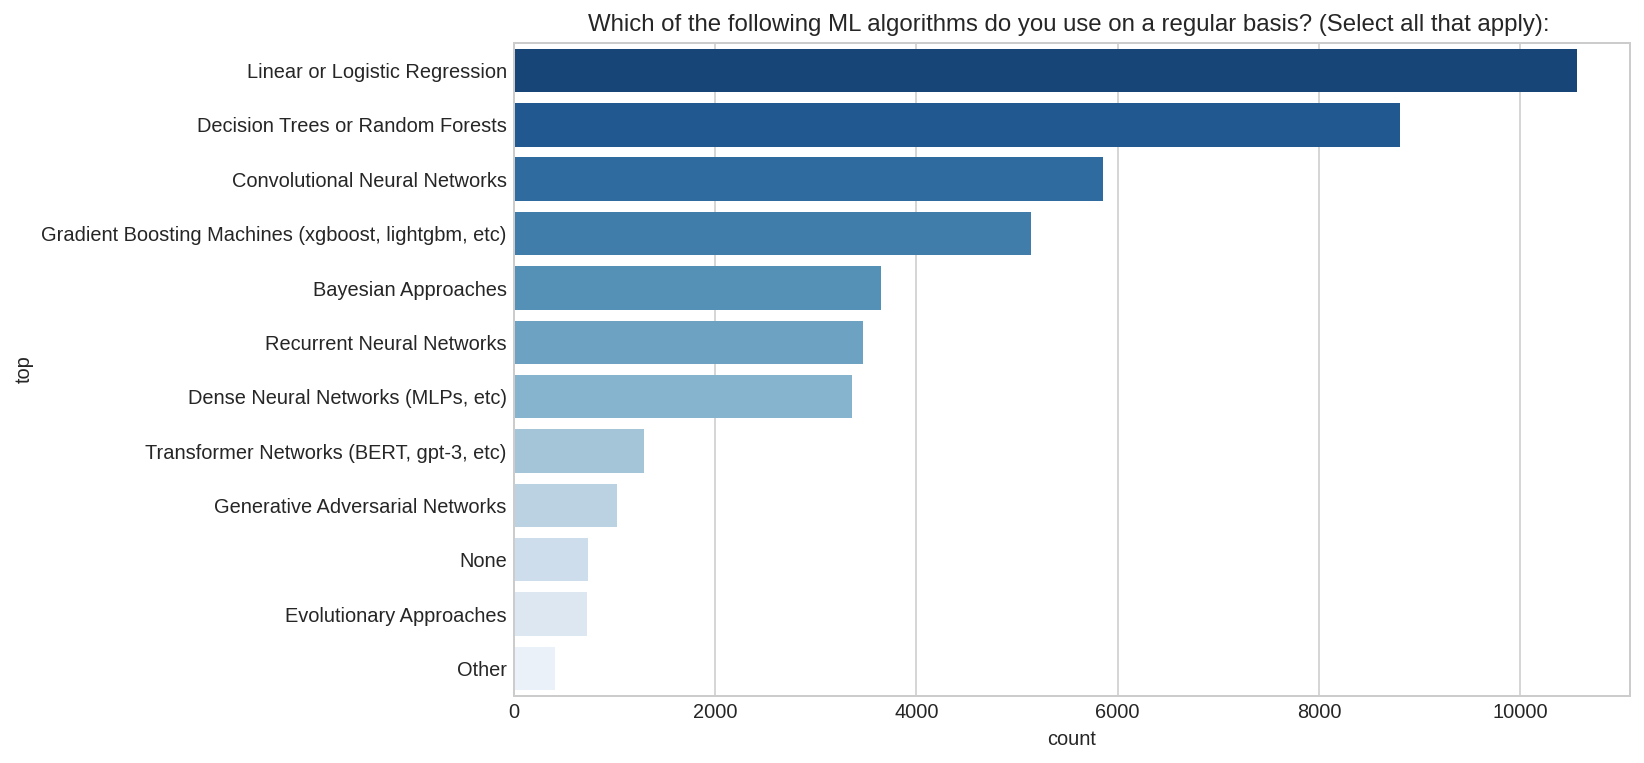

In [96]:
show_plot_by_qno("Q17")

## Q18 Which categories of computer vision menthods do you use on an regular basis?(Select all that apply)

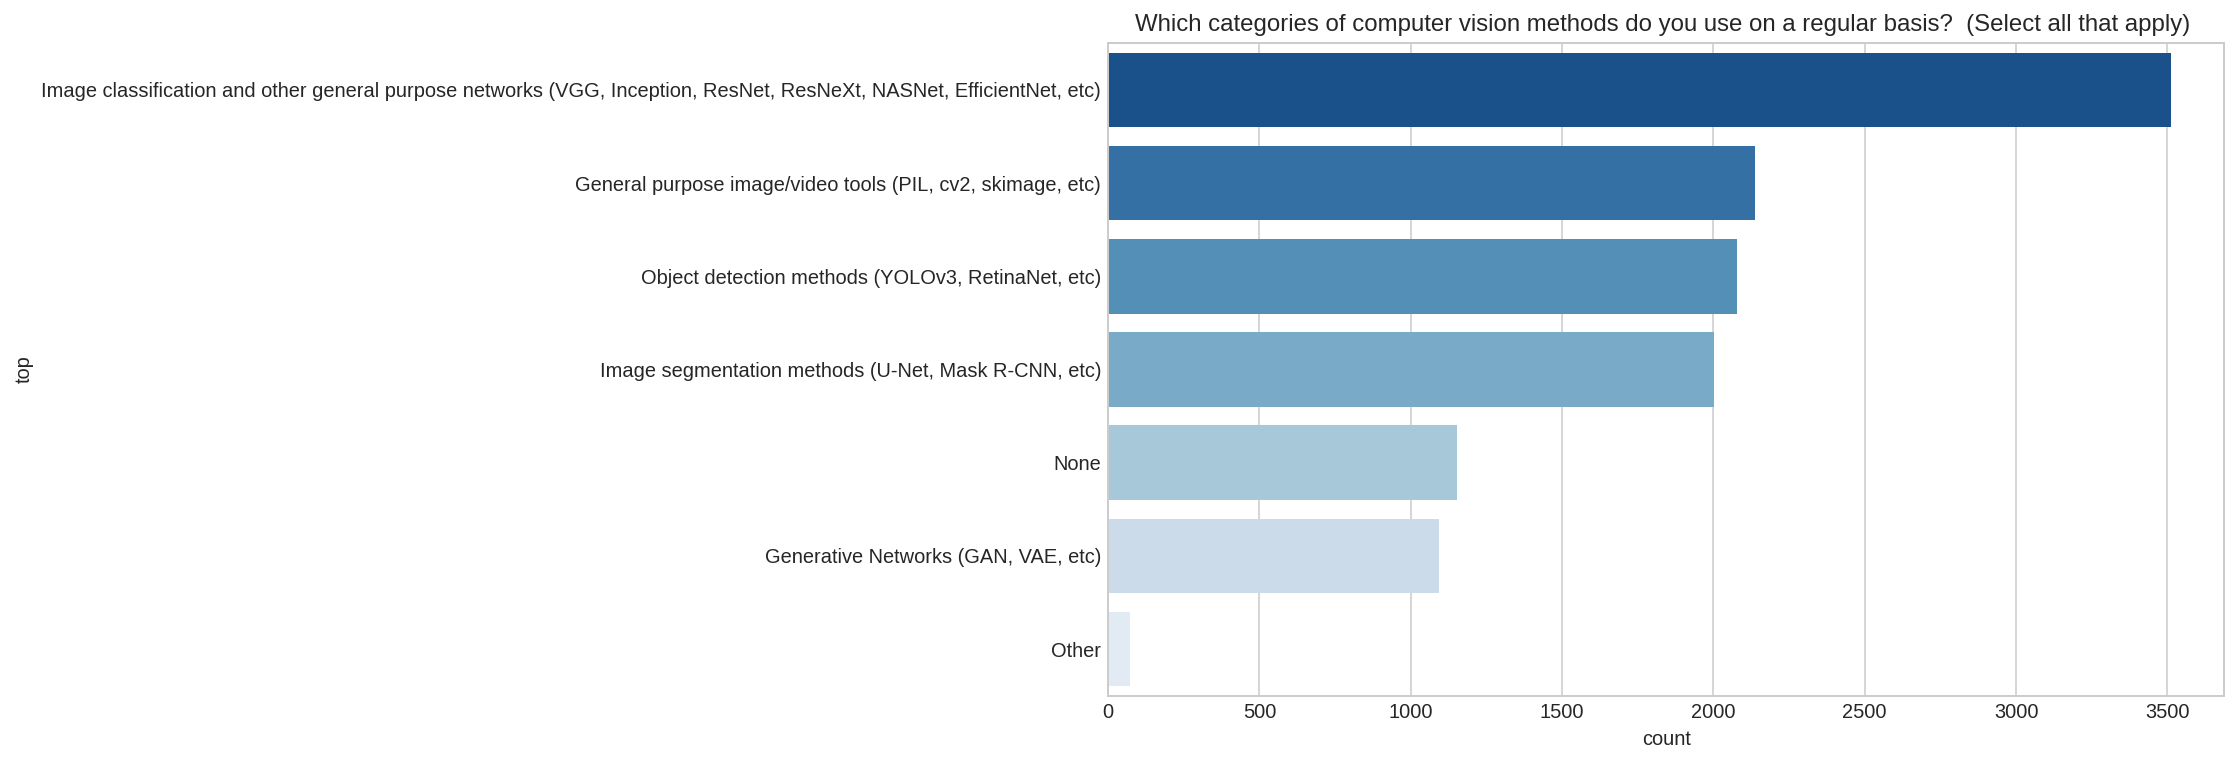

In [97]:
show_plot_by_qno("Q18")

## Q19  Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply)

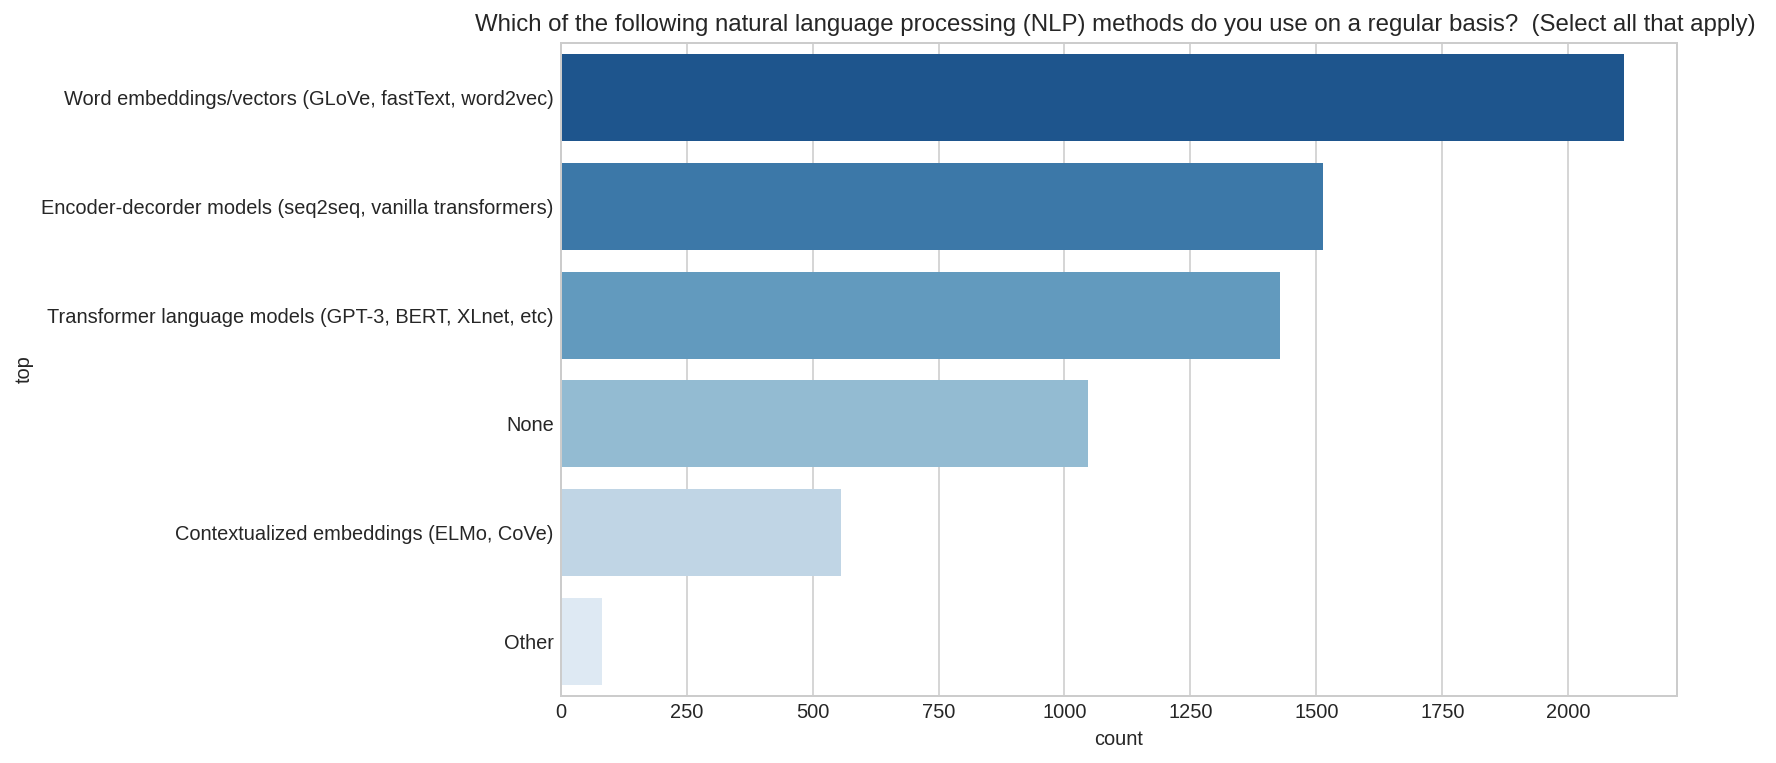

In [98]:
show_plot_by_qno("Q19")

## Q20 What is the size of the company where you are employed?

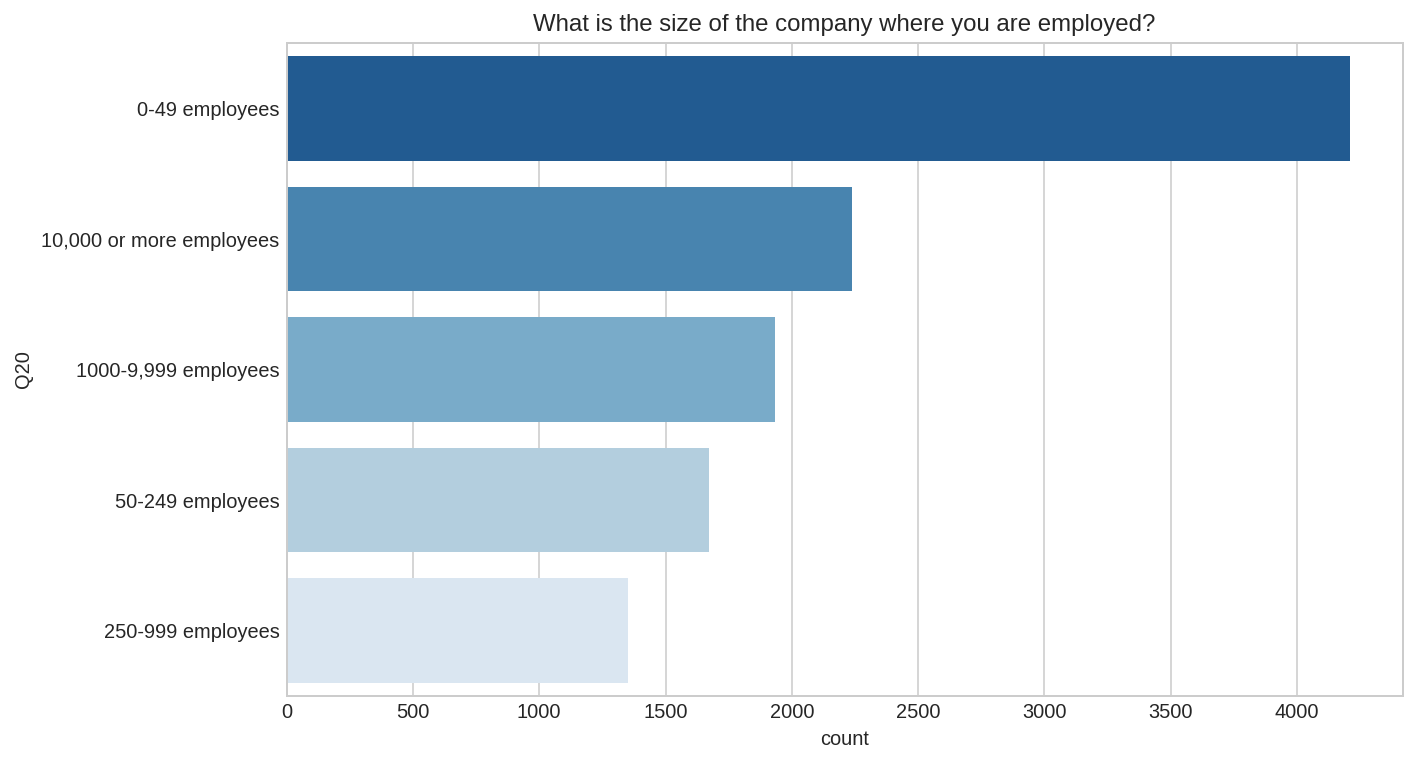

In [99]:
show_plot_by_qno("Q20")

## Q21 Approximately how many individuals are responsible for data science workloads at your place of business?

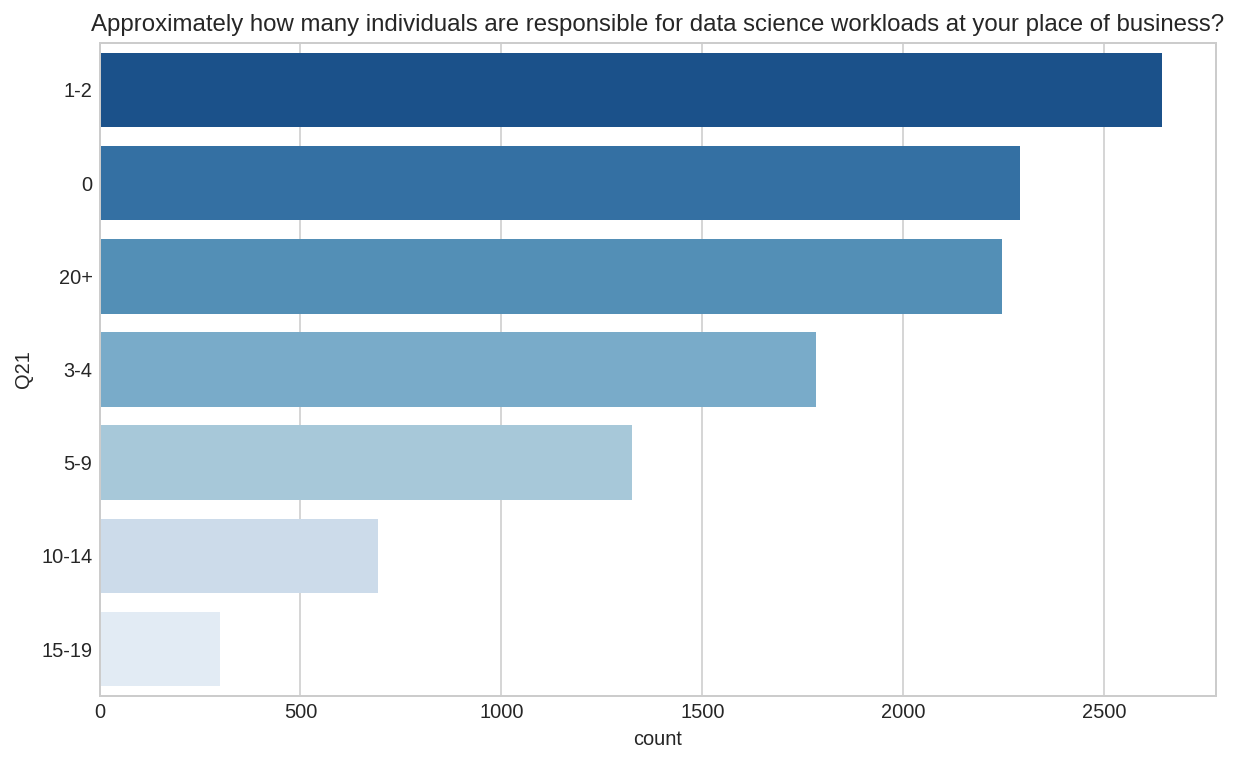

In [100]:
show_plot_by_qno("Q21")

## Q22 Does your current employer incorporate machine learning methods into their business?

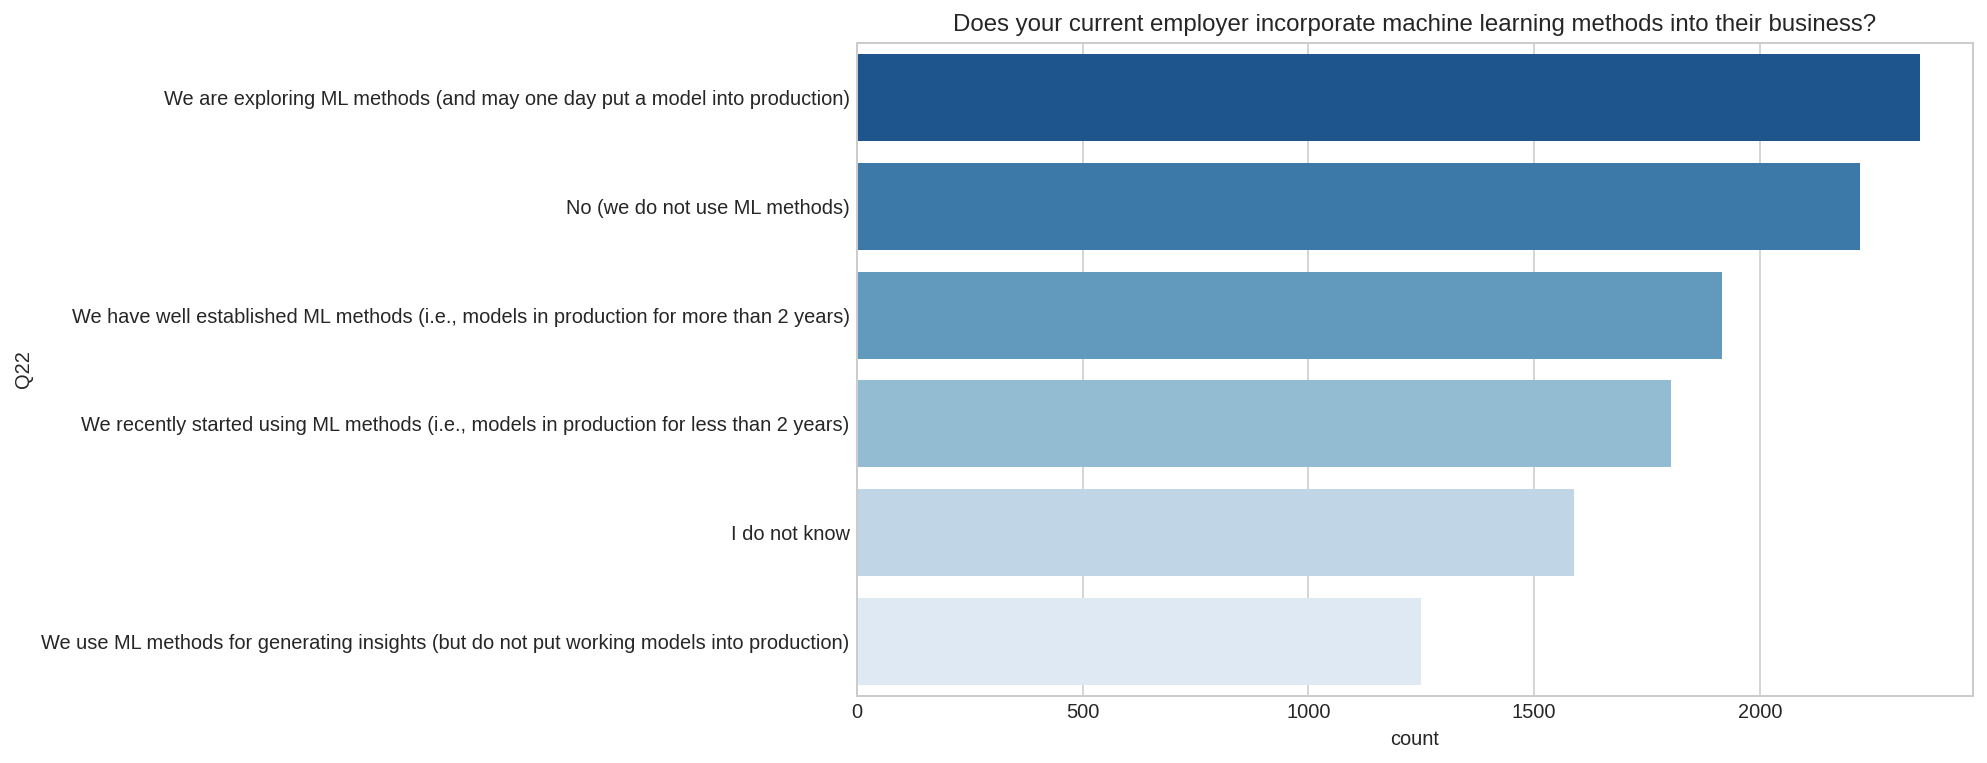

In [101]:
show_plot_by_qno("Q22")

## Q23 Select any activities that make up an important part of your role at work: (Select all that apply)

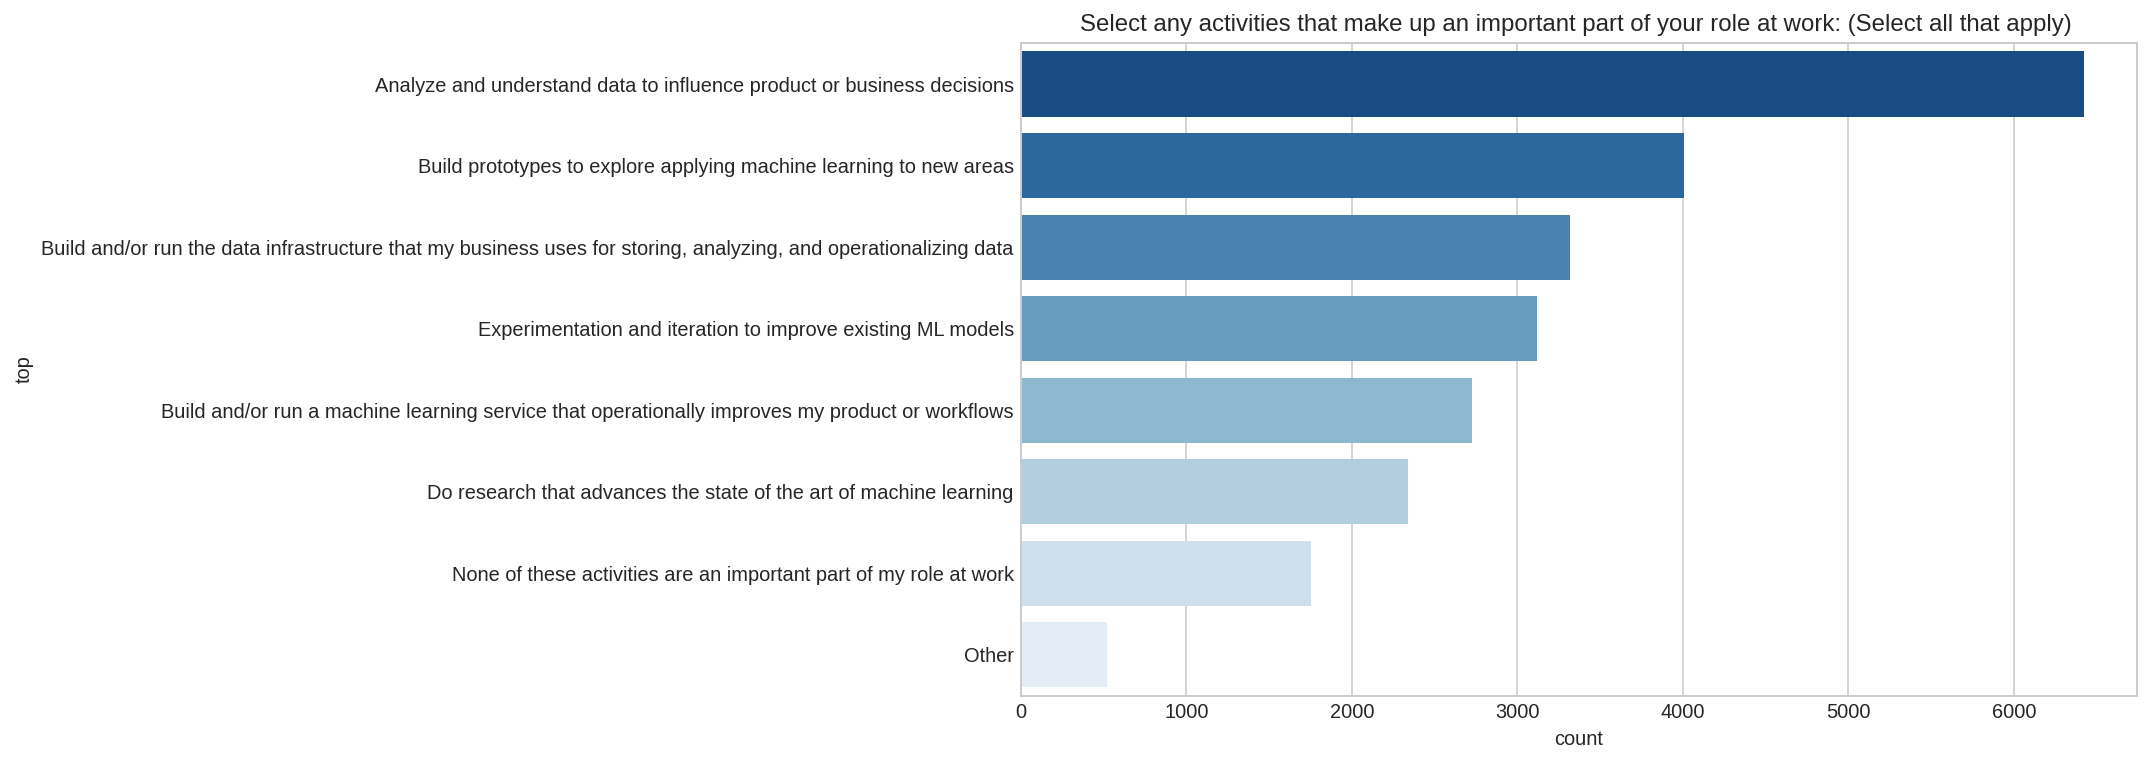

In [102]:
show_plot_by_qno("Q23")

## Q24 What is your current yearly compensation (approximate $USD)

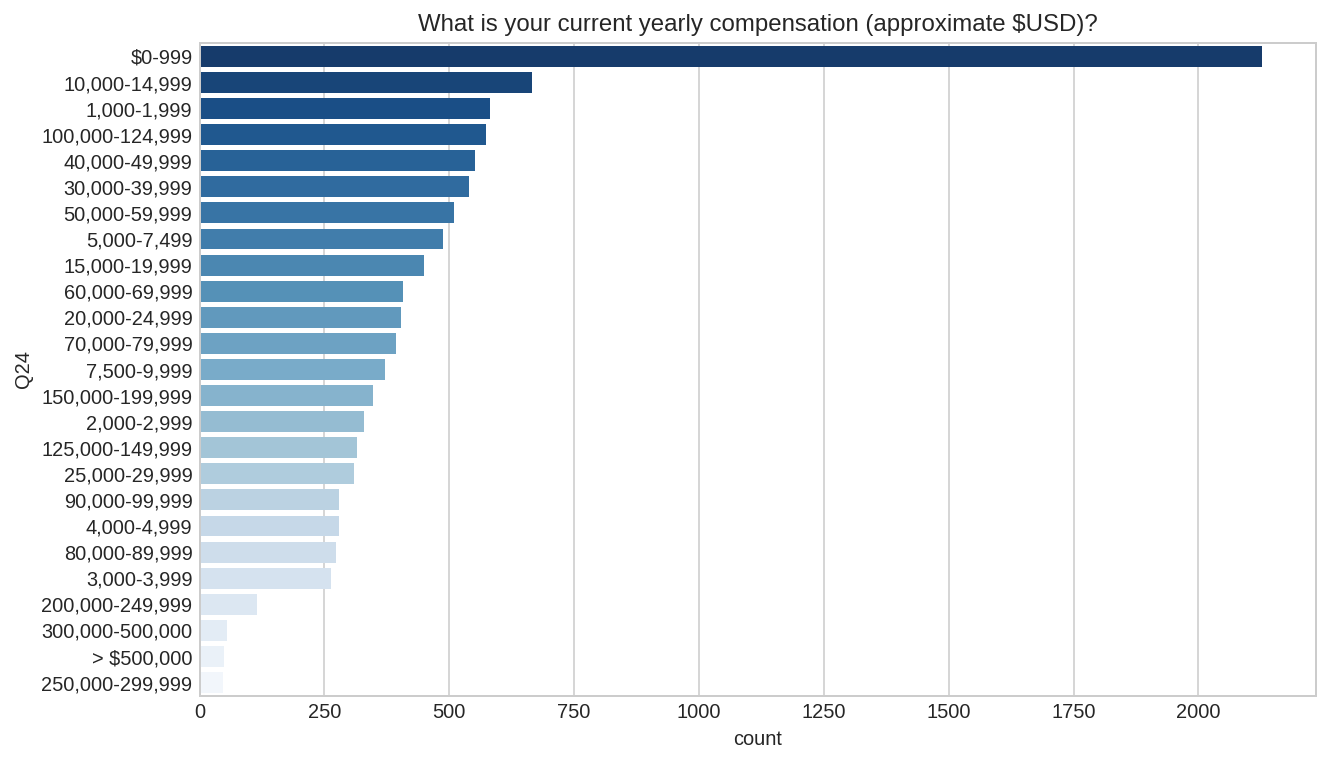

In [103]:
show_plot_by_qno("Q24")

In [108]:
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range", "count"]
q24_count

range  count
0            $0-999   2128
1     10,000-14,999    665
2       1,000-1,999    581
3   100,000-124,999    573
4     40,000-49,999    552
5     30,000-39,999    540
6     50,000-59,999    510
7       5,000-7,499    488
8     15,000-19,999    449
9     60,000-69,999    408
10    20,000-24,999    404
11    70,000-79,999    394
12      7,500-9,999    371
13  150,000-199,999    347
14      2,000-2,999    330
15  125,000-149,999    315
16    25,000-29,999    310
17    90,000-99,999    280
18      4,000-4,999    279
19    80,000-89,999    273
20      3,000-3,999    264
21  200,000-249,999    115
22  300,000-500,000     55
23       > $500,000     50
24  250,000-299,999     48

In [113]:
q24_count["min"] = q24_count["range"].str.split("-", expand=True)[0]
q24_count["max"] = q24_count["range"].str.split("-", expand=True)[1]
q24_count["min"] = q24_count["min"].str.replace(",|\$|>","").astype(int)
q24_count = q24_count.sort_values("min")
q24_count

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


range  count     min      max
0            $0-999   2128       0      999
2       1,000-1,999    581    1000    1,999
14      2,000-2,999    330    2000    2,999
20      3,000-3,999    264    3000    3,999
18      4,000-4,999    279    4000    4,999
7       5,000-7,499    488    5000    7,499
12      7,500-9,999    371    7500    9,999
1     10,000-14,999    665   10000   14,999
8     15,000-19,999    449   15000   19,999
10    20,000-24,999    404   20000   24,999
16    25,000-29,999    310   25000   29,999
5     30,000-39,999    540   30000   39,999
4     40,000-49,999    552   40000   49,999
6     50,000-59,999    510   50000   59,999
9     60,000-69,999    408   60000   69,999
11    70,000-79,999    394   70000   79,999
19    80,000-89,999    273   80000   89,999
17    90,000-99,999    280   90000   99,999
3   100,000-124,999    573  100000  124,999
15  125,000-149,999    315  125000  149,999
13  150,000-199,999    347  150000  199,999
21  200,000-249,999    115  200000  249,999
24  250,000-299,999     48  250000  299,999
22  300,000-500,000     55  300000  500,000
23       > $500,000     50  500000     None

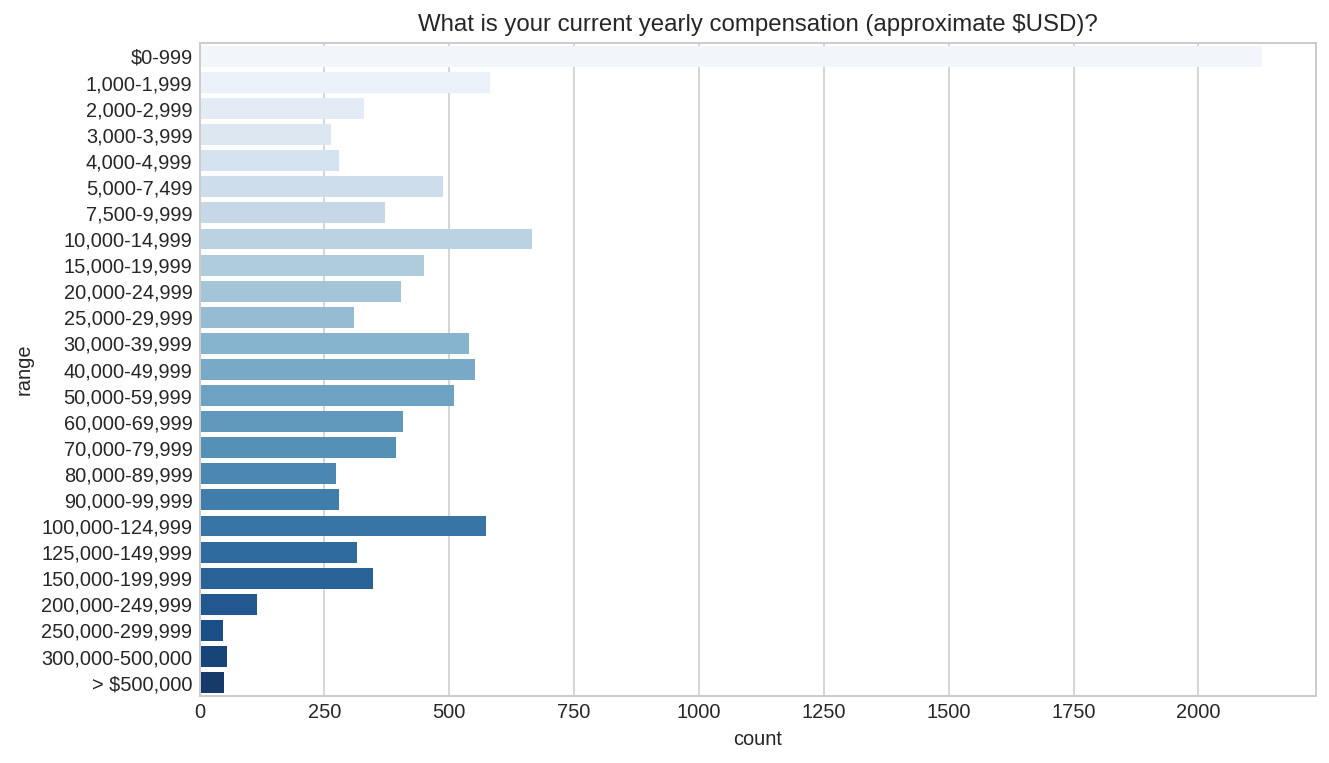

In [117]:
plt.figure(figsize=(10,6))
g = sns.barplot(data=q24_count,
               y="range", x="count",
               palette="Blues").set_title(get_question_title_by_qno("Q24"))

In [118]:
q24_cols=q24_count.range.tolist()

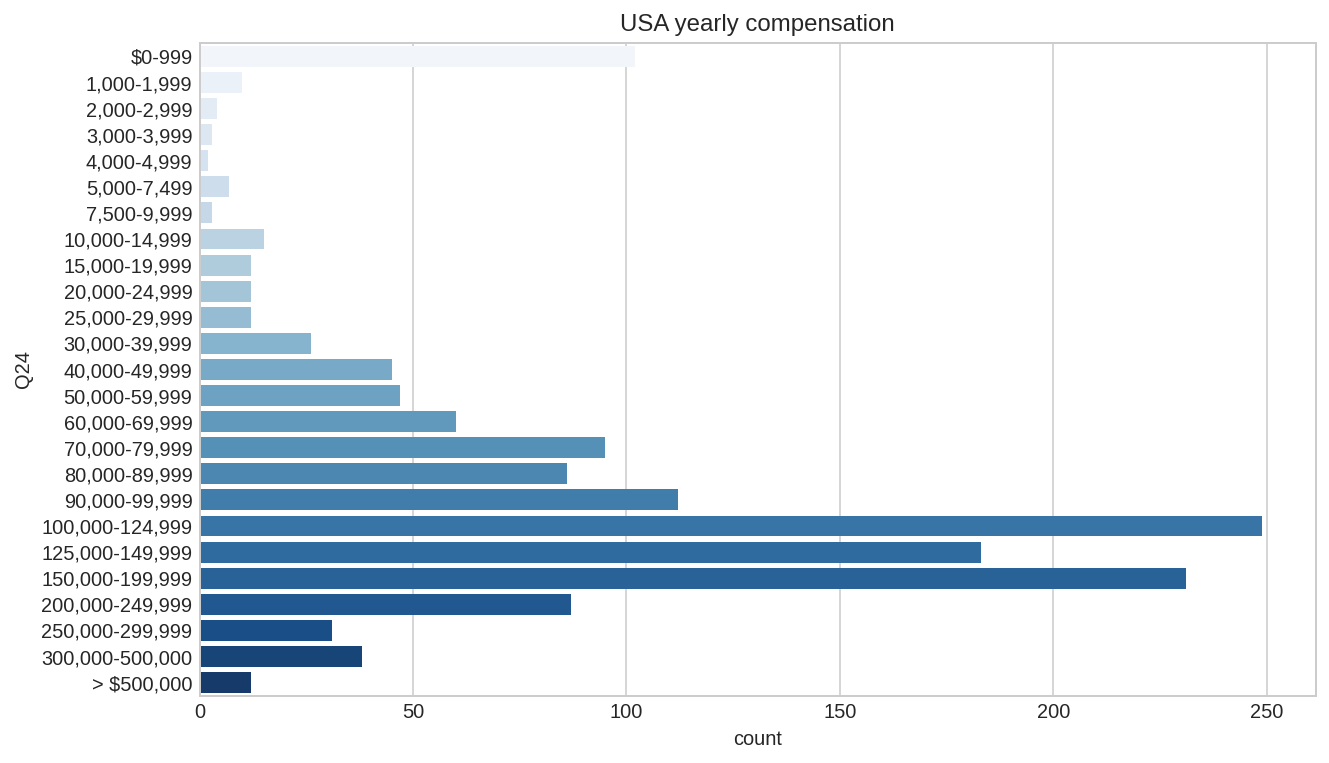

In [119]:
q3_usa = answer[answer["Q3"].isin(["United States of America"])]
plt.figure(figsize = (10,6))
g= sns.countplot(data=q3_usa,
                y="Q24",
                order=q24_cols,
                palette="Blues").set_title("USA yearly compensation")

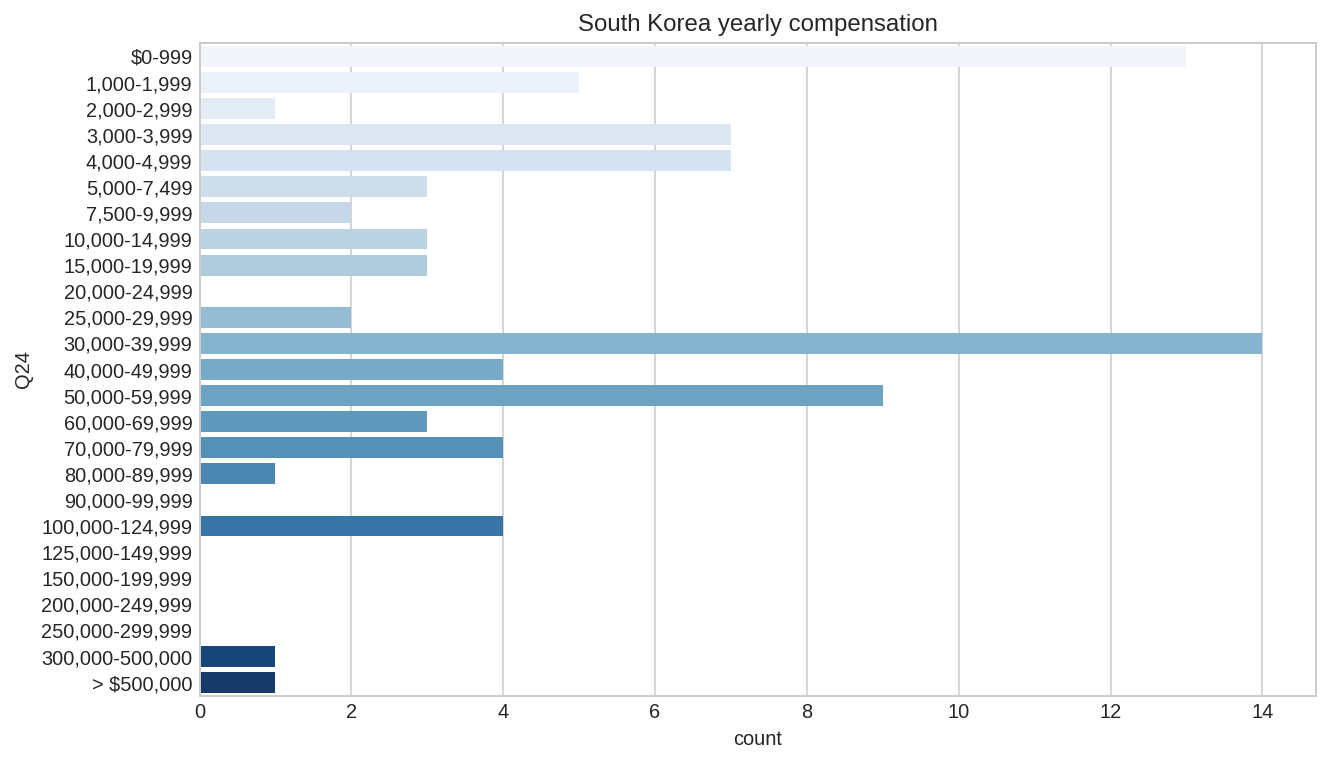

In [120]:
q3_korea = answer[answer["Q3"].isin(["South Korea"])]
plt.figure(figsize=(10,6))
g= sns.countplot(data=q3_korea,
                y="Q24",
                order=q24_cols,
                palette="Blues").set_title("South Korea yearly compensation")

## Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

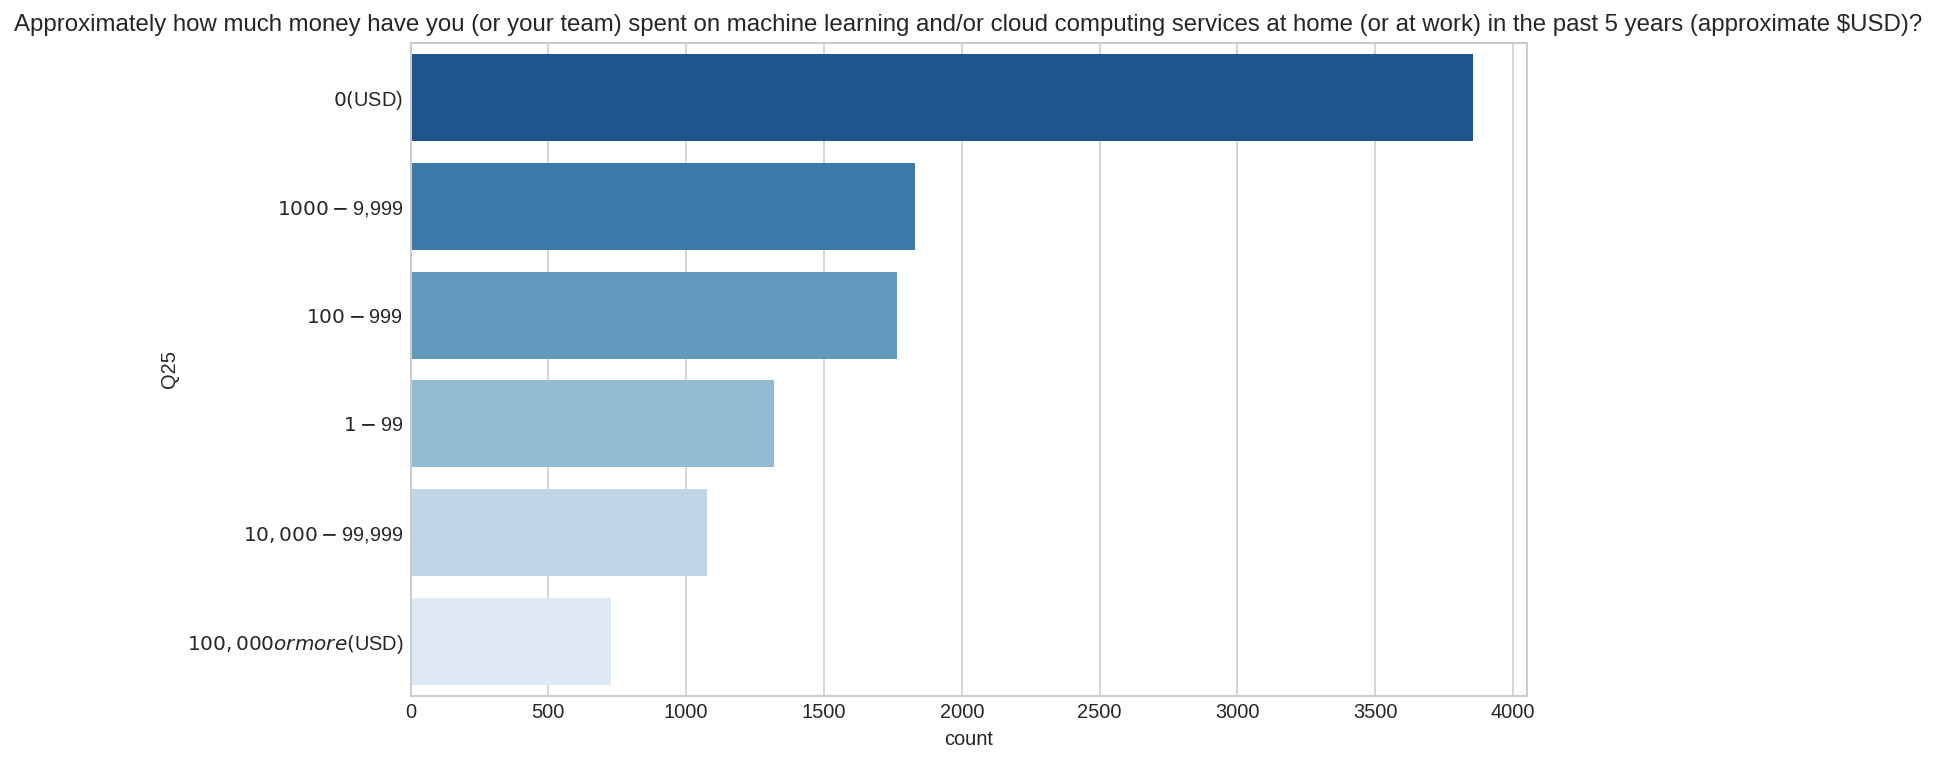

In [121]:
show_plot_by_qno("Q25")

## Q26 cloud computing platforms

#### Q26_A Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

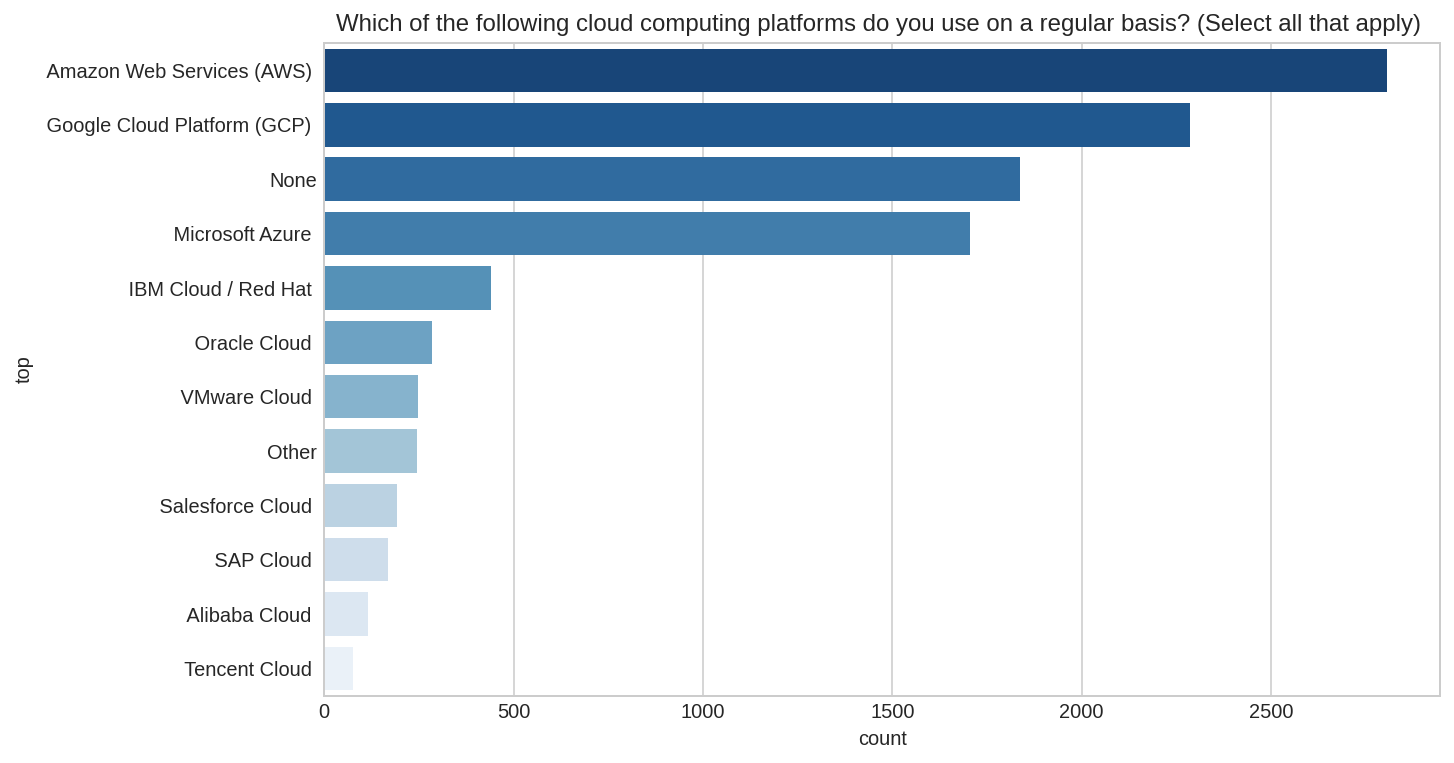

In [123]:
show_plot_by_qno("Q26_A")

#### Q26_B Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

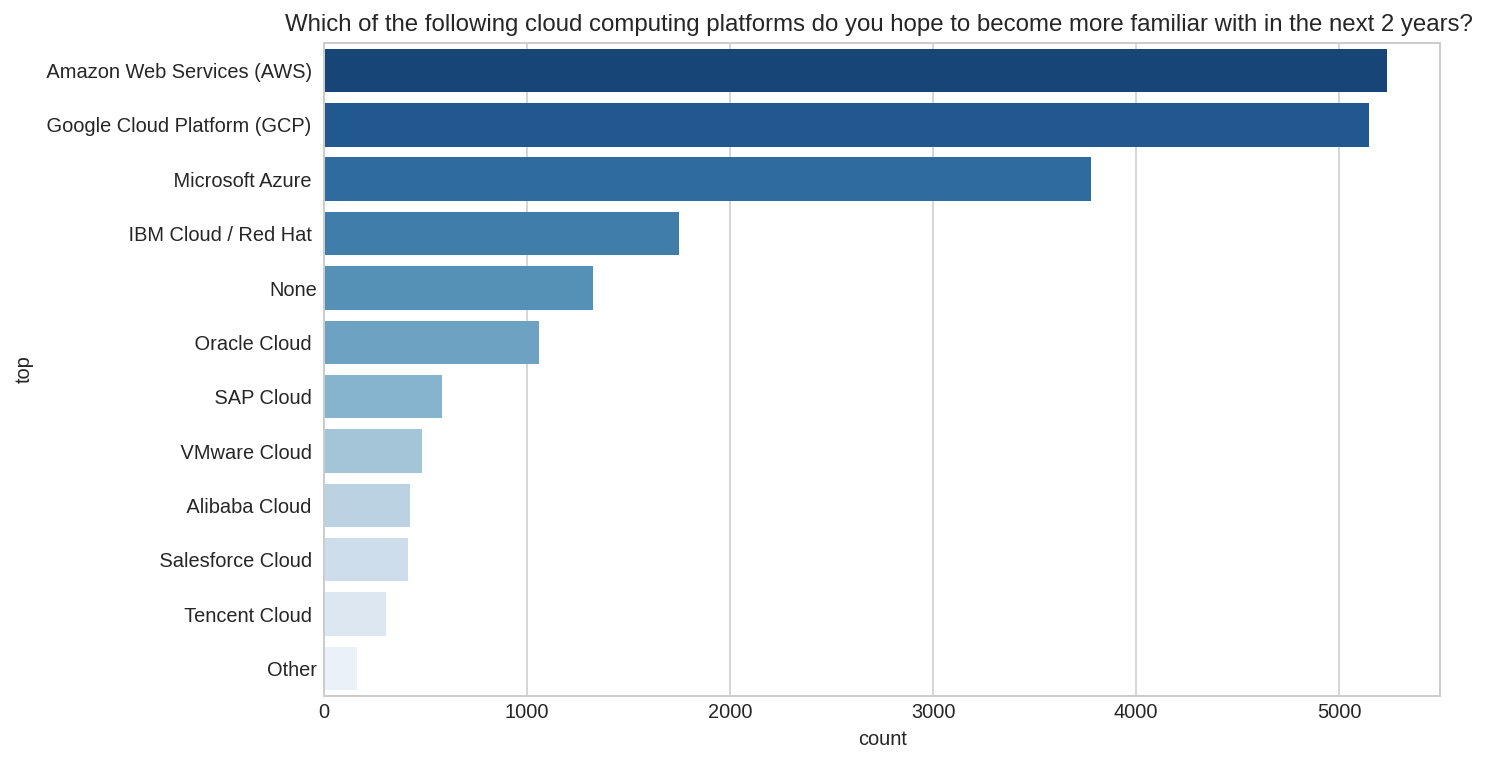

In [125]:
show_plot_by_qno("Q26_B")

### Q27 Cloud computing products

#### Q27_A Do you use any of the following cloud computing products on a regular basis? (Select all that apply)

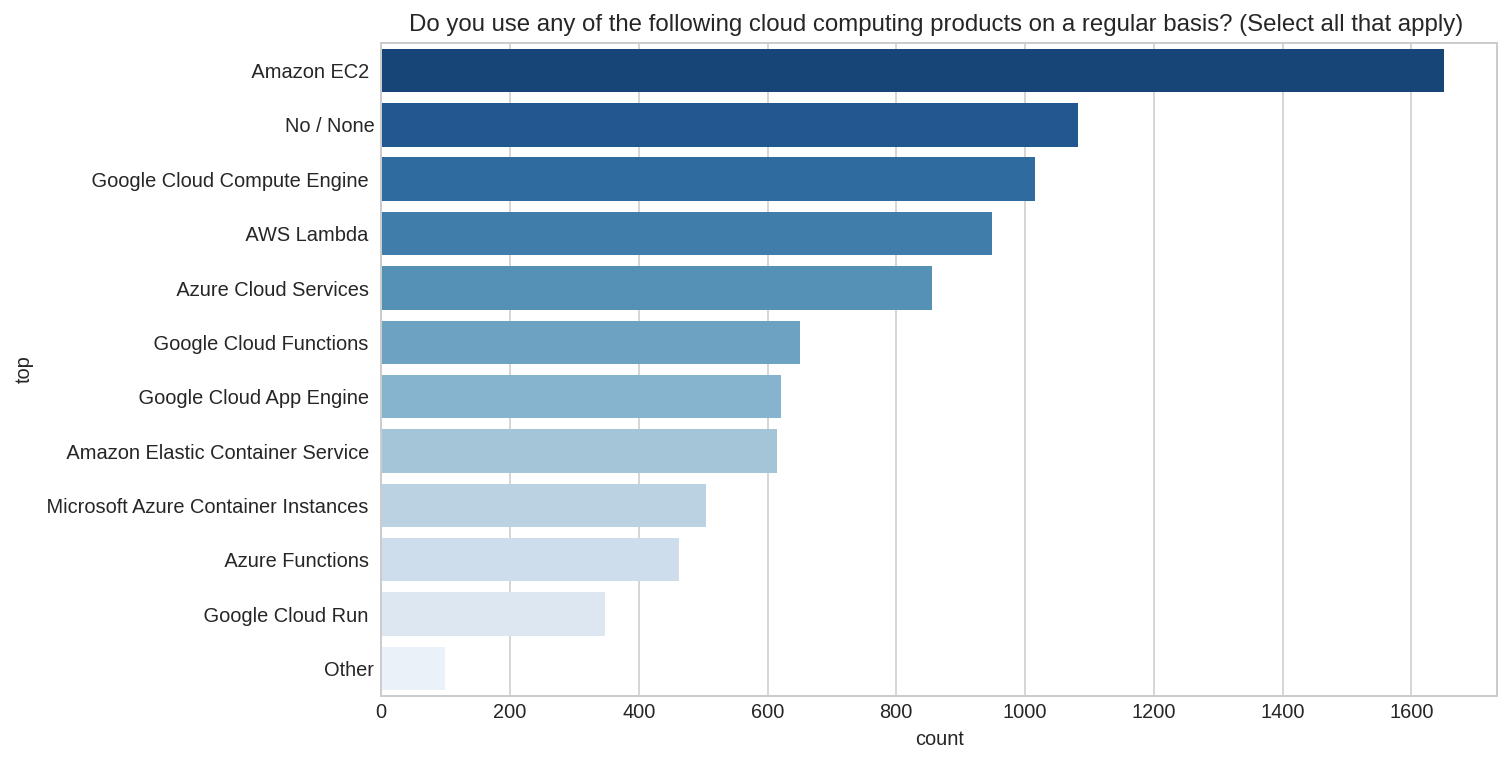

In [126]:
show_plot_by_qno("Q27_A")

#### Q27_B In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)

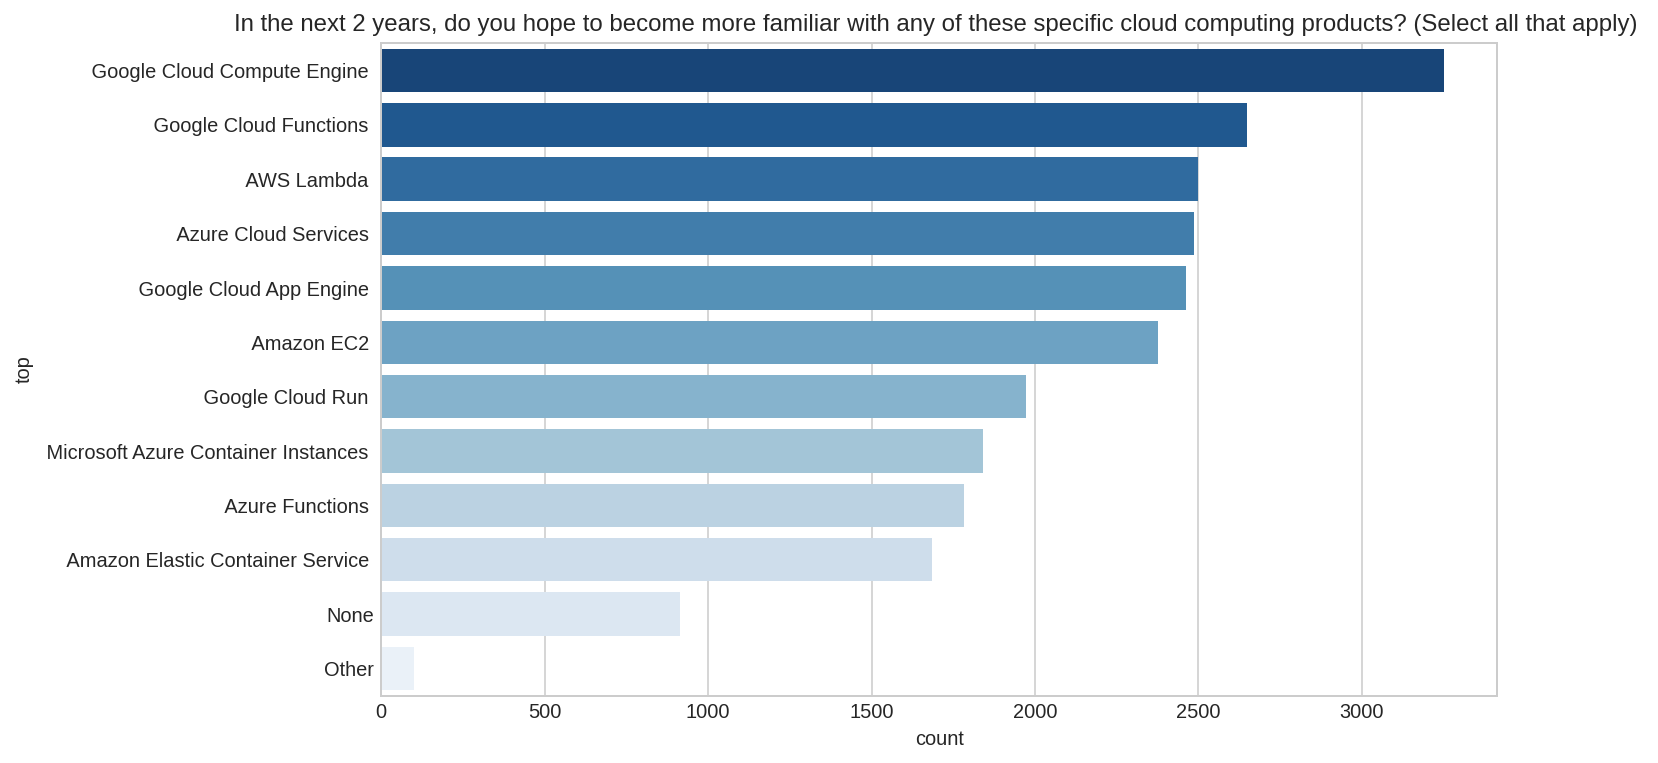

In [127]:
show_plot_by_qno("Q27_B")

## Q28 machine learning products

#### Q28_A Do you use any of the following machine learning products on a regular basis? (Select all that apply)

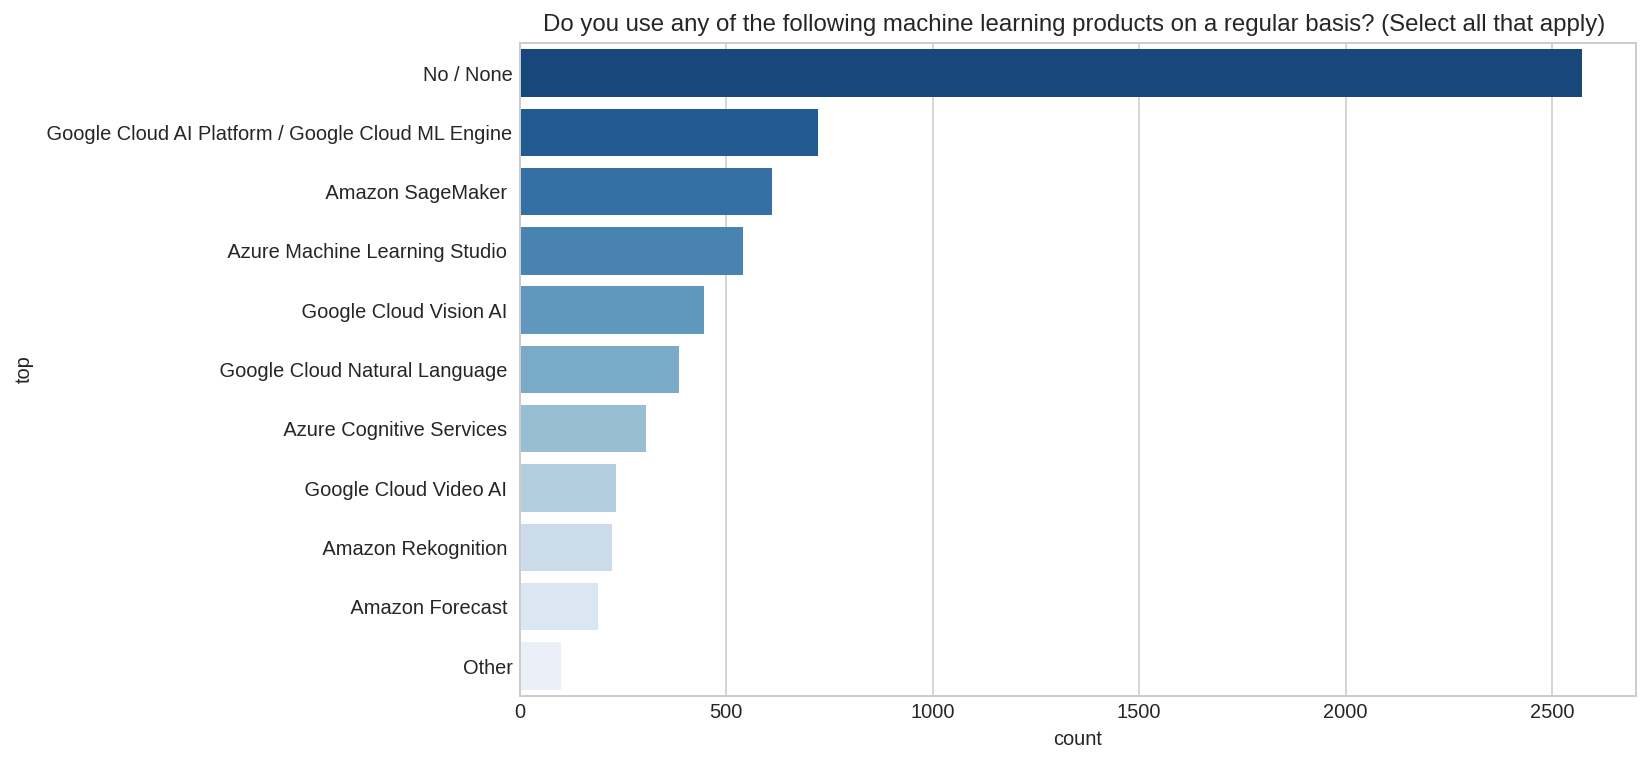

In [129]:
show_plot_by_qno("Q28_A")

#### Q28_B In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply)

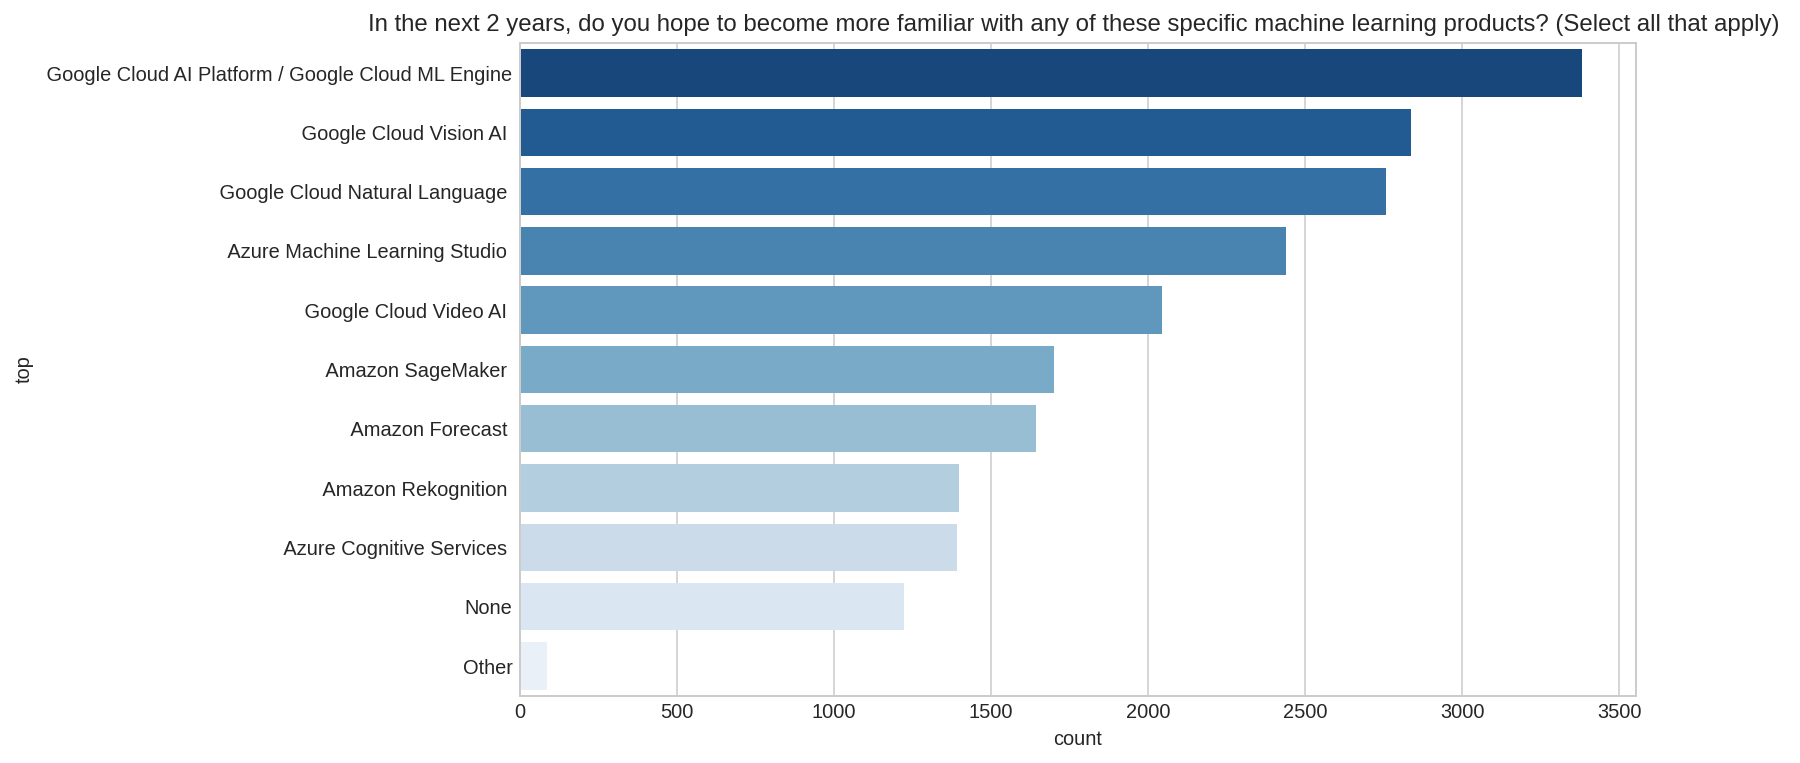

In [130]:
show_plot_by_qno("Q28_B")

## Q29 big data products

#### Q29_A Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)

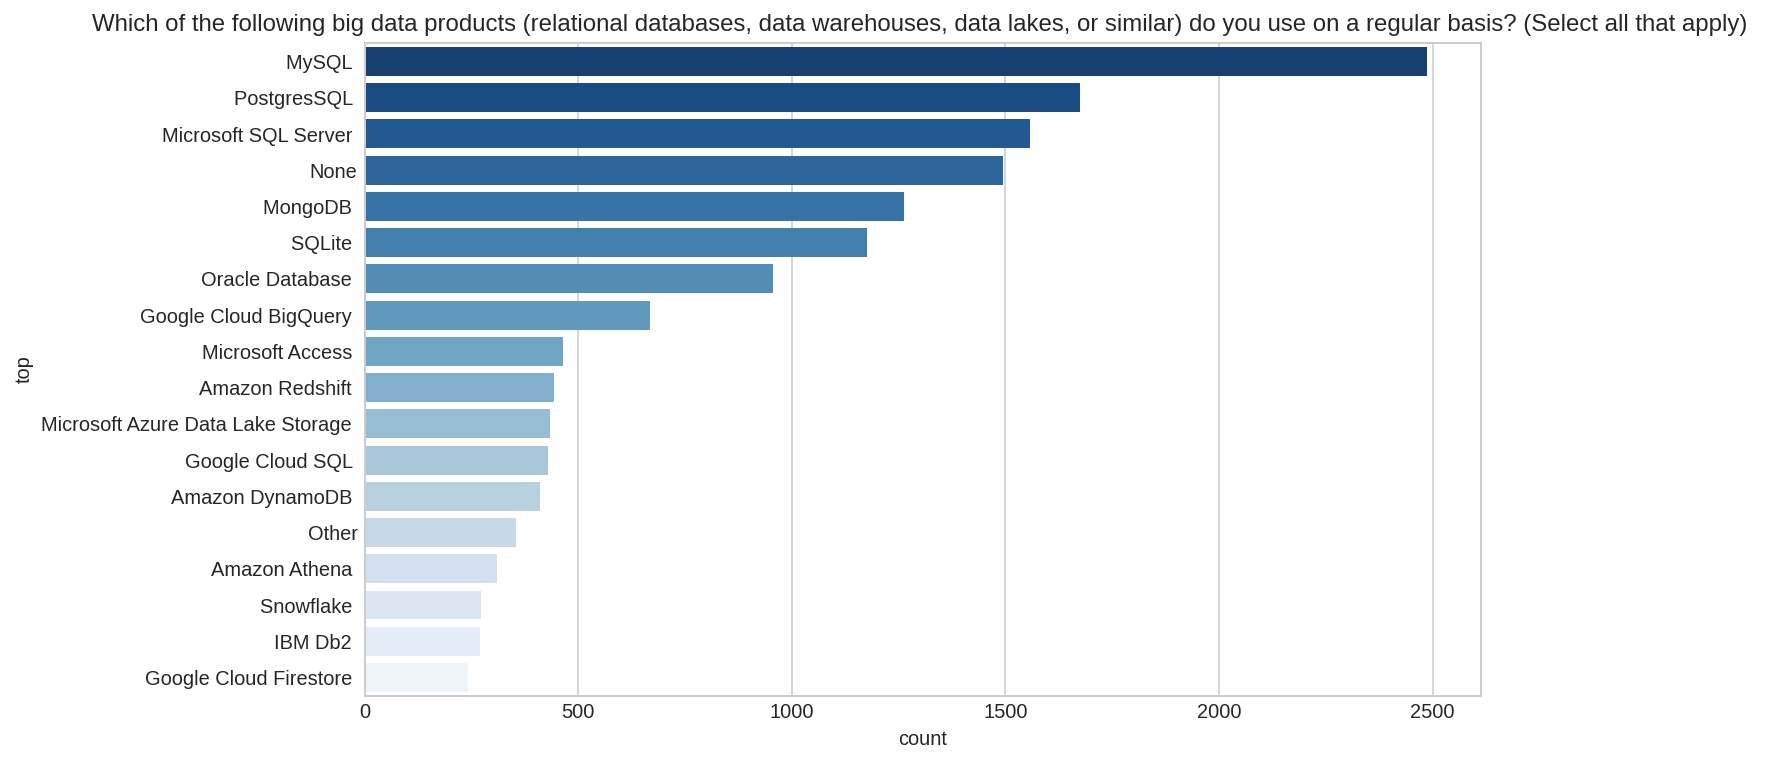

In [131]:
show_plot_by_qno("Q29_A")

#### Q29_B Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)

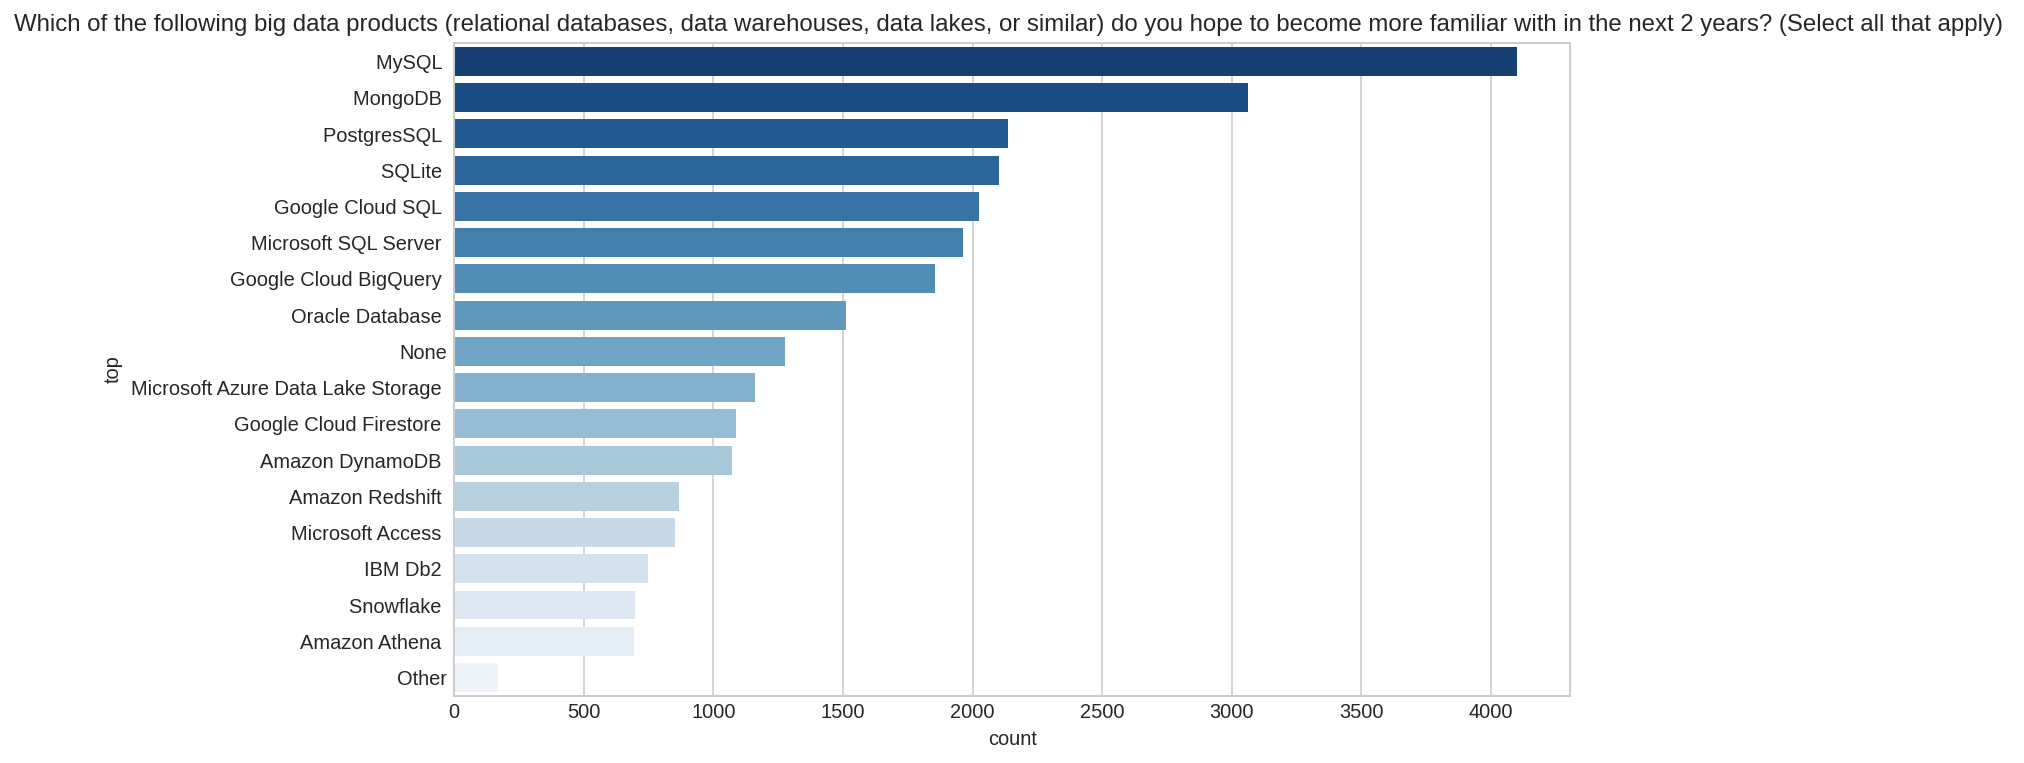

In [132]:
show_plot_by_qno("Q29_B")

## Q30 Which of the following big data products(relational database, data warehouse, data lake, or smiliar) do you use most often?-Select Choice

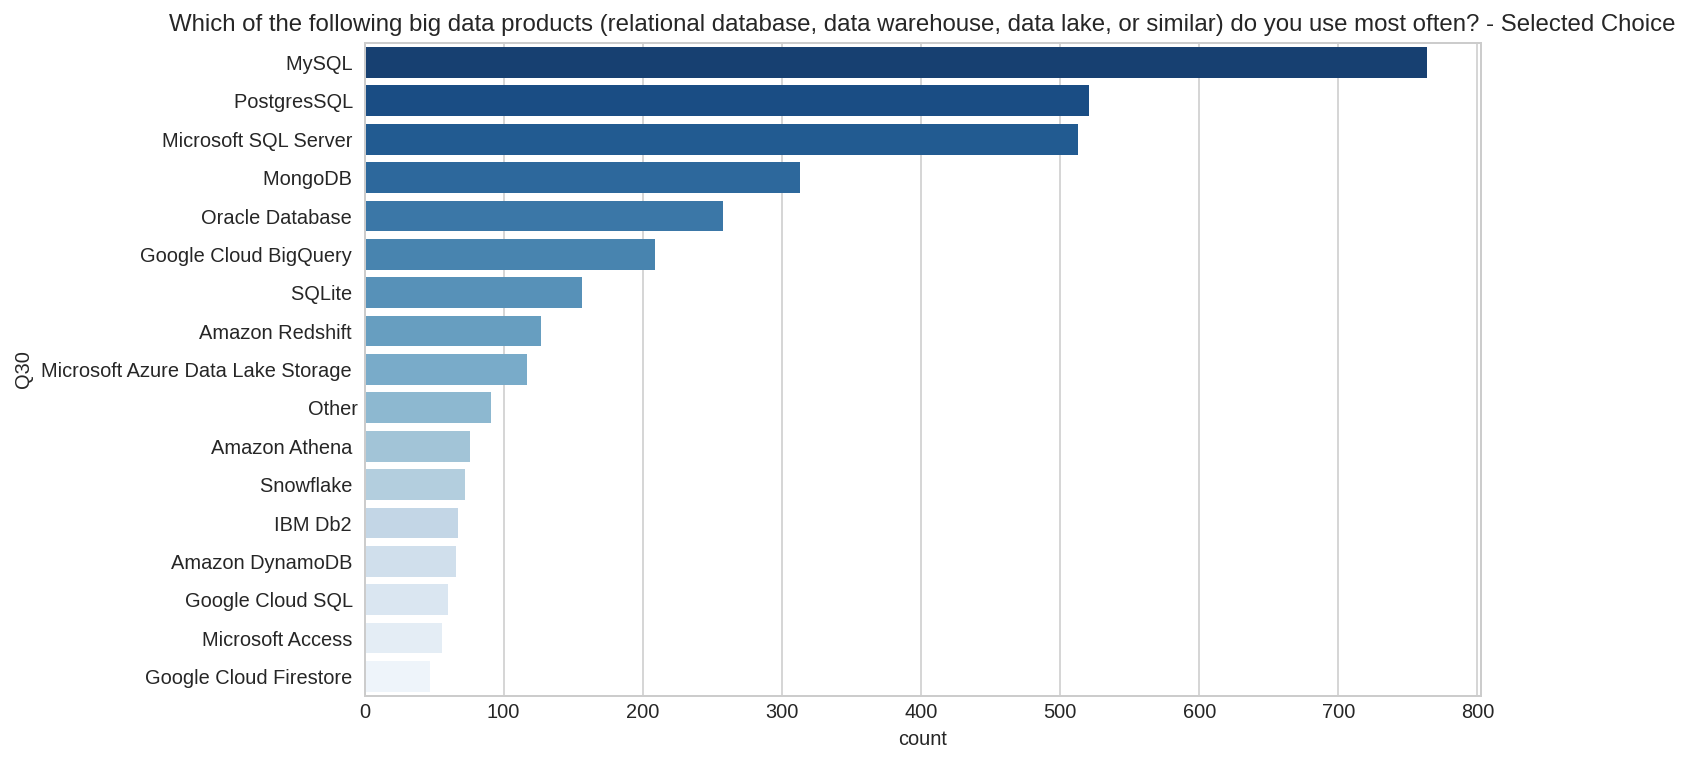

In [133]:
show_plot_by_qno("Q30")

## Q31 business intelligence tools

#### Q31_A Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)

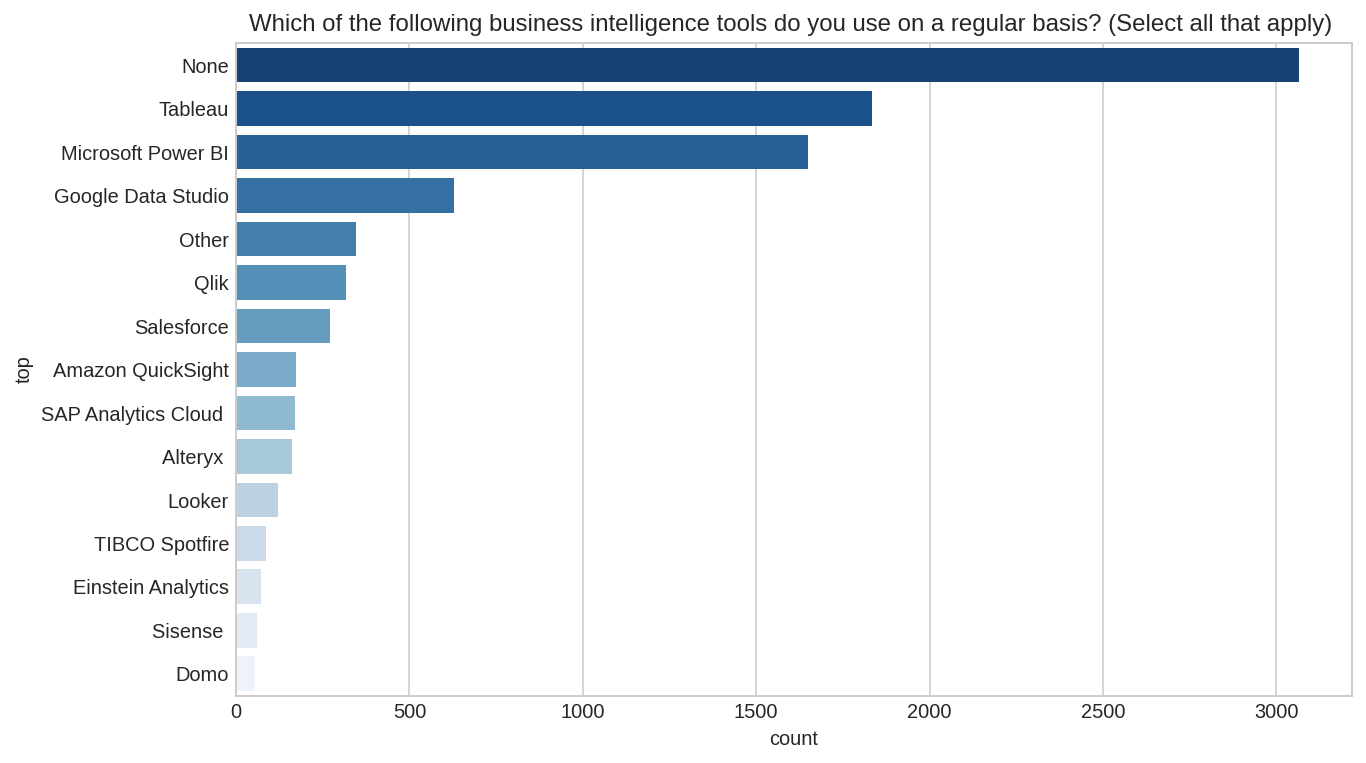

In [134]:
show_plot_by_qno("Q31_A")

#### Q31_B Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)

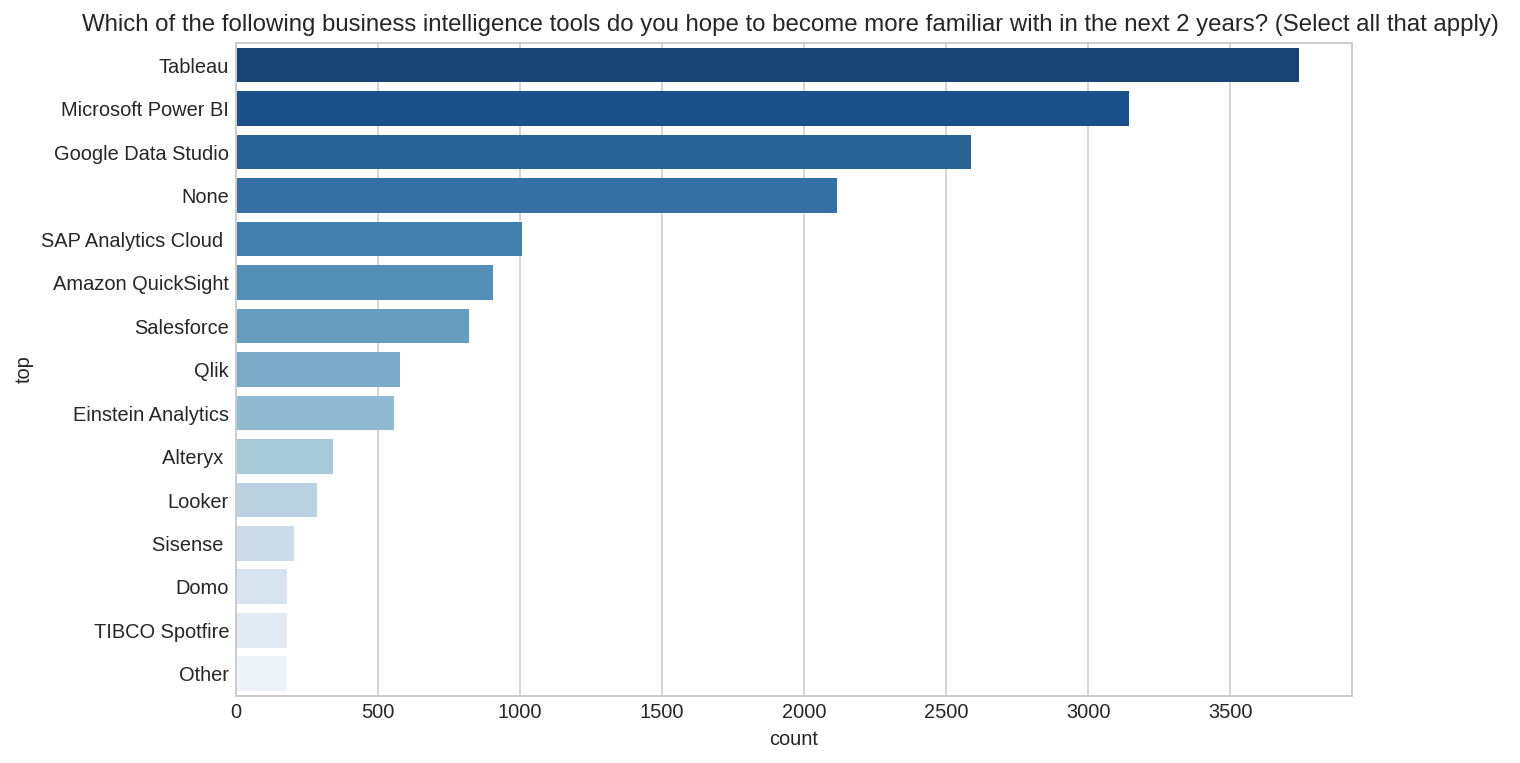

In [135]:
show_plot_by_qno("Q31_B")

## Q32 Which of the following business intelligence tools do you use most often? - Selected Choice

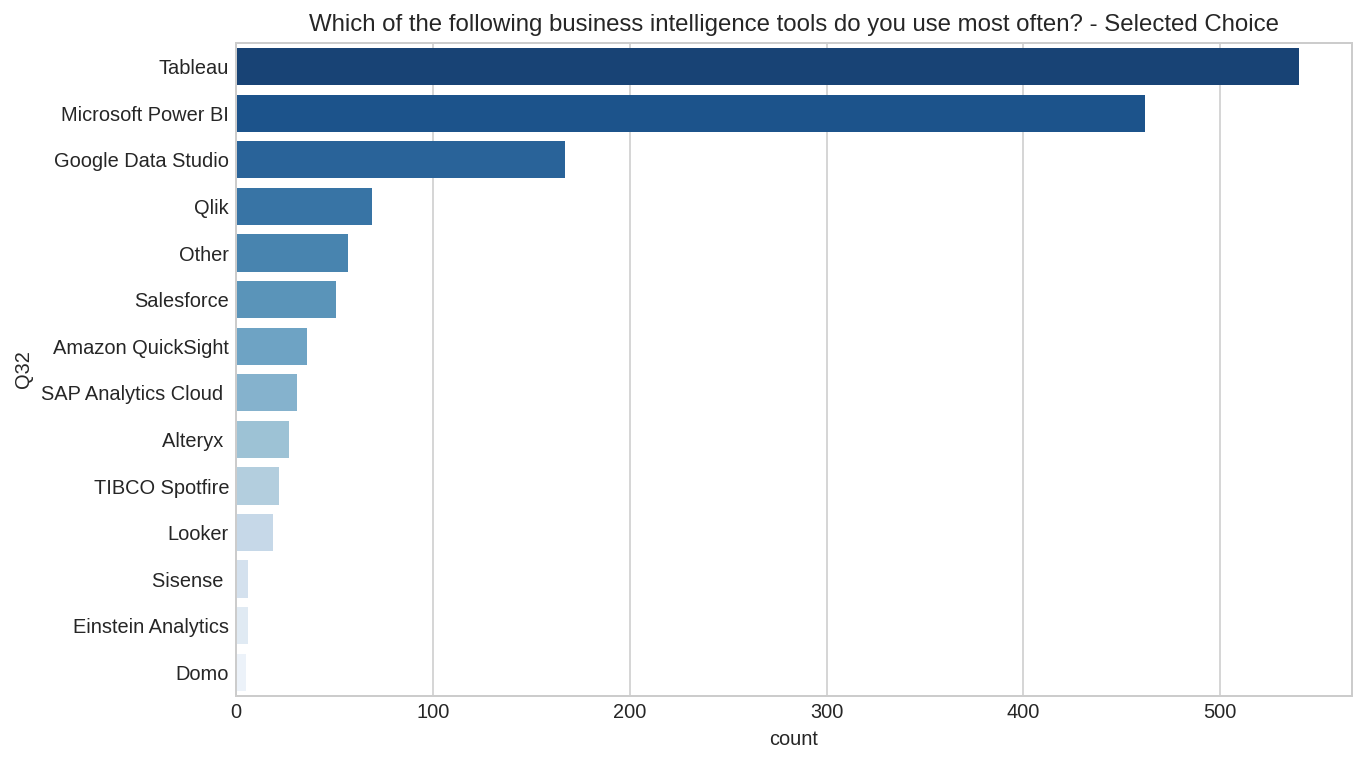

In [136]:
show_plot_by_qno("Q32")

## Q33 automated machine learning tools (or partial AutoML tools)

#### Q33_A Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply)

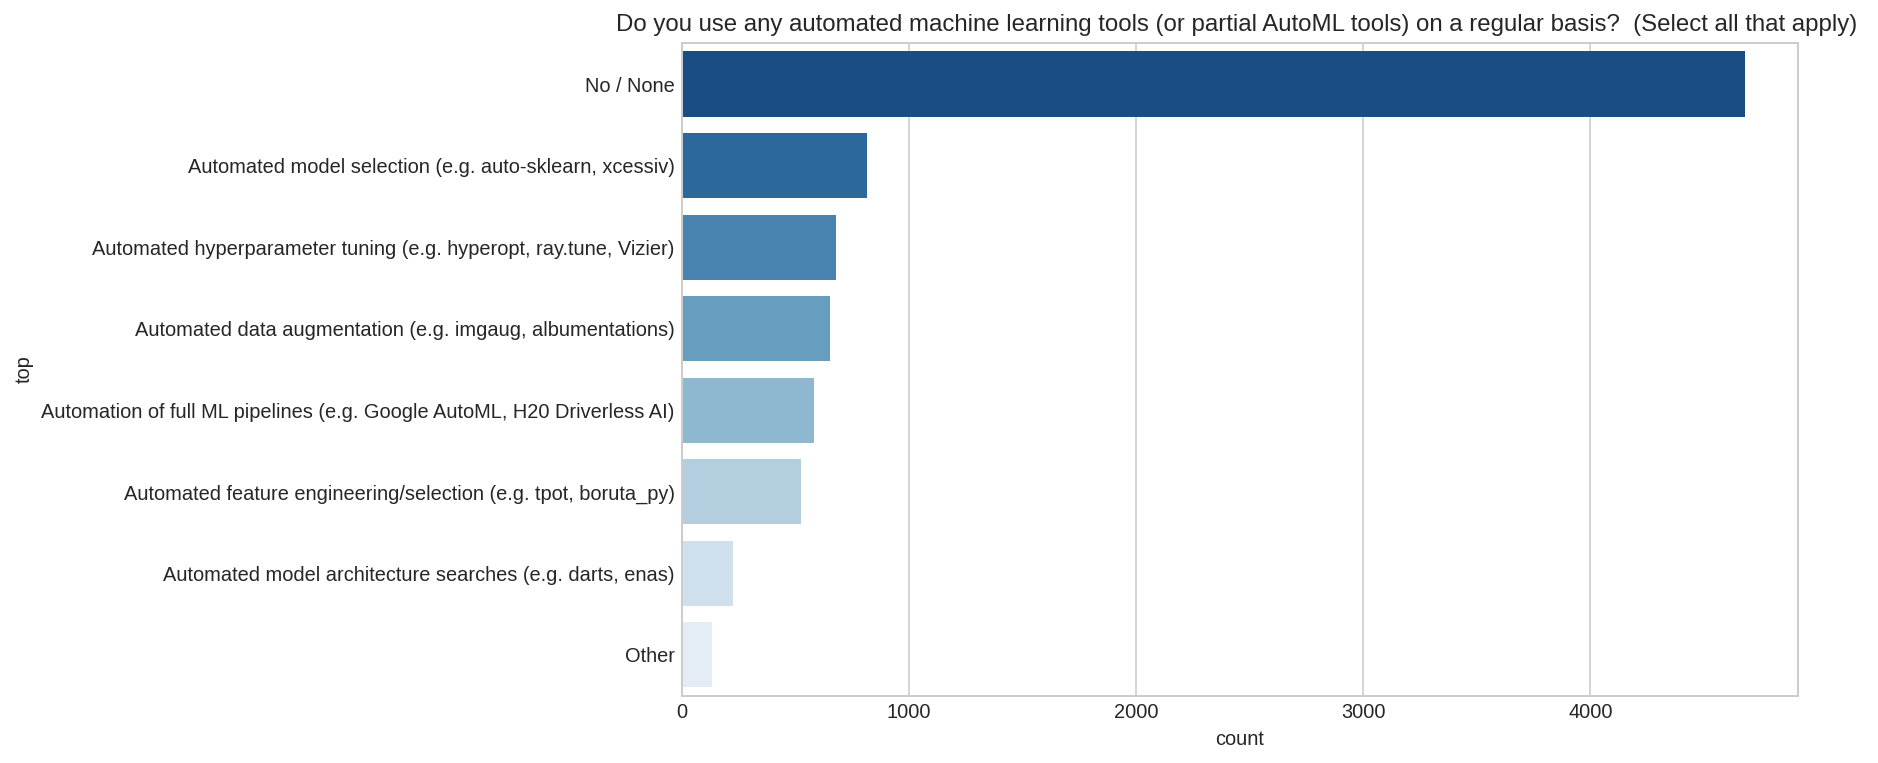

In [137]:
show_plot_by_qno("Q33_A")

#### Q33_B Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)

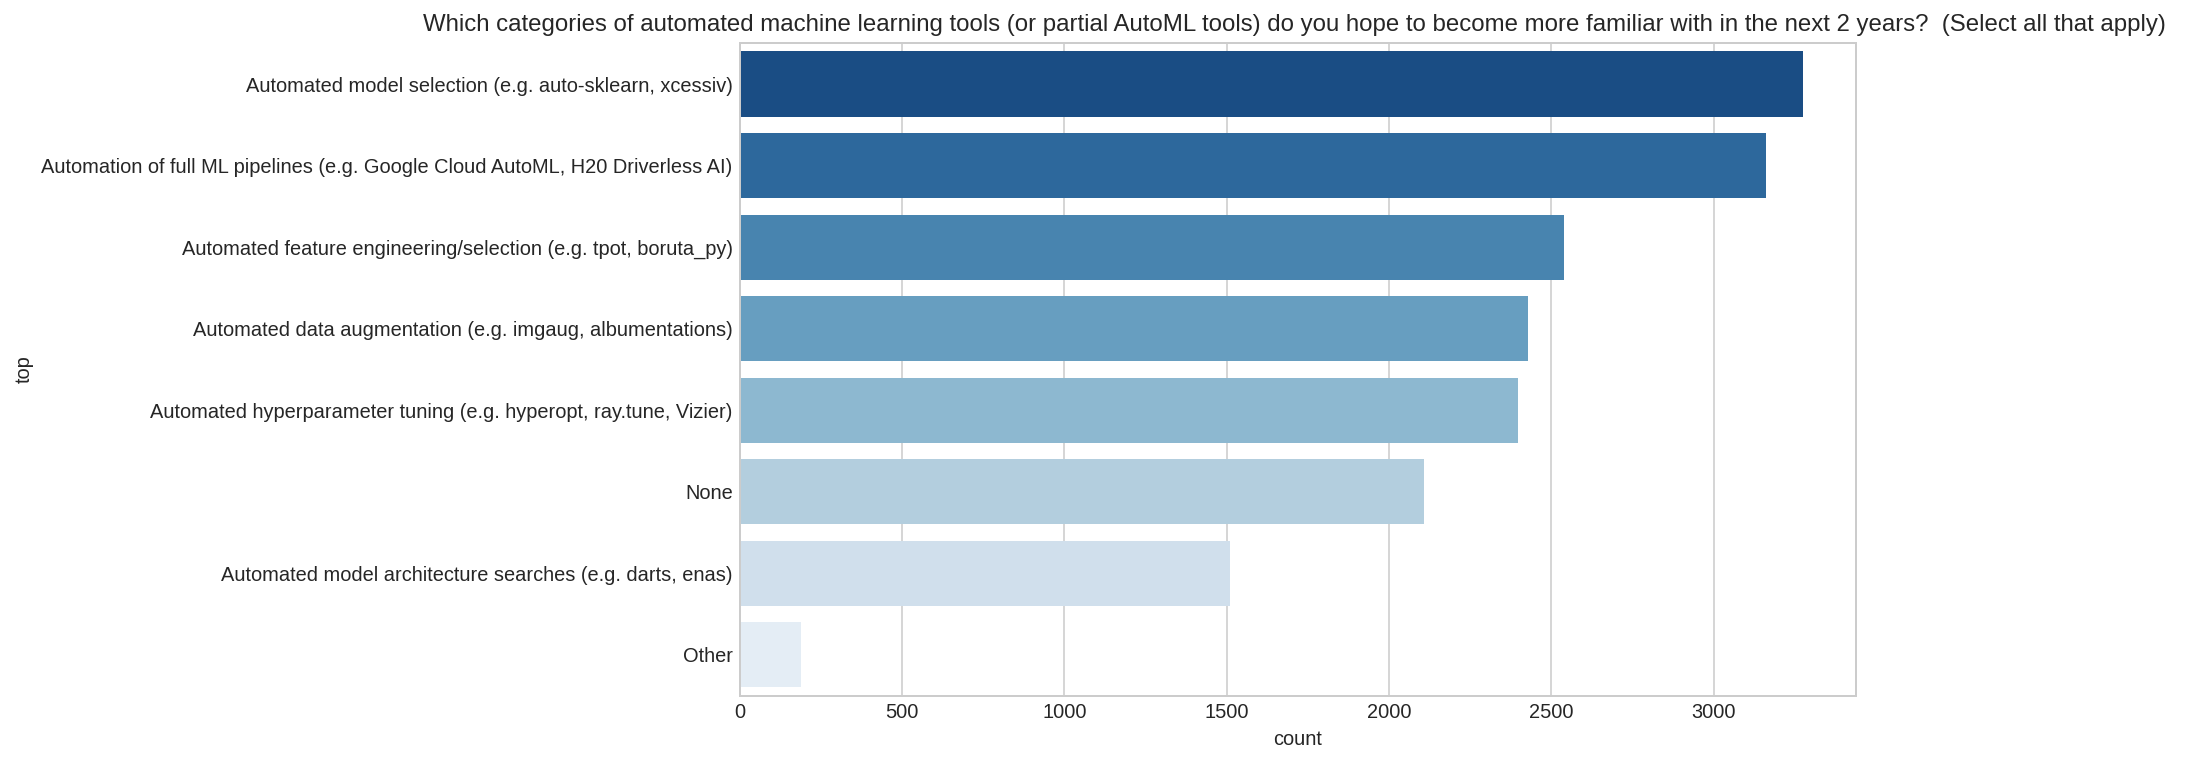

In [138]:
show_plot_by_qno("Q33_B")

## Q34 automated machine learning tools (or partial AutoML tools)

#### Q34_A Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)

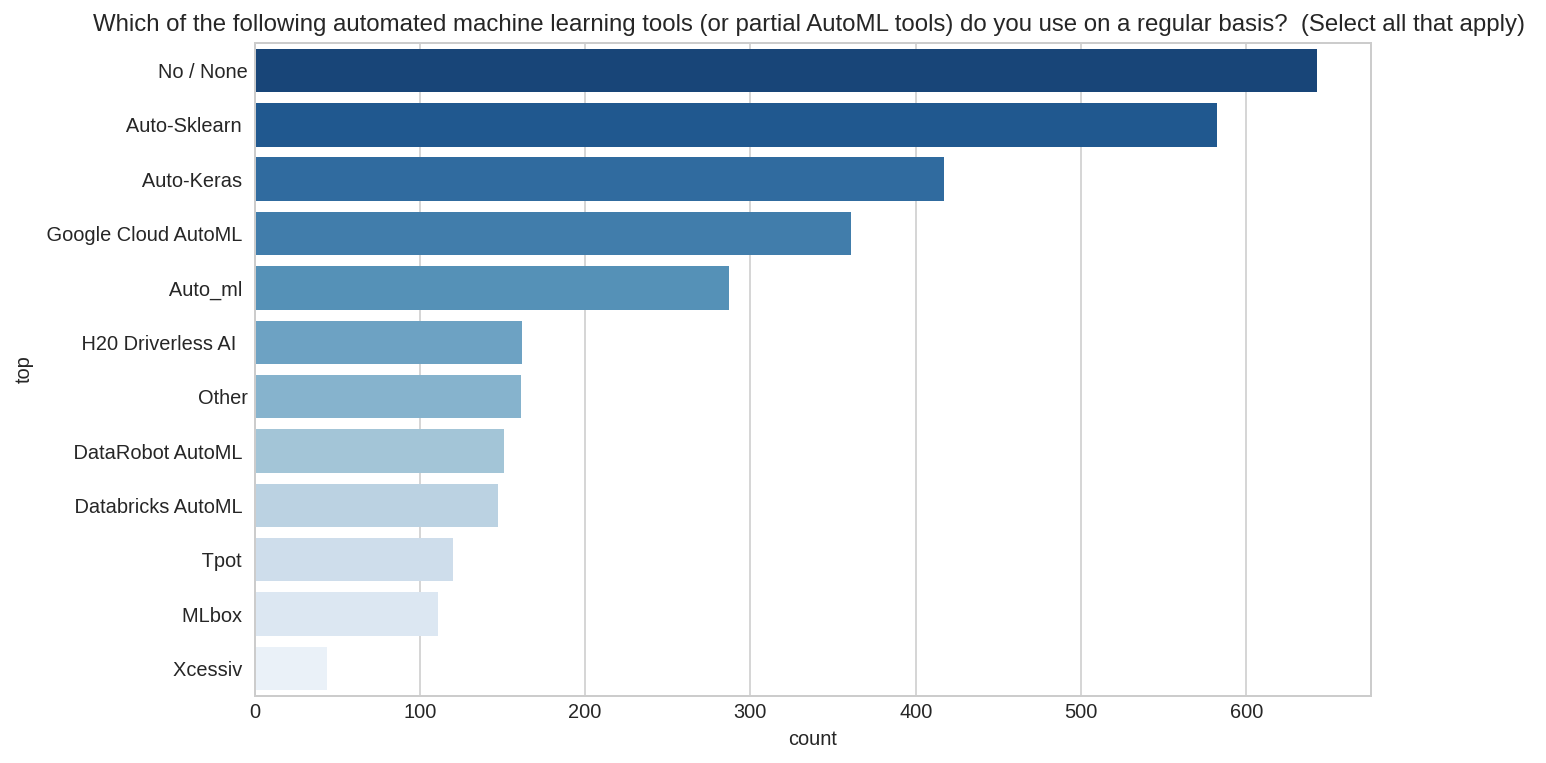

In [139]:
show_plot_by_qno("Q34_A")

#### Q34_B Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)

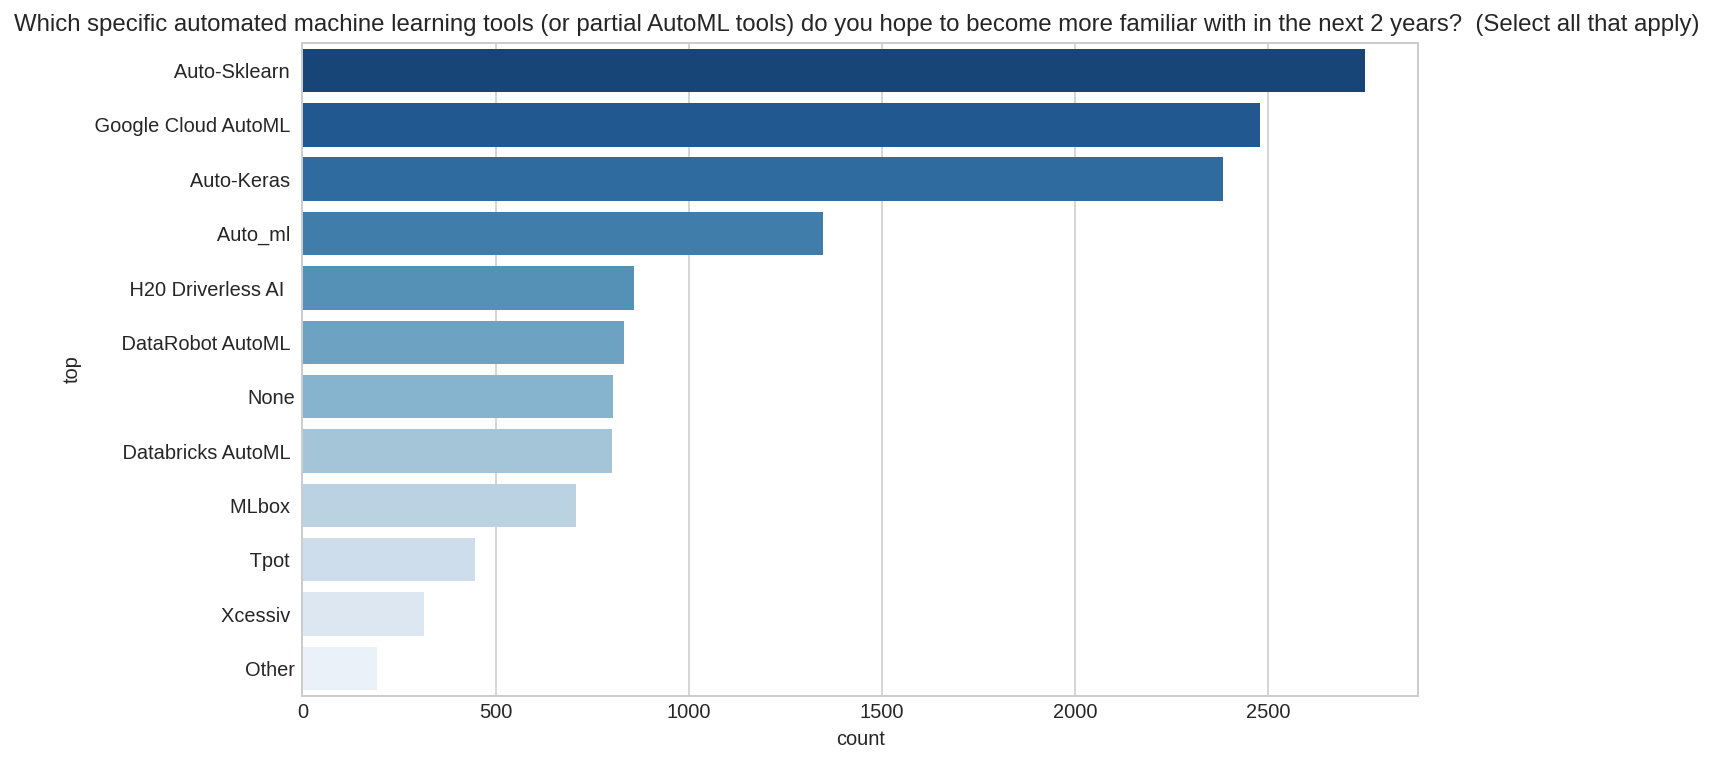

In [140]:
show_plot_by_qno("Q34_B")

## Q35 Do you use any tools to help manage machine learning experiments? (Select all that apply)

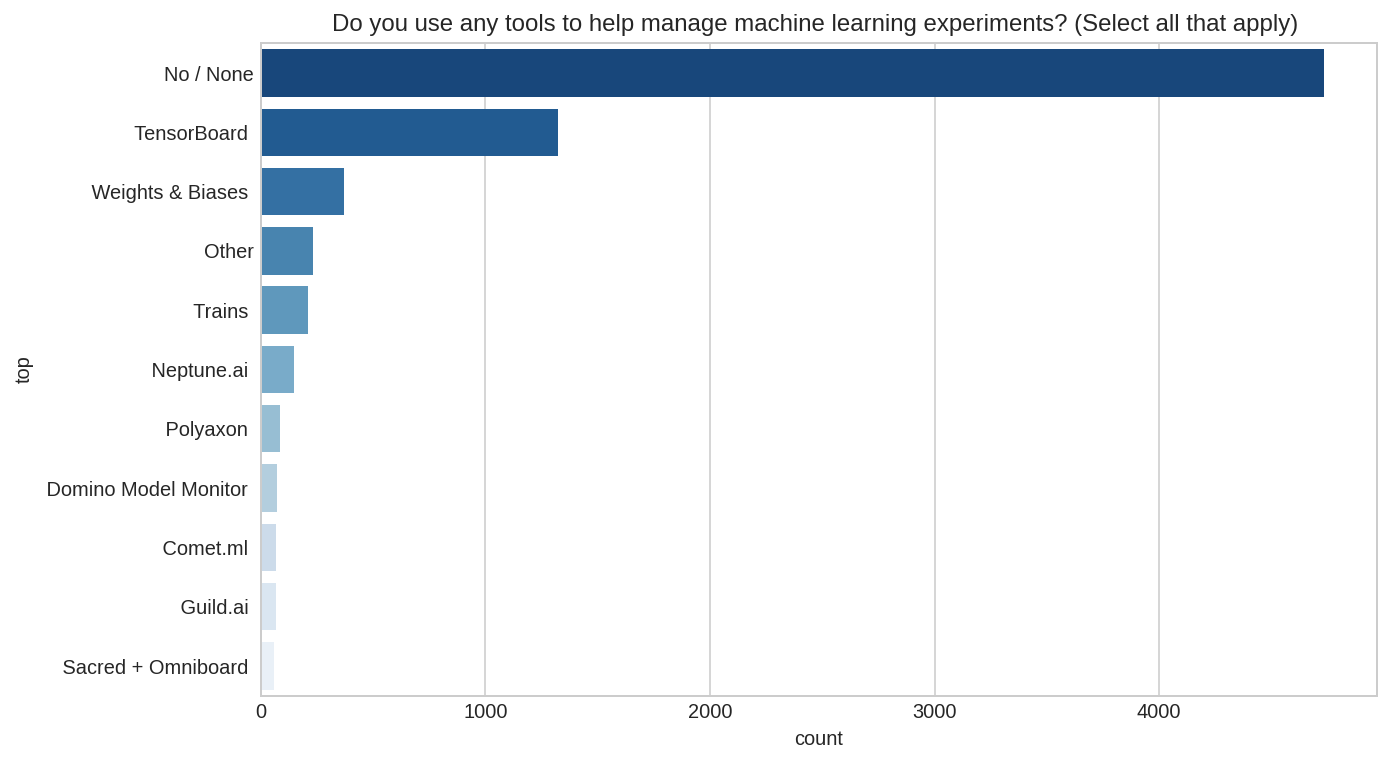

In [142]:
show_plot_by_qno("Q35_A")

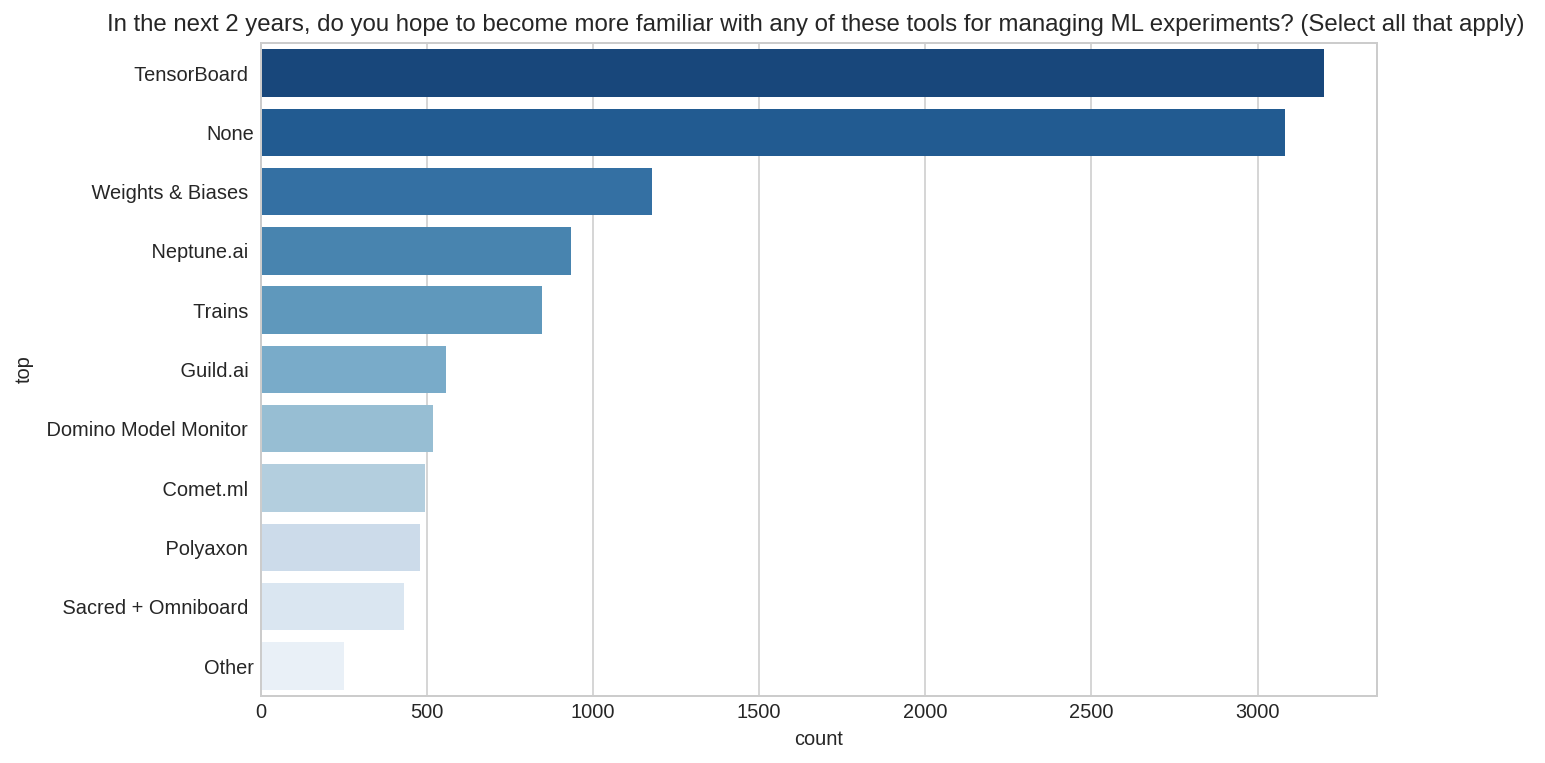

In [143]:
show_plot_by_qno("Q35_B")

## Q36 Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)

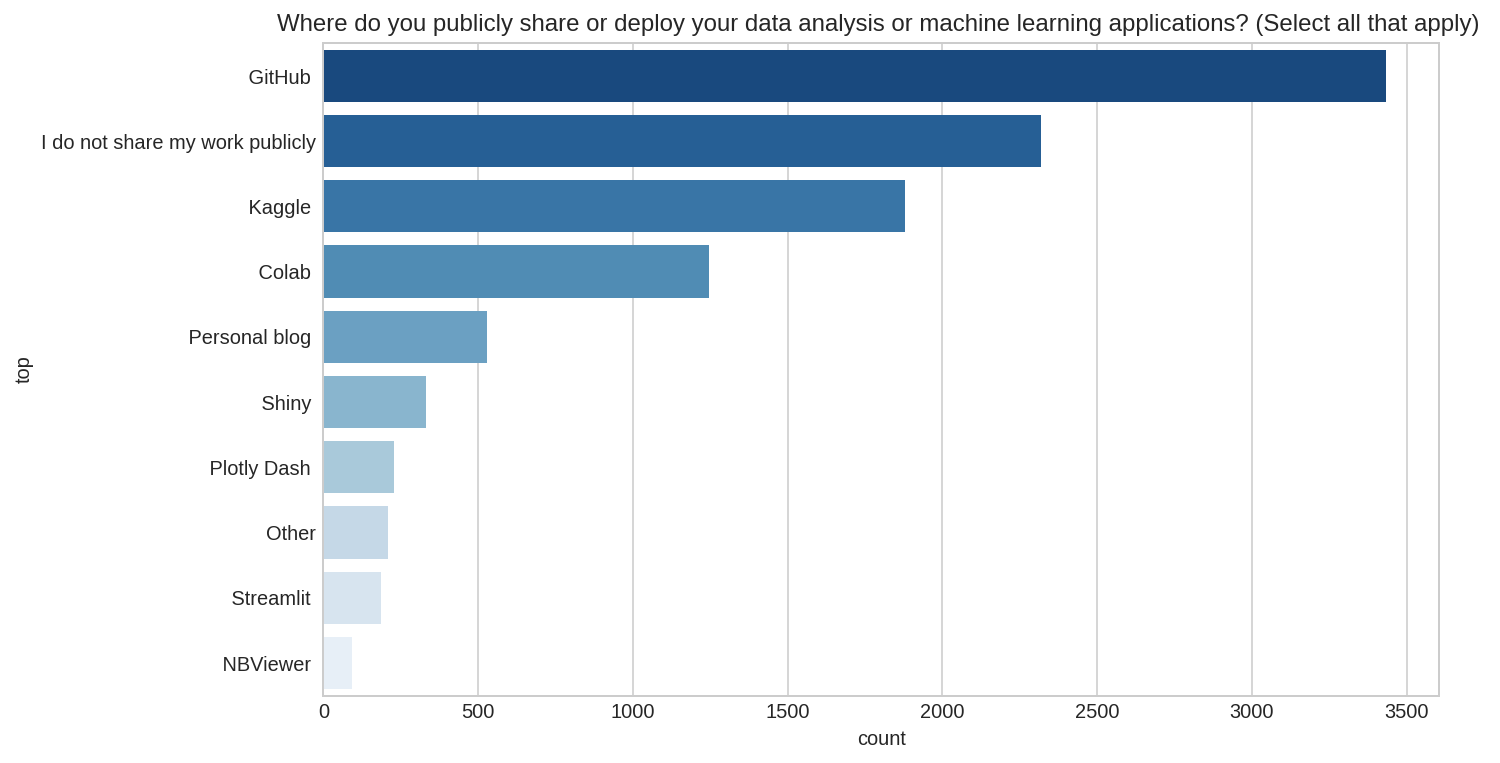

In [145]:
show_plot_by_qno("Q36")

## Q37 On which platforms have you begun or completed data science courses?(Select all that apply)

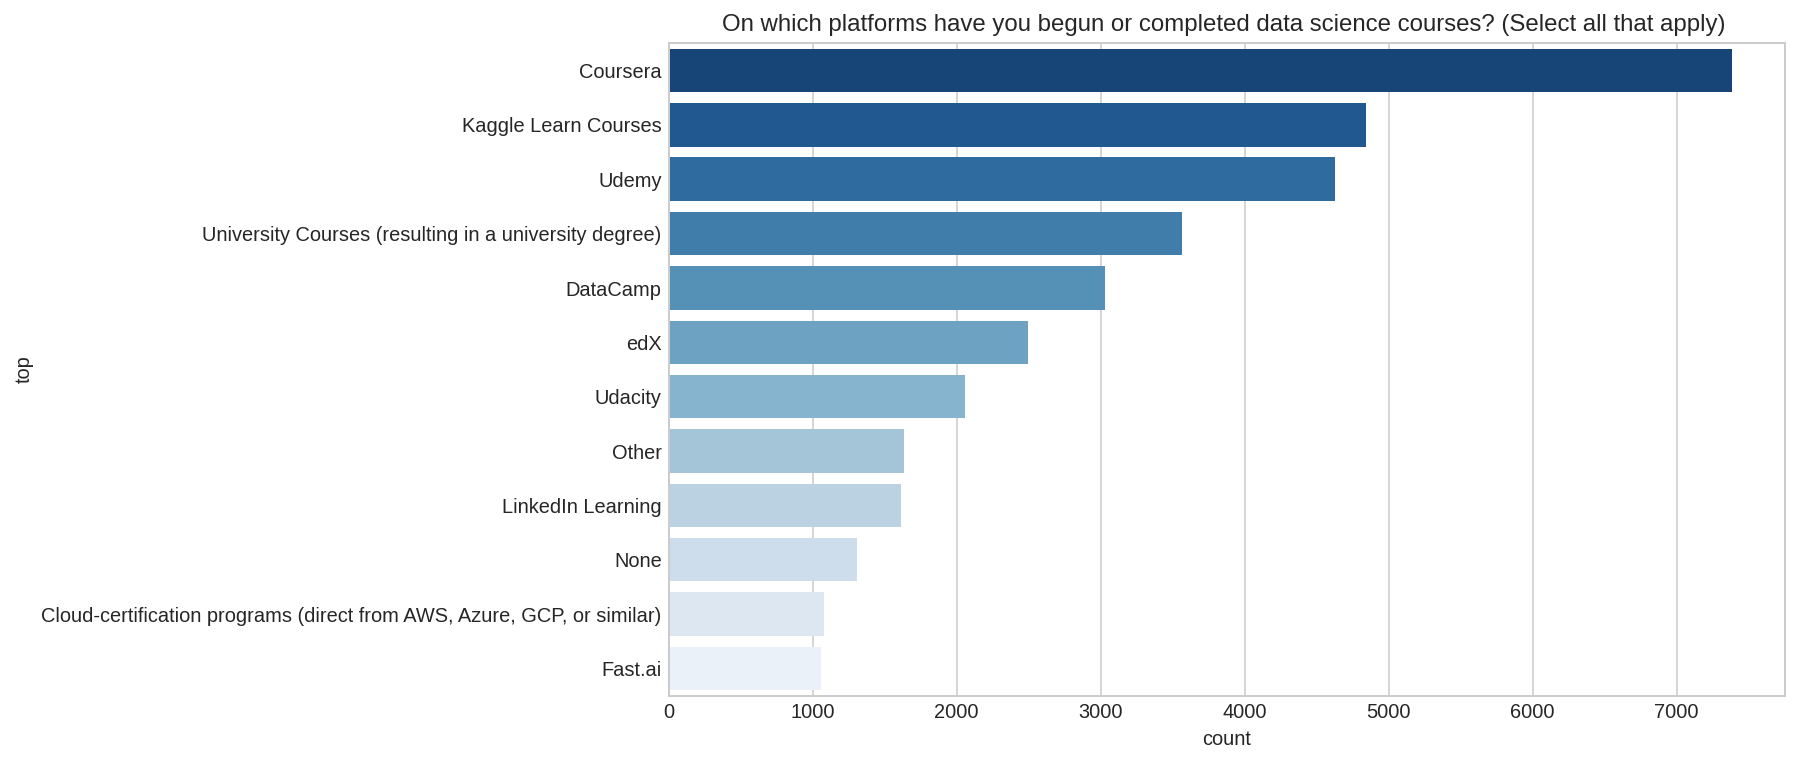

In [146]:
show_plot_by_qno("Q37")

## Q38 What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

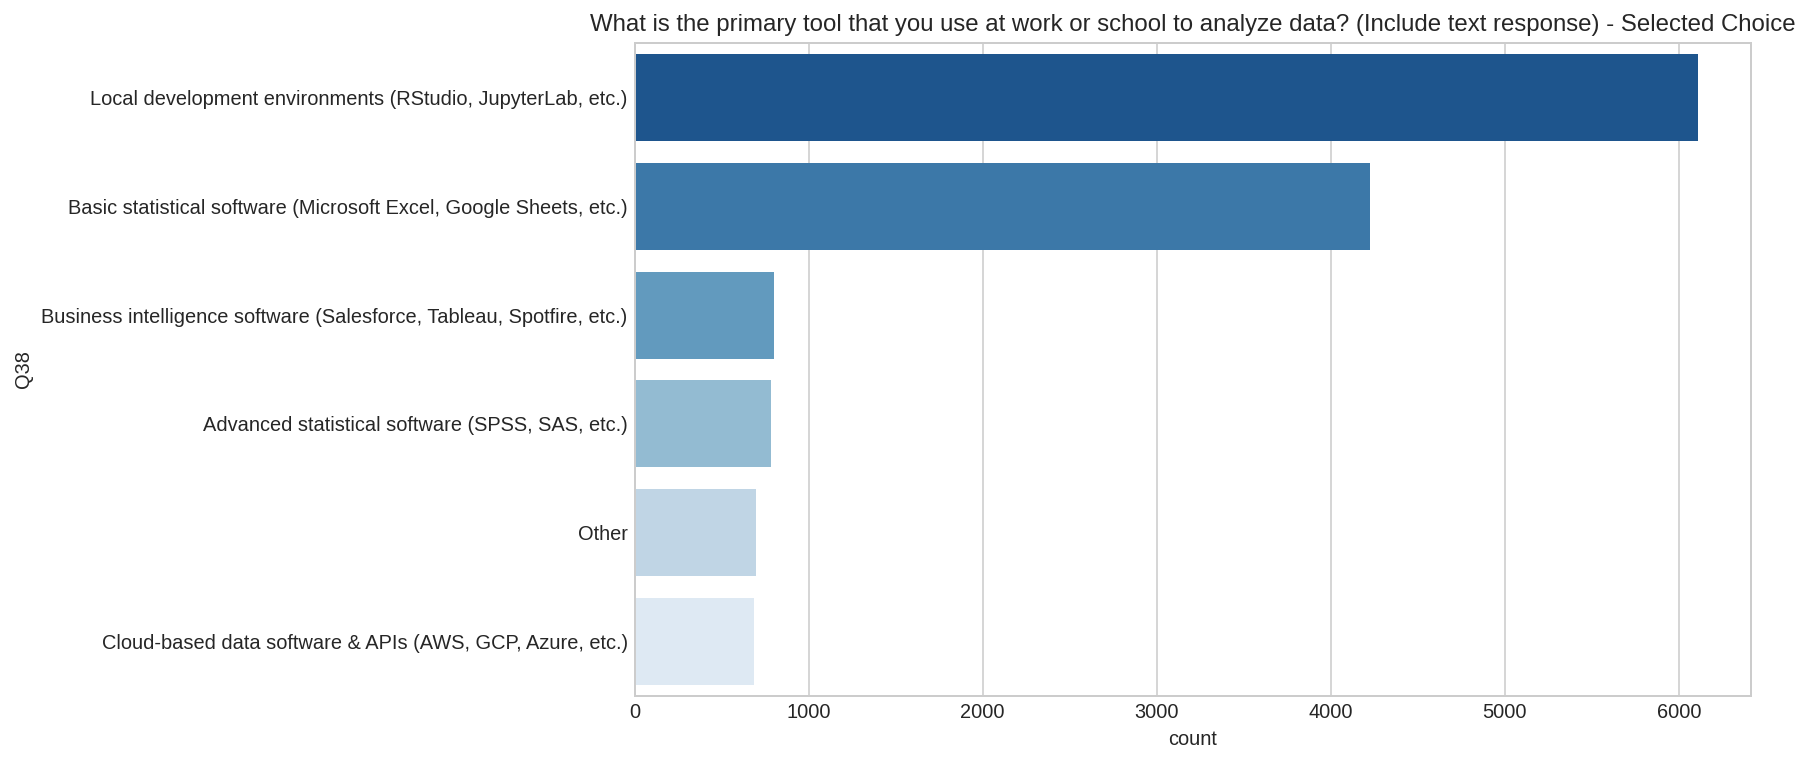

In [147]:
show_plot_by_qno("Q38")

## Q39 Who/what are your favorite media sources that report on data science topics?(Select all that apply)

In [ ]:
show_plot_by_qno("Q39")